In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import FunctionTransformer

C:\Users\Dell\anaconda3\envs\anaconda\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
df = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')
test = test.drop(["id"],axis=1)

In [5]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


In [6]:
df.dtypes

id                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [7]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [8]:
test.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

In [9]:
df=df.drop(["id"],axis=1)

In [10]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [11]:
df['smoking'].value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

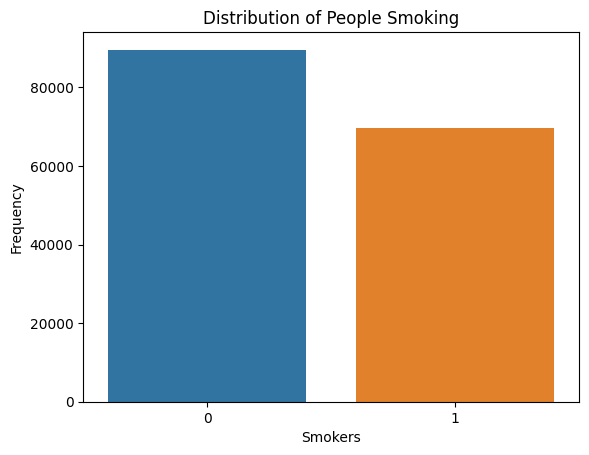

In [12]:
sns.countplot(data=df, x='smoking')
plt.ylabel('Frequency')
plt.xlabel('Smokers')
plt.title('Distribution of People Smoking')
plt.show()

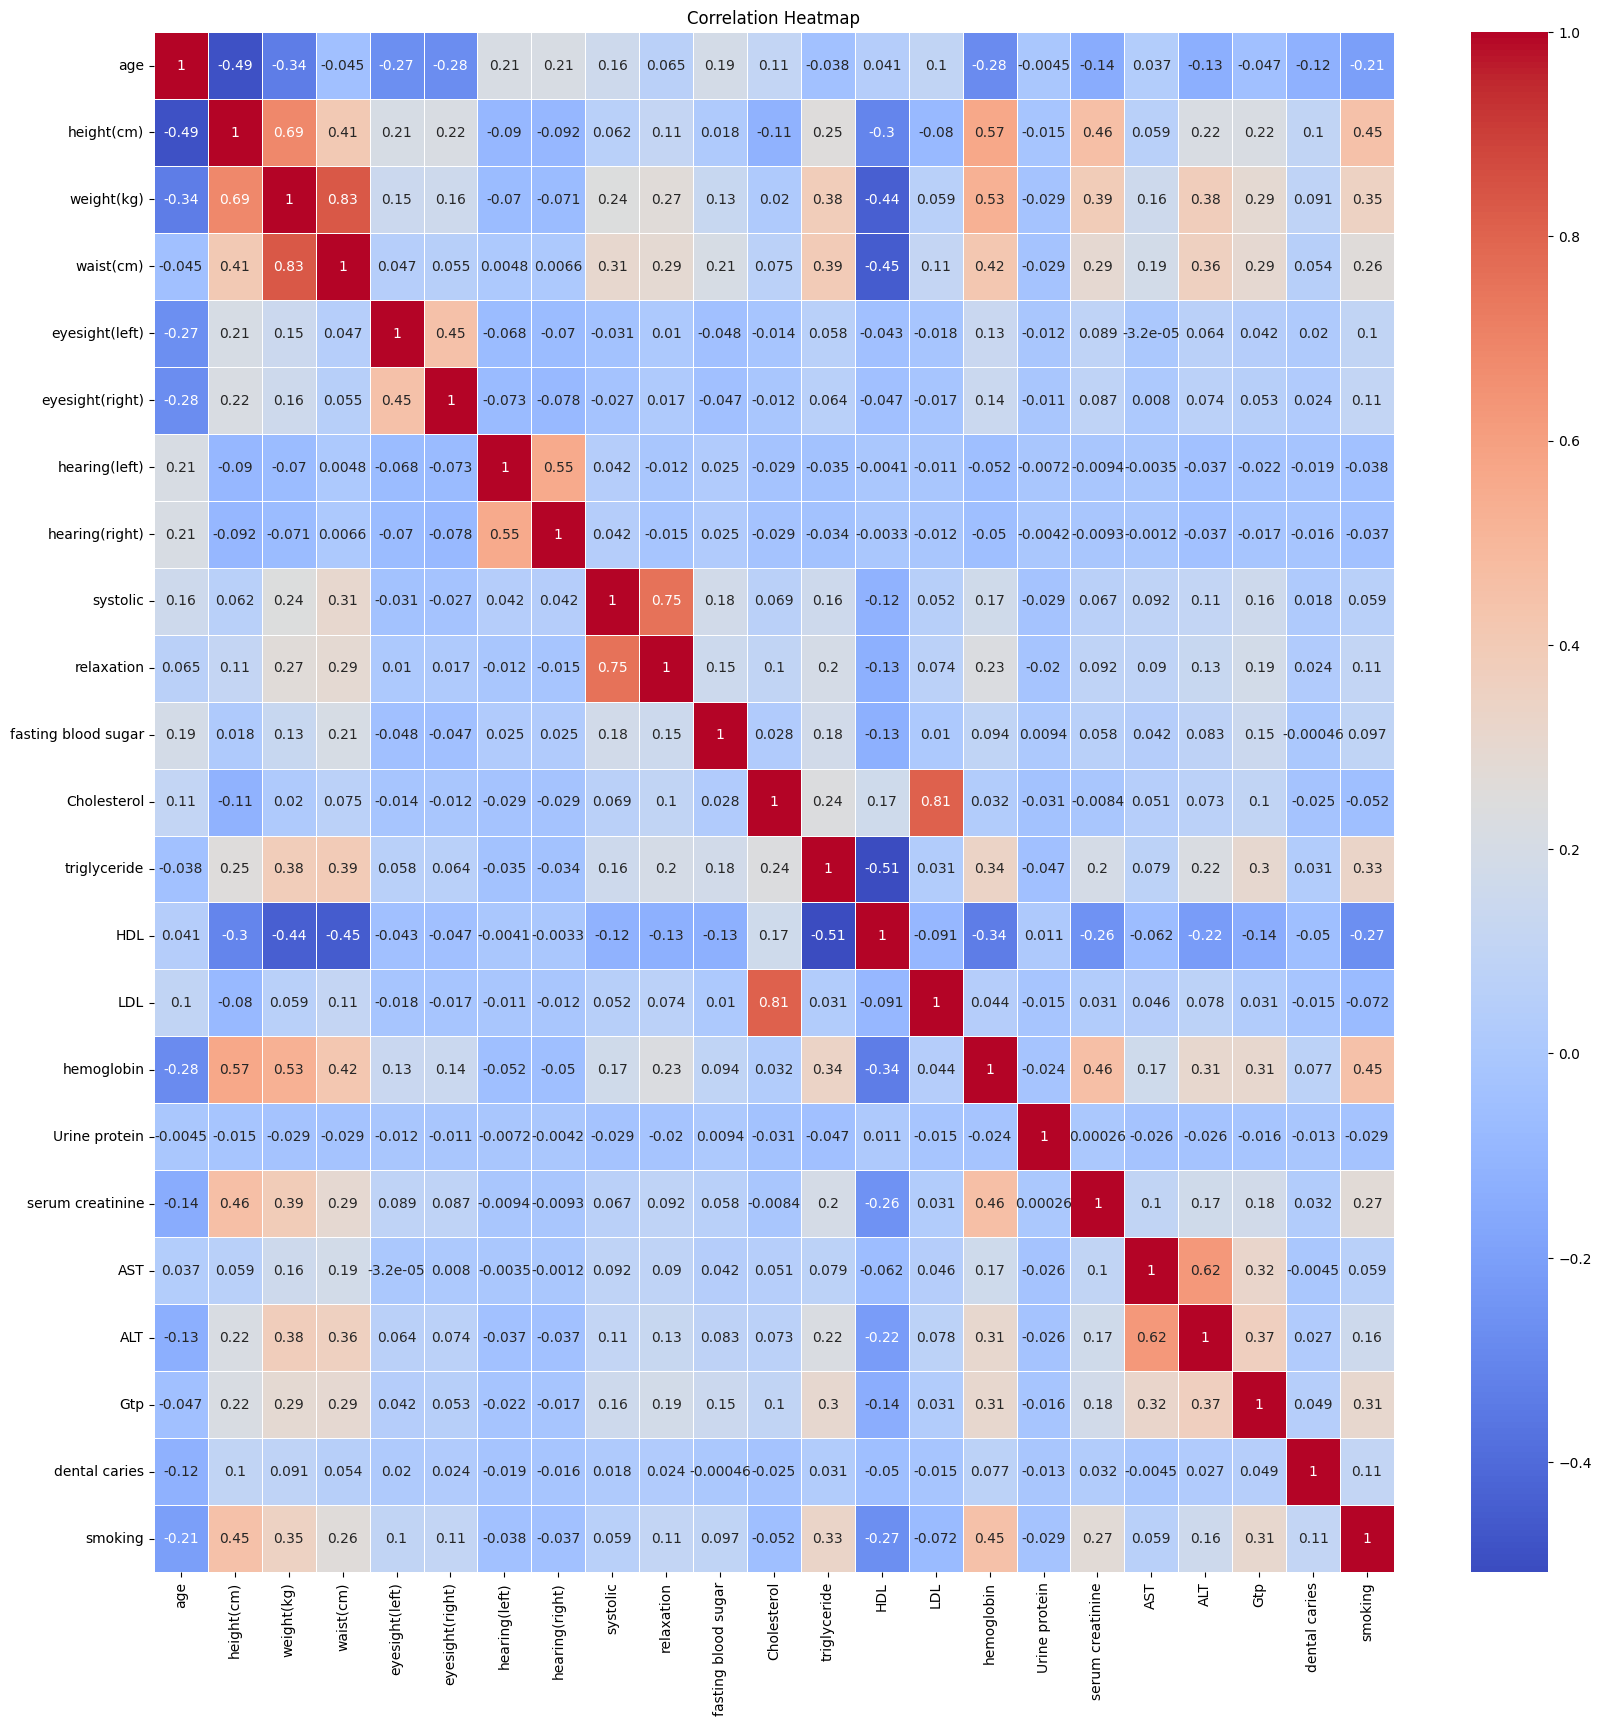

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

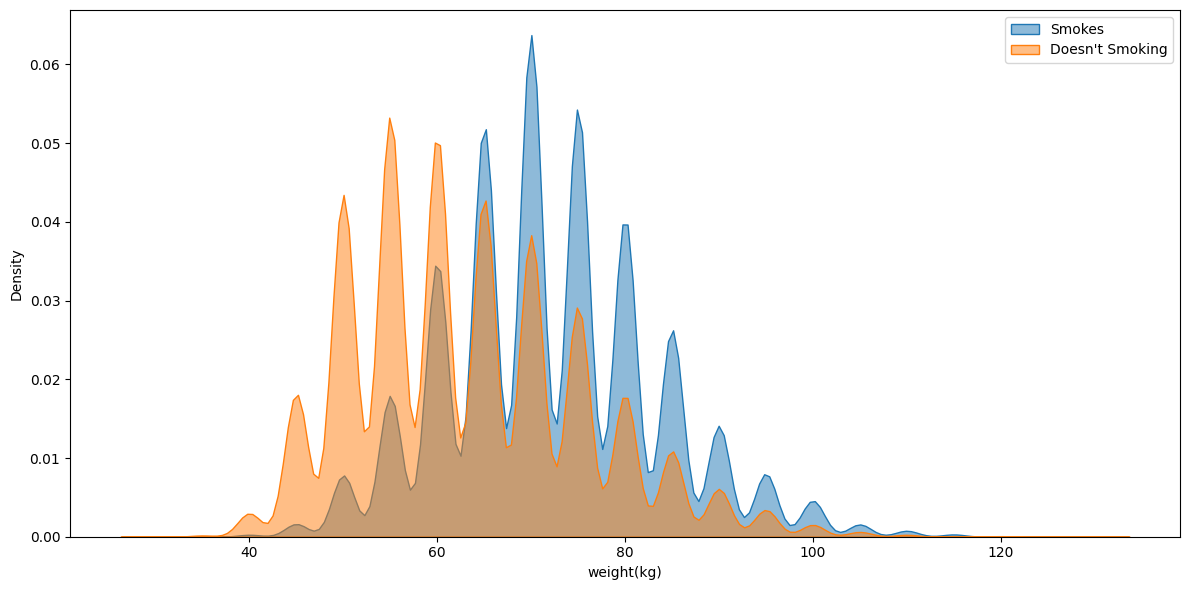

In [14]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df["smoking"]==True]["weight(kg)"], alpha=0.5,fill = True, label="Smokes")
sns.kdeplot(df[df["smoking"]==False]["weight(kg)"], alpha=0.5,fill = True, label="Doesn't Smoking")
plt.legend()
plt.tight_layout()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.7)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.7)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.7)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.7)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.7)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.7)
C:\Users\Dell\AppData\Local\Temp\ipykernel_7512\2334895721.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_l

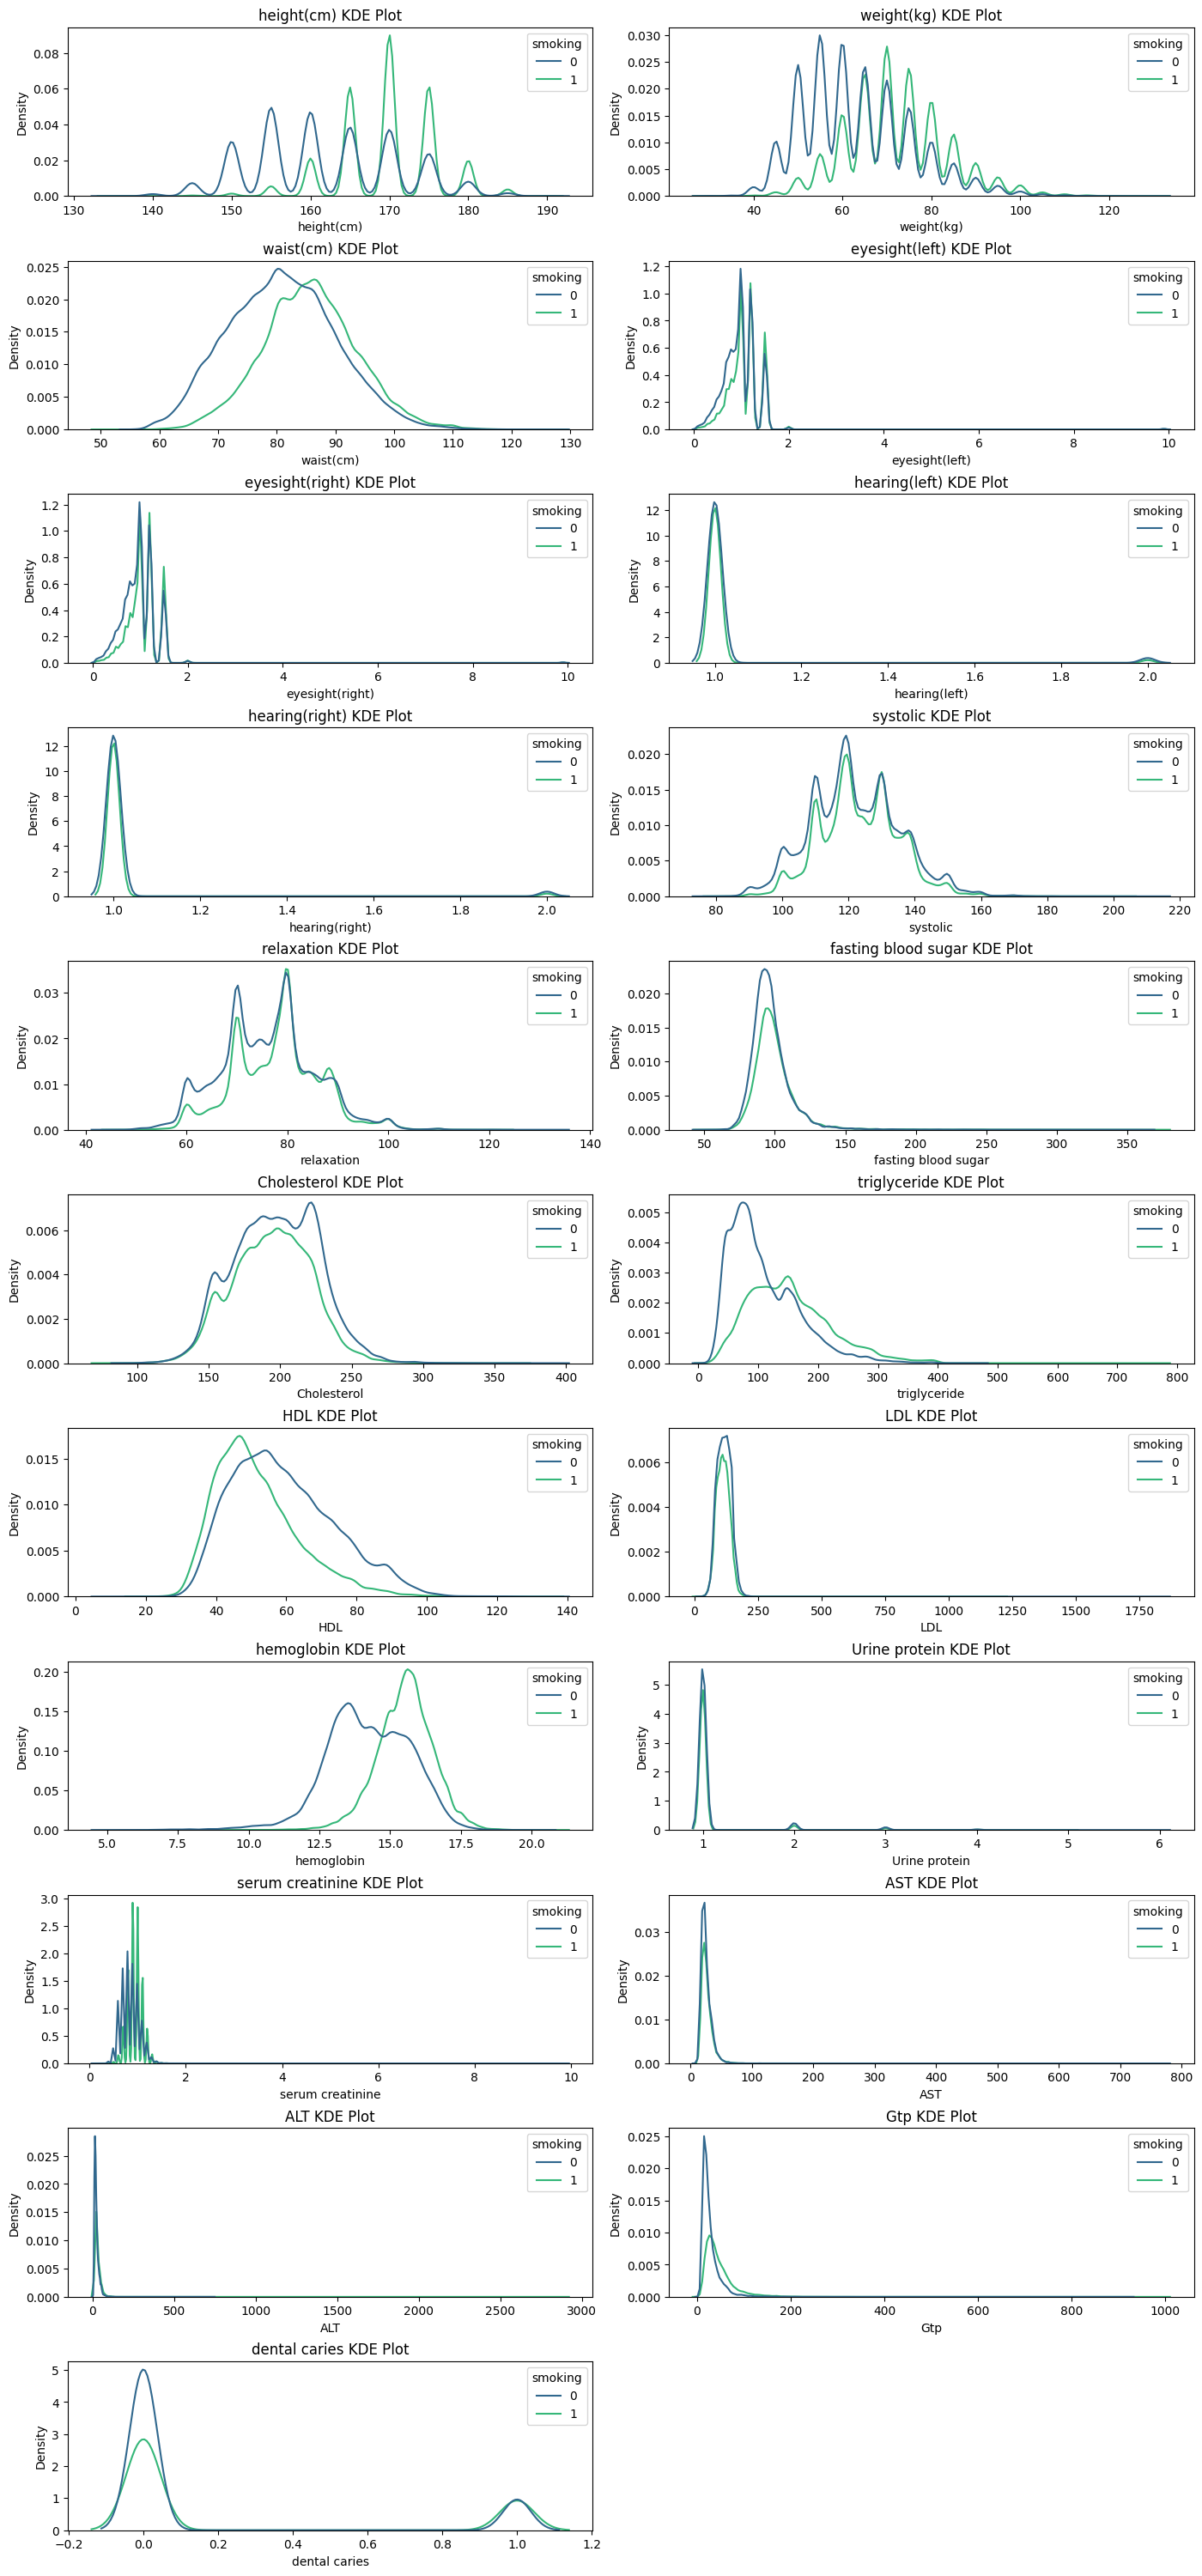

In [15]:
def kde(x):
    sns.kdeplot(x=x,data=df,hue='smoking',palette='viridis')
    
plt.figure(figsize=(14,30))
for idx,column in enumerate(df.columns[1:22]): 
    plt.subplot(11,2,idx+1)
    kde(column)
    plt.title(f"{column} KDE Plot")
    plt.tight_layout(pad=0.7)

In [16]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non defects', 'defects']); ax.yaxis.set_ticklabels(['non defects', 'defects']) 
    plt.show() 

In [17]:
df["BMI"] = df["weight(kg)"] / (df["height(cm)"]/100)**2
df["HDL-LDL Ratio"] = df["HDL"] / df["LDL"]
df["HDL-triglyceride Ratio"] = df["HDL"] / df["triglyceride"]
df["LDL-triglyceride Ratio"] = df["LDL"] / df["triglyceride"]
df["HDL-Cholesterol Ratio"] = df["HDL"] / df["Cholesterol"]
df["LDL-Cholesterol Ratio"] = df["LDL"] / df["Cholesterol"]
df["Liver Enzyme Ratio"] = df["AST"] / df["ALT"]
test["BMI"] = test["weight(kg)"] / (test["height(cm)"]/100)**2
test["HDL-LDL Ratio"] = test["HDL"] / test["LDL"]
test["HDL-triglyceride Ratio"] = test["HDL"] / test["triglyceride"]
test["LDL-triglyceride Ratio"] = test["LDL"] / test["triglyceride"]
test["HDL-Cholesterol Ratio"] = test["HDL"] / test["Cholesterol"]
test["LDL-Cholesterol Ratio"] = test["LDL"] / test["Cholesterol"]
test["Liver Enzyme Ratio"] = test["AST"] / test["ALT"]

In [18]:
df_duplicates = df[df.duplicated()]
print(len(df_duplicates))

0


In [19]:
X = df.drop(["smoking"],axis=1)
y = df["smoking"]
X.shape

(159256, 29)

#### First Try was with 10 features got 86.2% on the real testing data Without adding above generated features 1st submission  model trained with x_train and y_train without hist gradient
#### Now using 16 got 86.7% on the real testing data Without adding above generated features 2nd model trained with x_train and y_train without hist gradient
#### Using 18 features got 86.94% on the real testing data Without adding above generated features 3rd model trained with x_train and y_train without hist gradient
#### 4th try with the above generated features  and then using 23 features model trained with x_best_features and y got 86.95% without hist gradient
#### 5th try same as above but predicted values are multiplied by .7 got same result as above without hist gradient
#### 6th try with 24 features also generated features as above also added new model histgradient 86.908%
#### 7th same as 4th try but with hist gradient model got 86.954%
#### 8th try same as above got 86.94%
#### 9th try added neural network model with 23 features got 86.944%
#### 10th try removed random forest model from voting classifier and got 45%
#### 11th try was same as above as i didnt run the submission to csv cell
#### 12th try removed hist gradient model from voting classifier and got 46%
#### 13th try was same as 4th but was trained with x_best_features and got 55%
#### 14th try was same as 4th but trained with x_train and y_train got 86.96%
#### 15th try was same as above as i didnt run the sumission to csv cell
#### 16th try sumitted using stackinclassifier prediction got 87.04%
#### 17th try same as above and same reason
#### 18th try used predicted values of both voting*0.7  + stacking classifier*0.3 got 87%

In [41]:
chi2_features = SelectKBest(chi2,k=26)##k = 1st tried with 10 then 16 then 18 then 23 then 24
x_best_features = chi2_features.fit_transform(X,y)

In [42]:
x_best_features.shape

(159256, 26)

In [43]:
x_best_features

array([[ 55.        , 165.        ,  60.        , ...,   0.25      ,
          0.23255814,   0.88      ],
       [ 70.        , 165.        ,  65.        , ...,   2.29090909,
          0.29381443,   1.17391304],
       [ 20.        , 170.        ,  75.        , ...,   0.47208122,
          0.25280899,   0.87096774],
       ...,
       [ 40.        , 160.        ,  50.        , ...,   2.06666667,
          0.46031746,   1.66666667],
       [ 50.        , 165.        ,  75.        , ...,   0.54054054,
          0.33333333,   1.29411765],
       [ 40.        , 145.        ,  45.        , ...,   0.93103448,
          0.46774194,   1.3125    ]])

In [44]:
selected_feature_indices = SelectKBest(chi2, k=26).fit(X, y).get_support(indices=True)##k = 1st tried with 10 then 16 then 18 then 23 then 24

In [45]:
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

In [46]:
selected_feature_names

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'BMI',
 'HDL-LDL Ratio',
 'HDL-triglyceride Ratio',
 'LDL-triglyceride Ratio',
 'HDL-Cholesterol Ratio',
 'Liver Enzyme Ratio']

In [22]:
test = test[selected_feature_names]

In [23]:
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,AST,ALT,Gtp,dental caries,BMI,HDL-LDL Ratio,HDL-triglyceride Ratio,LDL-triglyceride Ratio,HDL-Cholesterol Ratio,Liver Enzyme Ratio
0,40,165,70,84.0,1.2,1.2,130,89,107,200,...,19,25,32,0,25.711662,0.426087,0.263441,0.618280,0.245000,0.760000
1,80,160,60,93.0,1.0,1.0,144,72,93,172,...,20,12,24,0,23.437500,0.336538,0.221519,0.658228,0.203488,1.666667
2,60,170,70,86.5,0.6,0.7,117,75,92,161,...,38,60,36,0,24.221453,0.443182,0.225434,0.508671,0.242236,0.633333
3,40,160,50,67.0,0.3,0.4,116,62,91,213,...,25,18,10,1,19.531250,0.585938,1.595745,2.723404,0.352113,1.388889
4,40,170,75,89.4,1.0,0.9,132,94,79,170,...,30,39,27,1,25.951557,0.317073,0.390000,1.230000,0.229412,0.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,40,165,60,78.0,0.8,0.9,112,78,134,225,...,24,31,28,0,22.038567,0.395973,0.719512,1.817073,0.262222,0.774194
106167,40,170,85,95.0,1.2,1.2,130,90,97,180,...,25,31,38,0,29.411765,0.440000,0.236559,0.537634,0.244444,0.806452
106168,35,170,85,89.0,1.2,1.2,131,86,106,211,...,33,32,24,1,29.411765,0.373239,0.697368,1.868421,0.251185,1.031250
106169,40,160,60,67.0,0.7,0.8,120,80,92,175,...,42,36,32,0,23.437500,0.533981,0.679012,1.271605,0.314286,1.166667


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_best_features,y,test_size=0.2,random_state=2)

In [25]:
param_test ={
                 'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4,0.5,0.6]
                }


clf = LGBMClassifier(boosting_type='gbdt',\
                      num_leaves=10, \
                   max_depth=-1, \
                   n_estimators=100, \
                   subsample_for_bin=600000, \
                   min_split_gain=0.0, \
                   min_child_weight=0.001, \
                   min_child_samples=20, \
                   subsample=1.0, \
                   subsample_freq=0, \
                   colsample_bytree=1.0, \
                   reg_alpha=0.0, \
                   reg_lambda=0.0, \
                   random_state=None,\
                   n_jobs=-1,\
                   silent=True, \
                   importance_type='split'
                  )


gs = GridSearchCV(
                    estimator=clf,
                    param_grid = param_test, 
                    scoring='roc_auc',
                    cv=7
                  )

gs.fit(x_best_features, y)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3511
[LightGBM] [Info] Number of data points in the train set: 109203, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437406 -> initscore=-0.251698
[LightGBM] [Info] Start training from score -0.251698
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wis

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3524
[LightGBM] [Info] Number of data points in the train set: 109204, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437402 -> initscore=-0.251714
[LightGBM] [Info] Start training from score -0.251714
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3526
[LightGBM] [Info] Number of data points in the train set: 109203, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437406 -> initscore=-0.251698
[LightGBM] [Info] Start training from score -0.251698
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3520
[LightGBM] [Info] Number of data points in the train set: 109203, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437406 -> initscore=-0.251698
[LightGBM] [Info] Start training from score -0.251698
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 109204, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437402 -> initscore=-0.251714
[LightGBM] [Info] Start training from score -0.251714
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3518
[LightGBM] [Info] Number of data points in the train set: 109204, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437402 -> initscore=-0.251714
[LightGBM] [Info] Start training from score -0.251714
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3520
[LightGBM] [Info] Number of data points in the train set: 109203, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437406 -> initscore=-0.251698
[LightGBM] [Info] Start training from score -0.251698
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 109204, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437402 -> initscore=-0.251714
[LightGBM] [Info] Start training from score -0.251714
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 55727, number of negative

GridSearchCV(cv=7,
             estimator=LGBMClassifier(n_jobs=-1, num_leaves=10, silent=True,
                                      subsample_for_bin=600000),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.08,
                                           0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
             scoring='roc_auc')

In [26]:
print("tuned hpyerparameters :(best parameters) ",gs.best_params_)
lgbm_best_score = gs.best_score_
print("accuracy :",lgbm_best_score)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.3}
accuracy : 0.8624051313423584


In [27]:
lgbm = LGBMClassifier(boosting_type='gbdt',\
                      num_leaves=10, \
                   max_depth=-1, \
                   n_estimators=100, \
                   subsample_for_bin=600000, \
                   min_split_gain=0.0, \
                   min_child_weight=0.001, \
                   min_child_samples=20, \
                   subsample=1.0, \
                   subsample_freq=0, \
                   colsample_bytree=1.0, \
                   reg_alpha=0.0, \
                   reg_lambda=0.0, \
                   random_state=None,\
                   n_jobs=-1,\
                   silent=True, \
                   importance_type='split', \
                   learning_rate = 0.3
                  )
lgbm.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 55727, number of negative: 71677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437404 -> initscore=-0.251705
[LightGBM] [Info] Start training from score -0.251705


LGBMClassifier(learning_rate=0.3, n_jobs=-1, num_leaves=10, silent=True,
               subsample_for_bin=600000)

In [28]:
lgbm.score(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: silent


0.7875890866848765

In [32]:
# y_score1 = lgbm.predict_proba(x_test)[:,1]
# false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - LGBM')
# plt.plot(false_positive_rate1, true_positive_rate1)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [29]:
print("CV score of LGBM is ",cross_val_score(lgbm,x_train,y_train,cv=7, scoring = 'roc_auc').mean())

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3511
[LightGBM] [Info] Number of data points in the train set: 109203, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437406 -> initscore=-0.251698
[LightGBM] [Info] Start training from score -0.251698
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 47766, number of negative: 61437
[LightGBM] [Info] Auto-choosing col-wis

In [31]:
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
}
catboost = CatBoostClassifier()
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(x_best_features, y)

0:	learn: 0.6881433	total: 307ms	remaining: 30.4s
1:	learn: 0.6832061	total: 328ms	remaining: 16.1s
2:	learn: 0.6783702	total: 346ms	remaining: 11.2s
3:	learn: 0.6737685	total: 364ms	remaining: 8.74s
4:	learn: 0.6692091	total: 381ms	remaining: 7.24s
5:	learn: 0.6647390	total: 399ms	remaining: 6.25s
6:	learn: 0.6605849	total: 412ms	remaining: 5.48s
7:	learn: 0.6562729	total: 425ms	remaining: 4.88s
8:	learn: 0.6522489	total: 436ms	remaining: 4.41s
9:	learn: 0.6485293	total: 448ms	remaining: 4.03s
10:	learn: 0.6445484	total: 462ms	remaining: 3.73s
11:	learn: 0.6408291	total: 479ms	remaining: 3.51s
12:	learn: 0.6373661	total: 495ms	remaining: 3.31s
13:	learn: 0.6337539	total: 514ms	remaining: 3.16s
14:	learn: 0.6303637	total: 532ms	remaining: 3.01s
15:	learn: 0.6269287	total: 547ms	remaining: 2.87s
16:	learn: 0.6235662	total: 569ms	remaining: 2.78s
17:	learn: 0.6203274	total: 585ms	remaining: 2.67s
18:	learn: 0.6172599	total: 600ms	remaining: 2.56s
19:	learn: 0.6143354	total: 621ms	remaini

68:	learn: 0.5312005	total: 991ms	remaining: 445ms
69:	learn: 0.5303207	total: 1s	remaining: 431ms
70:	learn: 0.5293267	total: 1.02s	remaining: 416ms
71:	learn: 0.5285355	total: 1.03s	remaining: 401ms
72:	learn: 0.5277012	total: 1.04s	remaining: 386ms
73:	learn: 0.5269015	total: 1.06s	remaining: 373ms
74:	learn: 0.5260113	total: 1.07s	remaining: 358ms
75:	learn: 0.5252119	total: 1.09s	remaining: 343ms
76:	learn: 0.5243574	total: 1.1s	remaining: 328ms
77:	learn: 0.5236225	total: 1.11s	remaining: 313ms
78:	learn: 0.5228656	total: 1.12s	remaining: 299ms
79:	learn: 0.5222044	total: 1.14s	remaining: 284ms
80:	learn: 0.5214847	total: 1.15s	remaining: 270ms
81:	learn: 0.5207698	total: 1.17s	remaining: 256ms
82:	learn: 0.5199808	total: 1.18s	remaining: 242ms
83:	learn: 0.5192929	total: 1.19s	remaining: 227ms
84:	learn: 0.5187696	total: 1.21s	remaining: 213ms
85:	learn: 0.5181645	total: 1.22s	remaining: 198ms
86:	learn: 0.5175186	total: 1.23s	remaining: 184ms
87:	learn: 0.5167831	total: 1.24s	r

41:	learn: 0.4809685	total: 900ms	remaining: 1.24s
42:	learn: 0.4803429	total: 918ms	remaining: 1.22s
43:	learn: 0.4797251	total: 947ms	remaining: 1.21s
44:	learn: 0.4793235	total: 974ms	remaining: 1.19s
45:	learn: 0.4786427	total: 998ms	remaining: 1.17s
46:	learn: 0.4779779	total: 1.02s	remaining: 1.15s
47:	learn: 0.4774287	total: 1.05s	remaining: 1.14s
48:	learn: 0.4770355	total: 1.07s	remaining: 1.12s
49:	learn: 0.4766483	total: 1.1s	remaining: 1.1s
50:	learn: 0.4762274	total: 1.11s	remaining: 1.07s
51:	learn: 0.4757219	total: 1.13s	remaining: 1.04s
52:	learn: 0.4752835	total: 1.15s	remaining: 1.02s
53:	learn: 0.4748467	total: 1.17s	remaining: 993ms
54:	learn: 0.4745529	total: 1.18s	remaining: 965ms
55:	learn: 0.4741949	total: 1.19s	remaining: 938ms
56:	learn: 0.4737475	total: 1.21s	remaining: 913ms
57:	learn: 0.4732338	total: 1.23s	remaining: 889ms
58:	learn: 0.4728555	total: 1.24s	remaining: 864ms
59:	learn: 0.4725383	total: 1.26s	remaining: 841ms
60:	learn: 0.4721533	total: 1.28s

14:	learn: 0.5256663	total: 236ms	remaining: 1.34s
15:	learn: 0.5220201	total: 253ms	remaining: 1.33s
16:	learn: 0.5188900	total: 268ms	remaining: 1.31s
17:	learn: 0.5156186	total: 283ms	remaining: 1.29s
18:	learn: 0.5125782	total: 297ms	remaining: 1.26s
19:	learn: 0.5102548	total: 314ms	remaining: 1.26s
20:	learn: 0.5077912	total: 330ms	remaining: 1.24s
21:	learn: 0.5056616	total: 346ms	remaining: 1.23s
22:	learn: 0.5034774	total: 363ms	remaining: 1.22s
23:	learn: 0.5014074	total: 381ms	remaining: 1.21s
24:	learn: 0.4995838	total: 397ms	remaining: 1.19s
25:	learn: 0.4979747	total: 414ms	remaining: 1.18s
26:	learn: 0.4964239	total: 430ms	remaining: 1.16s
27:	learn: 0.4950376	total: 447ms	remaining: 1.15s
28:	learn: 0.4937053	total: 463ms	remaining: 1.13s
29:	learn: 0.4928004	total: 479ms	remaining: 1.12s
30:	learn: 0.4916103	total: 494ms	remaining: 1.1s
31:	learn: 0.4904920	total: 510ms	remaining: 1.08s
32:	learn: 0.4896343	total: 524ms	remaining: 1.06s
33:	learn: 0.4886341	total: 541m

79:	learn: 0.4553703	total: 1.55s	remaining: 387ms
80:	learn: 0.4552493	total: 1.57s	remaining: 368ms
81:	learn: 0.4550592	total: 1.6s	remaining: 352ms
82:	learn: 0.4549502	total: 1.62s	remaining: 333ms
83:	learn: 0.4547352	total: 1.64s	remaining: 313ms
84:	learn: 0.4545279	total: 1.66s	remaining: 293ms
85:	learn: 0.4543264	total: 1.68s	remaining: 273ms
86:	learn: 0.4541699	total: 1.7s	remaining: 254ms
87:	learn: 0.4540449	total: 1.72s	remaining: 234ms
88:	learn: 0.4539704	total: 1.75s	remaining: 216ms
89:	learn: 0.4538595	total: 1.77s	remaining: 197ms
90:	learn: 0.4537076	total: 1.8s	remaining: 178ms
91:	learn: 0.4536307	total: 1.83s	remaining: 159ms
92:	learn: 0.4534579	total: 1.86s	remaining: 140ms
93:	learn: 0.4533202	total: 1.89s	remaining: 121ms
94:	learn: 0.4532244	total: 1.91s	remaining: 101ms
95:	learn: 0.4530704	total: 1.94s	remaining: 80.9ms
96:	learn: 0.4529748	total: 1.97s	remaining: 61ms
97:	learn: 0.4528536	total: 2s	remaining: 40.8ms
98:	learn: 0.4527452	total: 2.02s	re

43:	learn: 0.4670767	total: 669ms	remaining: 851ms
44:	learn: 0.4667653	total: 688ms	remaining: 841ms
45:	learn: 0.4663194	total: 709ms	remaining: 832ms
46:	learn: 0.4657880	total: 725ms	remaining: 817ms
47:	learn: 0.4655072	total: 738ms	remaining: 800ms
48:	learn: 0.4652340	total: 754ms	remaining: 785ms
49:	learn: 0.4648065	total: 771ms	remaining: 771ms
50:	learn: 0.4645037	total: 787ms	remaining: 757ms
51:	learn: 0.4641153	total: 804ms	remaining: 742ms
52:	learn: 0.4638421	total: 821ms	remaining: 728ms
53:	learn: 0.4635766	total: 835ms	remaining: 712ms
54:	learn: 0.4632519	total: 850ms	remaining: 696ms
55:	learn: 0.4630925	total: 867ms	remaining: 681ms
56:	learn: 0.4625171	total: 883ms	remaining: 666ms
57:	learn: 0.4622743	total: 902ms	remaining: 653ms
58:	learn: 0.4619401	total: 920ms	remaining: 639ms
59:	learn: 0.4617478	total: 937ms	remaining: 624ms
60:	learn: 0.4615565	total: 953ms	remaining: 609ms
61:	learn: 0.4614058	total: 970ms	remaining: 595ms
62:	learn: 0.4611804	total: 986

118:	learn: 0.5002477	total: 1.94s	remaining: 1.32s
119:	learn: 0.4998784	total: 1.96s	remaining: 1.31s
120:	learn: 0.4995107	total: 1.98s	remaining: 1.29s
121:	learn: 0.4991339	total: 1.99s	remaining: 1.27s
122:	learn: 0.4987166	total: 2.01s	remaining: 1.26s
123:	learn: 0.4983998	total: 2.02s	remaining: 1.24s
124:	learn: 0.4980778	total: 2.04s	remaining: 1.23s
125:	learn: 0.4977278	total: 2.06s	remaining: 1.21s
126:	learn: 0.4974690	total: 2.08s	remaining: 1.2s
127:	learn: 0.4971441	total: 2.09s	remaining: 1.18s
128:	learn: 0.4968219	total: 2.11s	remaining: 1.16s
129:	learn: 0.4964989	total: 2.12s	remaining: 1.14s
130:	learn: 0.4961937	total: 2.14s	remaining: 1.13s
131:	learn: 0.4958736	total: 2.15s	remaining: 1.11s
132:	learn: 0.4955812	total: 2.17s	remaining: 1.09s
133:	learn: 0.4952642	total: 2.19s	remaining: 1.08s
134:	learn: 0.4950229	total: 2.2s	remaining: 1.06s
135:	learn: 0.4947916	total: 2.22s	remaining: 1.05s
136:	learn: 0.4945085	total: 2.24s	remaining: 1.03s
137:	learn: 0.

81:	learn: 0.5207698	total: 1.29s	remaining: 1.86s
82:	learn: 0.5199808	total: 1.31s	remaining: 1.85s
83:	learn: 0.5192929	total: 1.33s	remaining: 1.84s
84:	learn: 0.5187696	total: 1.35s	remaining: 1.82s
85:	learn: 0.5181645	total: 1.36s	remaining: 1.81s
86:	learn: 0.5175186	total: 1.38s	remaining: 1.79s
87:	learn: 0.5167831	total: 1.4s	remaining: 1.78s
88:	learn: 0.5162574	total: 1.41s	remaining: 1.76s
89:	learn: 0.5156766	total: 1.43s	remaining: 1.75s
90:	learn: 0.5151911	total: 1.44s	remaining: 1.73s
91:	learn: 0.5146423	total: 1.46s	remaining: 1.71s
92:	learn: 0.5140643	total: 1.48s	remaining: 1.7s
93:	learn: 0.5134444	total: 1.49s	remaining: 1.68s
94:	learn: 0.5128225	total: 1.51s	remaining: 1.67s
95:	learn: 0.5122209	total: 1.53s	remaining: 1.65s
96:	learn: 0.5116599	total: 1.54s	remaining: 1.64s
97:	learn: 0.5111724	total: 1.56s	remaining: 1.62s
98:	learn: 0.5107979	total: 1.57s	remaining: 1.61s
99:	learn: 0.5103212	total: 1.59s	remaining: 1.59s
100:	learn: 0.5097674	total: 1.61

42:	learn: 0.5638882	total: 663ms	remaining: 2.42s
43:	learn: 0.5621567	total: 683ms	remaining: 2.42s
44:	learn: 0.5604807	total: 701ms	remaining: 2.41s
45:	learn: 0.5588889	total: 717ms	remaining: 2.4s
46:	learn: 0.5572773	total: 734ms	remaining: 2.39s
47:	learn: 0.5557067	total: 750ms	remaining: 2.38s
48:	learn: 0.5543071	total: 765ms	remaining: 2.36s
49:	learn: 0.5528201	total: 781ms	remaining: 2.34s
50:	learn: 0.5515165	total: 798ms	remaining: 2.33s
51:	learn: 0.5500797	total: 815ms	remaining: 2.32s
52:	learn: 0.5488129	total: 831ms	remaining: 2.3s
53:	learn: 0.5475278	total: 846ms	remaining: 2.29s
54:	learn: 0.5462910	total: 862ms	remaining: 2.27s
55:	learn: 0.5449994	total: 880ms	remaining: 2.26s
56:	learn: 0.5437755	total: 900ms	remaining: 2.26s
57:	learn: 0.5426077	total: 917ms	remaining: 2.24s
58:	learn: 0.5413648	total: 932ms	remaining: 2.23s
59:	learn: 0.5403029	total: 948ms	remaining: 2.21s
60:	learn: 0.5392013	total: 964ms	remaining: 2.2s
61:	learn: 0.5381072	total: 980ms	

15:	learn: 0.5200133	total: 230ms	remaining: 2.65s
16:	learn: 0.5169955	total: 248ms	remaining: 2.67s
17:	learn: 0.5137546	total: 262ms	remaining: 2.64s
18:	learn: 0.5107526	total: 276ms	remaining: 2.63s
19:	learn: 0.5078590	total: 291ms	remaining: 2.62s
20:	learn: 0.5051750	total: 306ms	remaining: 2.6s
21:	learn: 0.5029709	total: 319ms	remaining: 2.58s
22:	learn: 0.5014986	total: 333ms	remaining: 2.56s
23:	learn: 0.4999012	total: 348ms	remaining: 2.55s
24:	learn: 0.4982108	total: 365ms	remaining: 2.55s
25:	learn: 0.4964538	total: 378ms	remaining: 2.53s
26:	learn: 0.4950424	total: 394ms	remaining: 2.52s
27:	learn: 0.4935198	total: 410ms	remaining: 2.52s
28:	learn: 0.4922131	total: 425ms	remaining: 2.5s
29:	learn: 0.4908728	total: 441ms	remaining: 2.5s
30:	learn: 0.4900914	total: 461ms	remaining: 2.51s
31:	learn: 0.4889500	total: 476ms	remaining: 2.5s
32:	learn: 0.4879922	total: 490ms	remaining: 2.48s
33:	learn: 0.4871177	total: 506ms	remaining: 2.47s
34:	learn: 0.4861787	total: 522ms	r

185:	learn: 0.4532178	total: 3.06s	remaining: 230ms
186:	learn: 0.4531190	total: 3.08s	remaining: 214ms
187:	learn: 0.4530673	total: 3.1s	remaining: 198ms
188:	learn: 0.4530116	total: 3.12s	remaining: 182ms
189:	learn: 0.4529092	total: 3.13s	remaining: 165ms
190:	learn: 0.4528475	total: 3.17s	remaining: 149ms
191:	learn: 0.4527552	total: 3.19s	remaining: 133ms
192:	learn: 0.4527073	total: 3.21s	remaining: 117ms
193:	learn: 0.4526330	total: 3.23s	remaining: 99.9ms
194:	learn: 0.4525104	total: 3.24s	remaining: 83.1ms
195:	learn: 0.4524376	total: 3.26s	remaining: 66.4ms
196:	learn: 0.4524021	total: 3.27s	remaining: 49.8ms
197:	learn: 0.4522776	total: 3.28s	remaining: 33.2ms
198:	learn: 0.4521841	total: 3.3s	remaining: 16.6ms
199:	learn: 0.4521050	total: 3.31s	remaining: 0us
0:	learn: 0.6687826	total: 16.7ms	remaining: 3.33s
1:	learn: 0.6476803	total: 29.4ms	remaining: 2.91s
2:	learn: 0.6290296	total: 44.2ms	remaining: 2.9s
3:	learn: 0.6130586	total: 56.9ms	remaining: 2.79s
4:	learn: 0.599

154:	learn: 0.4577018	total: 2.56s	remaining: 745ms
155:	learn: 0.4576335	total: 2.59s	remaining: 730ms
156:	learn: 0.4575723	total: 2.6s	remaining: 713ms
157:	learn: 0.4574597	total: 2.62s	remaining: 696ms
158:	learn: 0.4573499	total: 2.63s	remaining: 679ms
159:	learn: 0.4572595	total: 2.65s	remaining: 663ms
160:	learn: 0.4572037	total: 2.67s	remaining: 646ms
161:	learn: 0.4571506	total: 2.68s	remaining: 629ms
162:	learn: 0.4570843	total: 2.7s	remaining: 612ms
163:	learn: 0.4569594	total: 2.71s	remaining: 595ms
164:	learn: 0.4568526	total: 2.73s	remaining: 579ms
165:	learn: 0.4567666	total: 2.75s	remaining: 563ms
166:	learn: 0.4567177	total: 2.76s	remaining: 546ms
167:	learn: 0.4566703	total: 2.78s	remaining: 530ms
168:	learn: 0.4565672	total: 2.8s	remaining: 514ms
169:	learn: 0.4564763	total: 2.81s	remaining: 497ms
170:	learn: 0.4564100	total: 2.83s	remaining: 480ms
171:	learn: 0.4563451	total: 2.85s	remaining: 463ms
172:	learn: 0.4562200	total: 2.86s	remaining: 447ms
173:	learn: 0.4

122:	learn: 0.4611499	total: 1.93s	remaining: 1.21s
123:	learn: 0.4610368	total: 1.96s	remaining: 1.2s
124:	learn: 0.4609085	total: 1.97s	remaining: 1.18s
125:	learn: 0.4607975	total: 1.98s	remaining: 1.16s
126:	learn: 0.4606970	total: 2s	remaining: 1.15s
127:	learn: 0.4606058	total: 2.01s	remaining: 1.13s
128:	learn: 0.4605016	total: 2.03s	remaining: 1.12s
129:	learn: 0.4604130	total: 2.04s	remaining: 1.1s
130:	learn: 0.4602885	total: 2.06s	remaining: 1.08s
131:	learn: 0.4601988	total: 2.08s	remaining: 1.07s
132:	learn: 0.4600589	total: 2.09s	remaining: 1.05s
133:	learn: 0.4599224	total: 2.11s	remaining: 1.04s
134:	learn: 0.4598336	total: 2.13s	remaining: 1.02s
135:	learn: 0.4597596	total: 2.15s	remaining: 1.01s
136:	learn: 0.4596029	total: 2.16s	remaining: 994ms
137:	learn: 0.4594404	total: 2.17s	remaining: 977ms
138:	learn: 0.4593607	total: 2.19s	remaining: 961ms
139:	learn: 0.4592903	total: 2.2s	remaining: 945ms
140:	learn: 0.4591526	total: 2.22s	remaining: 930ms
141:	learn: 0.4589

92:	learn: 0.4534579	total: 1.95s	remaining: 2.25s
93:	learn: 0.4533202	total: 1.97s	remaining: 2.22s
94:	learn: 0.4532244	total: 1.99s	remaining: 2.2s
95:	learn: 0.4530704	total: 2s	remaining: 2.17s
96:	learn: 0.4529748	total: 2.02s	remaining: 2.15s
97:	learn: 0.4528536	total: 2.04s	remaining: 2.12s
98:	learn: 0.4527452	total: 2.05s	remaining: 2.1s
99:	learn: 0.4526092	total: 2.07s	remaining: 2.07s
100:	learn: 0.4525182	total: 2.08s	remaining: 2.04s
101:	learn: 0.4524160	total: 2.1s	remaining: 2.02s
102:	learn: 0.4522503	total: 2.12s	remaining: 1.99s
103:	learn: 0.4520449	total: 2.13s	remaining: 1.97s
104:	learn: 0.4518579	total: 2.15s	remaining: 1.95s
105:	learn: 0.4517552	total: 2.17s	remaining: 1.93s
106:	learn: 0.4516492	total: 2.19s	remaining: 1.9s
107:	learn: 0.4515652	total: 2.21s	remaining: 1.88s
108:	learn: 0.4514346	total: 2.22s	remaining: 1.85s
109:	learn: 0.4513570	total: 2.24s	remaining: 1.83s
110:	learn: 0.4512542	total: 2.25s	remaining: 1.81s
111:	learn: 0.4511536	total

58:	learn: 0.4612104	total: 1.32s	remaining: 3.16s
59:	learn: 0.4607817	total: 1.35s	remaining: 3.15s
60:	learn: 0.4605860	total: 1.38s	remaining: 3.14s
61:	learn: 0.4603687	total: 1.4s	remaining: 3.12s
62:	learn: 0.4601780	total: 1.43s	remaining: 3.11s
63:	learn: 0.4599251	total: 1.45s	remaining: 3.09s
64:	learn: 0.4596150	total: 1.48s	remaining: 3.07s
65:	learn: 0.4594068	total: 1.5s	remaining: 3.05s
66:	learn: 0.4592627	total: 1.52s	remaining: 3.02s
67:	learn: 0.4589747	total: 1.54s	remaining: 3s
68:	learn: 0.4587980	total: 1.57s	remaining: 2.97s
69:	learn: 0.4586239	total: 1.59s	remaining: 2.95s
70:	learn: 0.4584641	total: 1.61s	remaining: 2.93s
71:	learn: 0.4583316	total: 1.64s	remaining: 2.91s
72:	learn: 0.4581497	total: 1.66s	remaining: 2.89s
73:	learn: 0.4580740	total: 1.69s	remaining: 2.87s
74:	learn: 0.4579003	total: 1.71s	remaining: 2.84s
75:	learn: 0.4577261	total: 1.74s	remaining: 2.84s
76:	learn: 0.4575336	total: 1.77s	remaining: 2.83s
77:	learn: 0.4572959	total: 1.79s	re

21:	learn: 0.4813992	total: 444ms	remaining: 3.59s
22:	learn: 0.4804877	total: 467ms	remaining: 3.6s
23:	learn: 0.4797802	total: 492ms	remaining: 3.61s
24:	learn: 0.4788147	total: 518ms	remaining: 3.63s
25:	learn: 0.4777804	total: 544ms	remaining: 3.64s
26:	learn: 0.4766775	total: 569ms	remaining: 3.65s
27:	learn: 0.4758269	total: 595ms	remaining: 3.65s
28:	learn: 0.4748779	total: 616ms	remaining: 3.63s
29:	learn: 0.4741254	total: 637ms	remaining: 3.61s
30:	learn: 0.4735174	total: 656ms	remaining: 3.57s
31:	learn: 0.4730437	total: 680ms	remaining: 3.57s
32:	learn: 0.4724110	total: 707ms	remaining: 3.58s
33:	learn: 0.4719355	total: 732ms	remaining: 3.57s
34:	learn: 0.4713070	total: 758ms	remaining: 3.57s
35:	learn: 0.4706358	total: 782ms	remaining: 3.56s
36:	learn: 0.4702086	total: 807ms	remaining: 3.55s
37:	learn: 0.4698540	total: 831ms	remaining: 3.54s
38:	learn: 0.4692222	total: 854ms	remaining: 3.52s
39:	learn: 0.4687610	total: 879ms	remaining: 3.52s
40:	learn: 0.4682603	total: 900m

186:	learn: 0.4453722	total: 4.28s	remaining: 298ms
187:	learn: 0.4453277	total: 4.31s	remaining: 275ms
188:	learn: 0.4452638	total: 4.34s	remaining: 253ms
189:	learn: 0.4451985	total: 4.39s	remaining: 231ms
190:	learn: 0.4451178	total: 4.44s	remaining: 209ms
191:	learn: 0.4450051	total: 4.49s	remaining: 187ms
192:	learn: 0.4449145	total: 4.54s	remaining: 165ms
193:	learn: 0.4448397	total: 4.58s	remaining: 142ms
194:	learn: 0.4447837	total: 4.63s	remaining: 119ms
195:	learn: 0.4447133	total: 4.68s	remaining: 95.6ms
196:	learn: 0.4446364	total: 4.74s	remaining: 72.2ms
197:	learn: 0.4446030	total: 4.79s	remaining: 48.4ms
198:	learn: 0.4445478	total: 4.83s	remaining: 24.3ms
199:	learn: 0.4444873	total: 4.89s	remaining: 0us
0:	learn: 0.6881433	total: 56.7ms	remaining: 17s
1:	learn: 0.6832061	total: 92.6ms	remaining: 13.8s
2:	learn: 0.6783702	total: 144ms	remaining: 14.2s
3:	learn: 0.6737685	total: 190ms	remaining: 14s
4:	learn: 0.6692091	total: 241ms	remaining: 14.2s
5:	learn: 0.6647390	to

150:	learn: 0.4909979	total: 5.18s	remaining: 5.11s
151:	learn: 0.4907547	total: 5.2s	remaining: 5.07s
152:	learn: 0.4905226	total: 5.22s	remaining: 5.02s
153:	learn: 0.4903220	total: 5.25s	remaining: 4.97s
154:	learn: 0.4901411	total: 5.27s	remaining: 4.93s
155:	learn: 0.4899221	total: 5.29s	remaining: 4.88s
156:	learn: 0.4897260	total: 5.31s	remaining: 4.84s
157:	learn: 0.4894874	total: 5.33s	remaining: 4.79s
158:	learn: 0.4892757	total: 5.35s	remaining: 4.74s
159:	learn: 0.4890854	total: 5.37s	remaining: 4.7s
160:	learn: 0.4889118	total: 5.39s	remaining: 4.65s
161:	learn: 0.4887139	total: 5.41s	remaining: 4.61s
162:	learn: 0.4885128	total: 5.43s	remaining: 4.57s
163:	learn: 0.4883111	total: 5.45s	remaining: 4.52s
164:	learn: 0.4880918	total: 5.47s	remaining: 4.48s
165:	learn: 0.4878748	total: 5.5s	remaining: 4.44s
166:	learn: 0.4876688	total: 5.51s	remaining: 4.39s
167:	learn: 0.4874810	total: 5.54s	remaining: 4.35s
168:	learn: 0.4873068	total: 5.55s	remaining: 4.31s
169:	learn: 0.4

12:	learn: 0.6381073	total: 436ms	remaining: 9.63s
13:	learn: 0.6345318	total: 478ms	remaining: 9.77s
14:	learn: 0.6309747	total: 514ms	remaining: 9.77s
15:	learn: 0.6275223	total: 557ms	remaining: 9.89s
16:	learn: 0.6242154	total: 602ms	remaining: 10s
17:	learn: 0.6209590	total: 662ms	remaining: 10.4s
18:	learn: 0.6179071	total: 714ms	remaining: 10.6s
19:	learn: 0.6148487	total: 766ms	remaining: 10.7s
20:	learn: 0.6120064	total: 817ms	remaining: 10.8s
21:	learn: 0.6090885	total: 871ms	remaining: 11s
22:	learn: 0.6062532	total: 923ms	remaining: 11.1s
23:	learn: 0.6035215	total: 970ms	remaining: 11.2s
24:	learn: 0.6007651	total: 1.03s	remaining: 11.4s
25:	learn: 0.5981106	total: 1.08s	remaining: 11.4s
26:	learn: 0.5955866	total: 1.14s	remaining: 11.5s
27:	learn: 0.5934465	total: 1.18s	remaining: 11.4s
28:	learn: 0.5910191	total: 1.23s	remaining: 11.5s
29:	learn: 0.5886602	total: 1.28s	remaining: 11.5s
30:	learn: 0.5864753	total: 1.32s	remaining: 11.5s
31:	learn: 0.5842688	total: 1.36s	r

176:	learn: 0.4876145	total: 7.45s	remaining: 5.17s
177:	learn: 0.4874675	total: 7.49s	remaining: 5.13s
178:	learn: 0.4872664	total: 7.53s	remaining: 5.09s
179:	learn: 0.4870840	total: 7.56s	remaining: 5.04s
180:	learn: 0.4868995	total: 7.6s	remaining: 4.99s
181:	learn: 0.4867118	total: 7.63s	remaining: 4.95s
182:	learn: 0.4865783	total: 7.66s	remaining: 4.9s
183:	learn: 0.4864351	total: 7.72s	remaining: 4.87s
184:	learn: 0.4862708	total: 7.77s	remaining: 4.83s
185:	learn: 0.4861157	total: 7.8s	remaining: 4.78s
186:	learn: 0.4859799	total: 7.83s	remaining: 4.73s
187:	learn: 0.4858245	total: 7.86s	remaining: 4.68s
188:	learn: 0.4856646	total: 7.88s	remaining: 4.63s
189:	learn: 0.4855213	total: 7.9s	remaining: 4.58s
190:	learn: 0.4853736	total: 7.92s	remaining: 4.52s
191:	learn: 0.4852478	total: 7.95s	remaining: 4.47s
192:	learn: 0.4851263	total: 7.97s	remaining: 4.42s
193:	learn: 0.4849875	total: 7.99s	remaining: 4.37s
194:	learn: 0.4848603	total: 8.01s	remaining: 4.31s
195:	learn: 0.48

43:	learn: 0.5621567	total: 868ms	remaining: 5.05s
44:	learn: 0.5604807	total: 895ms	remaining: 5.07s
45:	learn: 0.5588889	total: 919ms	remaining: 5.07s
46:	learn: 0.5572773	total: 939ms	remaining: 5.06s
47:	learn: 0.5557067	total: 957ms	remaining: 5.02s
48:	learn: 0.5543071	total: 976ms	remaining: 5s
49:	learn: 0.5528201	total: 996ms	remaining: 4.98s
50:	learn: 0.5515165	total: 1.01s	remaining: 4.95s
51:	learn: 0.5500797	total: 1.03s	remaining: 4.91s
52:	learn: 0.5488129	total: 1.05s	remaining: 4.88s
53:	learn: 0.5475278	total: 1.06s	remaining: 4.85s
54:	learn: 0.5462910	total: 1.09s	remaining: 4.85s
55:	learn: 0.5449994	total: 1.11s	remaining: 4.82s
56:	learn: 0.5437755	total: 1.12s	remaining: 4.79s
57:	learn: 0.5426077	total: 1.14s	remaining: 4.76s
58:	learn: 0.5413648	total: 1.16s	remaining: 4.73s
59:	learn: 0.5403029	total: 1.18s	remaining: 4.71s
60:	learn: 0.5392013	total: 1.19s	remaining: 4.67s
61:	learn: 0.5381072	total: 1.21s	remaining: 4.64s
62:	learn: 0.5371187	total: 1.23s	

204:	learn: 0.4833551	total: 4.93s	remaining: 2.28s
205:	learn: 0.4832030	total: 5.04s	remaining: 2.3s
206:	learn: 0.4830828	total: 5.12s	remaining: 2.3s
207:	learn: 0.4829840	total: 5.16s	remaining: 2.28s
208:	learn: 0.4828806	total: 5.18s	remaining: 2.26s
209:	learn: 0.4827479	total: 5.22s	remaining: 2.24s
210:	learn: 0.4825980	total: 5.24s	remaining: 2.21s
211:	learn: 0.4824783	total: 5.26s	remaining: 2.18s
212:	learn: 0.4823429	total: 5.28s	remaining: 2.16s
213:	learn: 0.4822095	total: 5.3s	remaining: 2.13s
214:	learn: 0.4821243	total: 5.33s	remaining: 2.1s
215:	learn: 0.4819841	total: 5.35s	remaining: 2.08s
216:	learn: 0.4818753	total: 5.38s	remaining: 2.06s
217:	learn: 0.4817709	total: 5.4s	remaining: 2.03s
218:	learn: 0.4816413	total: 5.43s	remaining: 2.01s
219:	learn: 0.4815421	total: 5.45s	remaining: 1.98s
220:	learn: 0.4814457	total: 5.47s	remaining: 1.96s
221:	learn: 0.4813490	total: 5.49s	remaining: 1.93s
222:	learn: 0.4812439	total: 5.51s	remaining: 1.9s
223:	learn: 0.4811

70:	learn: 0.4688716	total: 1.24s	remaining: 3.99s
71:	learn: 0.4686216	total: 1.25s	remaining: 3.98s
72:	learn: 0.4683430	total: 1.27s	remaining: 3.96s
73:	learn: 0.4680501	total: 1.29s	remaining: 3.94s
74:	learn: 0.4676810	total: 1.3s	remaining: 3.91s
75:	learn: 0.4674507	total: 1.32s	remaining: 3.89s
76:	learn: 0.4671525	total: 1.33s	remaining: 3.87s
77:	learn: 0.4668905	total: 1.35s	remaining: 3.84s
78:	learn: 0.4666532	total: 1.36s	remaining: 3.82s
79:	learn: 0.4664711	total: 1.38s	remaining: 3.8s
80:	learn: 0.4662923	total: 1.4s	remaining: 3.78s
81:	learn: 0.4660690	total: 1.41s	remaining: 3.75s
82:	learn: 0.4658893	total: 1.43s	remaining: 3.73s
83:	learn: 0.4656001	total: 1.45s	remaining: 3.73s
84:	learn: 0.4653889	total: 1.47s	remaining: 3.72s
85:	learn: 0.4651833	total: 1.49s	remaining: 3.71s
86:	learn: 0.4649935	total: 1.51s	remaining: 3.7s
87:	learn: 0.4648042	total: 1.53s	remaining: 3.68s
88:	learn: 0.4646053	total: 1.55s	remaining: 3.68s
89:	learn: 0.4643922	total: 1.57s	r

232:	learn: 0.4499779	total: 4.01s	remaining: 1.15s
233:	learn: 0.4499221	total: 4.03s	remaining: 1.14s
234:	learn: 0.4498869	total: 4.05s	remaining: 1.12s
235:	learn: 0.4498255	total: 4.06s	remaining: 1.1s
236:	learn: 0.4497745	total: 4.08s	remaining: 1.08s
237:	learn: 0.4497178	total: 4.09s	remaining: 1.07s
238:	learn: 0.4496732	total: 4.11s	remaining: 1.05s
239:	learn: 0.4496218	total: 4.13s	remaining: 1.03s
240:	learn: 0.4495402	total: 4.14s	remaining: 1.01s
241:	learn: 0.4494923	total: 4.16s	remaining: 997ms
242:	learn: 0.4494380	total: 4.18s	remaining: 980ms
243:	learn: 0.4493855	total: 4.19s	remaining: 963ms
244:	learn: 0.4493150	total: 4.21s	remaining: 945ms
245:	learn: 0.4492320	total: 4.22s	remaining: 928ms
246:	learn: 0.4492019	total: 4.25s	remaining: 912ms
247:	learn: 0.4491414	total: 4.27s	remaining: 895ms
248:	learn: 0.4490919	total: 4.28s	remaining: 878ms
249:	learn: 0.4489982	total: 4.3s	remaining: 860ms
250:	learn: 0.4489100	total: 4.32s	remaining: 843ms
251:	learn: 0.

97:	learn: 0.4651905	total: 1.52s	remaining: 3.13s
98:	learn: 0.4649945	total: 1.54s	remaining: 3.12s
99:	learn: 0.4647066	total: 1.55s	remaining: 3.11s
100:	learn: 0.4644267	total: 1.57s	remaining: 3.1s
101:	learn: 0.4641687	total: 1.59s	remaining: 3.09s
102:	learn: 0.4640131	total: 1.61s	remaining: 3.08s
103:	learn: 0.4638271	total: 1.63s	remaining: 3.07s
104:	learn: 0.4636740	total: 1.65s	remaining: 3.06s
105:	learn: 0.4635369	total: 1.67s	remaining: 3.05s
106:	learn: 0.4632788	total: 1.68s	remaining: 3.04s
107:	learn: 0.4631199	total: 1.7s	remaining: 3.02s
108:	learn: 0.4629744	total: 1.71s	remaining: 3s
109:	learn: 0.4628627	total: 1.73s	remaining: 2.98s
110:	learn: 0.4627251	total: 1.75s	remaining: 2.97s
111:	learn: 0.4626353	total: 1.76s	remaining: 2.96s
112:	learn: 0.4624802	total: 1.78s	remaining: 2.95s
113:	learn: 0.4623029	total: 1.8s	remaining: 2.93s
114:	learn: 0.4621948	total: 1.81s	remaining: 2.91s
115:	learn: 0.4620946	total: 1.83s	remaining: 2.9s
116:	learn: 0.4619848	

266:	learn: 0.4502410	total: 4.27s	remaining: 528ms
267:	learn: 0.4501986	total: 4.29s	remaining: 512ms
268:	learn: 0.4501392	total: 4.31s	remaining: 497ms
269:	learn: 0.4500852	total: 4.33s	remaining: 482ms
270:	learn: 0.4500529	total: 4.36s	remaining: 466ms
271:	learn: 0.4500058	total: 4.38s	remaining: 451ms
272:	learn: 0.4499646	total: 4.4s	remaining: 435ms
273:	learn: 0.4498956	total: 4.41s	remaining: 419ms
274:	learn: 0.4498581	total: 4.43s	remaining: 403ms
275:	learn: 0.4498123	total: 4.45s	remaining: 387ms
276:	learn: 0.4497580	total: 4.46s	remaining: 371ms
277:	learn: 0.4497042	total: 4.48s	remaining: 355ms
278:	learn: 0.4496616	total: 4.5s	remaining: 339ms
279:	learn: 0.4495872	total: 4.52s	remaining: 323ms
280:	learn: 0.4495352	total: 4.54s	remaining: 307ms
281:	learn: 0.4495015	total: 4.55s	remaining: 291ms
282:	learn: 0.4494257	total: 4.57s	remaining: 274ms
283:	learn: 0.4493629	total: 4.59s	remaining: 258ms
284:	learn: 0.4493219	total: 4.61s	remaining: 242ms
285:	learn: 0.

133:	learn: 0.4599224	total: 2.15s	remaining: 2.67s
134:	learn: 0.4598336	total: 2.17s	remaining: 2.66s
135:	learn: 0.4597596	total: 2.19s	remaining: 2.64s
136:	learn: 0.4596029	total: 2.21s	remaining: 2.63s
137:	learn: 0.4594404	total: 2.22s	remaining: 2.61s
138:	learn: 0.4593607	total: 2.24s	remaining: 2.59s
139:	learn: 0.4592903	total: 2.25s	remaining: 2.58s
140:	learn: 0.4591526	total: 2.27s	remaining: 2.56s
141:	learn: 0.4589976	total: 2.29s	remaining: 2.55s
142:	learn: 0.4589035	total: 2.31s	remaining: 2.53s
143:	learn: 0.4588256	total: 2.33s	remaining: 2.52s
144:	learn: 0.4587262	total: 2.35s	remaining: 2.51s
145:	learn: 0.4586469	total: 2.37s	remaining: 2.5s
146:	learn: 0.4585573	total: 2.39s	remaining: 2.48s
147:	learn: 0.4584940	total: 2.4s	remaining: 2.47s
148:	learn: 0.4584193	total: 2.42s	remaining: 2.45s
149:	learn: 0.4583014	total: 2.44s	remaining: 2.44s
150:	learn: 0.4581795	total: 2.45s	remaining: 2.42s
151:	learn: 0.4581002	total: 2.47s	remaining: 2.41s
152:	learn: 0.

0:	learn: 0.6469488	total: 43ms	remaining: 12.8s
1:	learn: 0.6110461	total: 78.5ms	remaining: 11.7s
2:	learn: 0.5843188	total: 105ms	remaining: 10.4s
3:	learn: 0.5655017	total: 134ms	remaining: 9.9s
4:	learn: 0.5492208	total: 163ms	remaining: 9.63s
5:	learn: 0.5364553	total: 186ms	remaining: 9.12s
6:	learn: 0.5275729	total: 215ms	remaining: 9.01s
7:	learn: 0.5188318	total: 243ms	remaining: 8.86s
8:	learn: 0.5123718	total: 272ms	remaining: 8.79s
9:	learn: 0.5067674	total: 297ms	remaining: 8.62s
10:	learn: 0.5022706	total: 324ms	remaining: 8.52s
11:	learn: 0.4978717	total: 353ms	remaining: 8.46s
12:	learn: 0.4948045	total: 389ms	remaining: 8.58s
13:	learn: 0.4920521	total: 425ms	remaining: 8.68s
14:	learn: 0.4897668	total: 461ms	remaining: 8.76s
15:	learn: 0.4874576	total: 499ms	remaining: 8.86s
16:	learn: 0.4857674	total: 528ms	remaining: 8.79s
17:	learn: 0.4842895	total: 560ms	remaining: 8.78s
18:	learn: 0.4828742	total: 593ms	remaining: 8.77s
19:	learn: 0.4815220	total: 627ms	remainin

162:	learn: 0.4456016	total: 5.34s	remaining: 4.49s
163:	learn: 0.4455338	total: 5.38s	remaining: 4.46s
164:	learn: 0.4454474	total: 5.41s	remaining: 4.42s
165:	learn: 0.4453415	total: 5.43s	remaining: 4.38s
166:	learn: 0.4452281	total: 5.46s	remaining: 4.35s
167:	learn: 0.4450879	total: 5.48s	remaining: 4.31s
168:	learn: 0.4449880	total: 5.52s	remaining: 4.28s
169:	learn: 0.4449222	total: 5.56s	remaining: 4.25s
170:	learn: 0.4448479	total: 5.59s	remaining: 4.21s
171:	learn: 0.4447883	total: 5.61s	remaining: 4.17s
172:	learn: 0.4447059	total: 5.64s	remaining: 4.14s
173:	learn: 0.4446268	total: 5.67s	remaining: 4.1s
174:	learn: 0.4445144	total: 5.7s	remaining: 4.07s
175:	learn: 0.4444431	total: 5.73s	remaining: 4.04s
176:	learn: 0.4443695	total: 5.75s	remaining: 3.99s
177:	learn: 0.4443175	total: 5.77s	remaining: 3.96s
178:	learn: 0.4441717	total: 5.79s	remaining: 3.92s
179:	learn: 0.4440975	total: 5.82s	remaining: 3.88s
180:	learn: 0.4439930	total: 5.84s	remaining: 3.84s
181:	learn: 0.

30:	learn: 0.4731806	total: 913ms	remaining: 7.92s
31:	learn: 0.4726860	total: 929ms	remaining: 7.78s
32:	learn: 0.4717066	total: 952ms	remaining: 7.71s
33:	learn: 0.4711335	total: 968ms	remaining: 7.57s
34:	learn: 0.4706846	total: 988ms	remaining: 7.48s
35:	learn: 0.4700248	total: 1.01s	remaining: 7.39s
36:	learn: 0.4694131	total: 1.03s	remaining: 7.3s
37:	learn: 0.4688410	total: 1.05s	remaining: 7.23s
38:	learn: 0.4684465	total: 1.07s	remaining: 7.19s
39:	learn: 0.4679628	total: 1.1s	remaining: 7.14s
40:	learn: 0.4676633	total: 1.12s	remaining: 7.07s
41:	learn: 0.4670216	total: 1.14s	remaining: 6.97s
42:	learn: 0.4666010	total: 1.16s	remaining: 6.91s
43:	learn: 0.4662404	total: 1.18s	remaining: 6.84s
44:	learn: 0.4657866	total: 1.2s	remaining: 6.79s
45:	learn: 0.4654494	total: 1.22s	remaining: 6.71s
46:	learn: 0.4651396	total: 1.24s	remaining: 6.67s
47:	learn: 0.4647195	total: 1.27s	remaining: 6.68s
48:	learn: 0.4643641	total: 1.3s	remaining: 6.67s
49:	learn: 0.4640425	total: 1.33s	r

190:	learn: 0.4452324	total: 5.34s	remaining: 3.05s
191:	learn: 0.4452255	total: 5.4s	remaining: 3.04s
192:	learn: 0.4451526	total: 5.43s	remaining: 3.01s
193:	learn: 0.4451051	total: 5.49s	remaining: 3s
194:	learn: 0.4450861	total: 5.52s	remaining: 2.97s
195:	learn: 0.4450057	total: 5.55s	remaining: 2.94s
196:	learn: 0.4449398	total: 5.58s	remaining: 2.92s
197:	learn: 0.4448827	total: 5.62s	remaining: 2.9s
198:	learn: 0.4448722	total: 5.67s	remaining: 2.88s
199:	learn: 0.4447881	total: 5.77s	remaining: 2.88s
200:	learn: 0.4447657	total: 5.92s	remaining: 2.92s
201:	learn: 0.4446904	total: 5.96s	remaining: 2.89s
202:	learn: 0.4446347	total: 6s	remaining: 2.87s
203:	learn: 0.4445622	total: 6.08s	remaining: 2.86s
204:	learn: 0.4445469	total: 6.24s	remaining: 2.89s
205:	learn: 0.4445122	total: 6.31s	remaining: 2.88s
206:	learn: 0.4444467	total: 6.36s	remaining: 2.86s
207:	learn: 0.4443880	total: 6.43s	remaining: 2.84s
208:	learn: 0.4443336	total: 6.49s	remaining: 2.83s
209:	learn: 0.444248

52:	learn: 0.4638421	total: 1.07s	remaining: 4.99s
53:	learn: 0.4635766	total: 1.09s	remaining: 4.96s
54:	learn: 0.4632519	total: 1.11s	remaining: 4.94s
55:	learn: 0.4630925	total: 1.13s	remaining: 4.92s
56:	learn: 0.4625171	total: 1.15s	remaining: 4.91s
57:	learn: 0.4622743	total: 1.17s	remaining: 4.89s
58:	learn: 0.4619401	total: 1.19s	remaining: 4.87s
59:	learn: 0.4617478	total: 1.21s	remaining: 4.86s
60:	learn: 0.4615565	total: 1.23s	remaining: 4.83s
61:	learn: 0.4614058	total: 1.26s	remaining: 4.83s
62:	learn: 0.4611804	total: 1.27s	remaining: 4.79s
63:	learn: 0.4610179	total: 1.29s	remaining: 4.78s
64:	learn: 0.4606672	total: 1.32s	remaining: 4.76s
65:	learn: 0.4603575	total: 1.34s	remaining: 4.74s
66:	learn: 0.4600673	total: 1.36s	remaining: 4.73s
67:	learn: 0.4598887	total: 1.38s	remaining: 4.71s
68:	learn: 0.4597301	total: 1.4s	remaining: 4.69s
69:	learn: 0.4594430	total: 1.42s	remaining: 4.67s
70:	learn: 0.4593122	total: 1.44s	remaining: 4.64s
71:	learn: 0.4591062	total: 1.46

217:	learn: 0.4433049	total: 4.79s	remaining: 1.8s
218:	learn: 0.4431999	total: 4.83s	remaining: 1.78s
219:	learn: 0.4431543	total: 4.87s	remaining: 1.77s
220:	learn: 0.4430892	total: 4.91s	remaining: 1.75s
221:	learn: 0.4430435	total: 4.95s	remaining: 1.74s
222:	learn: 0.4429695	total: 5s	remaining: 1.73s
223:	learn: 0.4429423	total: 5.04s	remaining: 1.71s
224:	learn: 0.4428767	total: 5.08s	remaining: 1.69s
225:	learn: 0.4428012	total: 5.12s	remaining: 1.68s
226:	learn: 0.4427328	total: 5.17s	remaining: 1.66s
227:	learn: 0.4426570	total: 5.21s	remaining: 1.64s
228:	learn: 0.4425952	total: 5.25s	remaining: 1.63s
229:	learn: 0.4425479	total: 5.3s	remaining: 1.61s
230:	learn: 0.4425224	total: 5.34s	remaining: 1.59s
231:	learn: 0.4424603	total: 5.37s	remaining: 1.57s
232:	learn: 0.4423722	total: 5.42s	remaining: 1.56s
233:	learn: 0.4423659	total: 5.47s	remaining: 1.54s
234:	learn: 0.4423149	total: 5.53s	remaining: 1.53s
235:	learn: 0.4422189	total: 5.57s	remaining: 1.51s
236:	learn: 0.442

83:	learn: 0.5094982	total: 2.49s	remaining: 475ms
84:	learn: 0.5087926	total: 2.52s	remaining: 445ms
85:	learn: 0.5080706	total: 2.55s	remaining: 415ms
86:	learn: 0.5074092	total: 2.58s	remaining: 386ms
87:	learn: 0.5067494	total: 2.62s	remaining: 357ms
88:	learn: 0.5061545	total: 2.65s	remaining: 327ms
89:	learn: 0.5055110	total: 2.68s	remaining: 298ms
90:	learn: 0.5048805	total: 2.71s	remaining: 269ms
91:	learn: 0.5042727	total: 2.74s	remaining: 239ms
92:	learn: 0.5036623	total: 2.77s	remaining: 209ms
93:	learn: 0.5030209	total: 2.8s	remaining: 179ms
94:	learn: 0.5025095	total: 2.82s	remaining: 149ms
95:	learn: 0.5019387	total: 2.85s	remaining: 119ms
96:	learn: 0.5013677	total: 2.88s	remaining: 89ms
97:	learn: 0.5008611	total: 2.91s	remaining: 59.3ms
98:	learn: 0.5002657	total: 2.94s	remaining: 29.7ms
99:	learn: 0.4997791	total: 2.96s	remaining: 0us
0:	learn: 0.6877413	total: 22.5ms	remaining: 2.23s
1:	learn: 0.6827147	total: 44.3ms	remaining: 2.17s
2:	learn: 0.6779927	total: 67ms	r

48:	learn: 0.5474310	total: 2.56s	remaining: 2.66s
49:	learn: 0.5458660	total: 2.58s	remaining: 2.58s
50:	learn: 0.5444387	total: 2.62s	remaining: 2.51s
51:	learn: 0.5430306	total: 2.65s	remaining: 2.44s
52:	learn: 0.5415682	total: 2.68s	remaining: 2.38s
53:	learn: 0.5402635	total: 2.71s	remaining: 2.31s
54:	learn: 0.5388856	total: 2.73s	remaining: 2.24s
55:	learn: 0.5375508	total: 2.76s	remaining: 2.17s
56:	learn: 0.5362356	total: 2.79s	remaining: 2.1s
57:	learn: 0.5350388	total: 2.82s	remaining: 2.04s
58:	learn: 0.5337947	total: 2.85s	remaining: 1.98s
59:	learn: 0.5326599	total: 2.87s	remaining: 1.91s
60:	learn: 0.5315522	total: 2.9s	remaining: 1.86s
61:	learn: 0.5305375	total: 2.93s	remaining: 1.8s
62:	learn: 0.5294348	total: 2.96s	remaining: 1.74s
63:	learn: 0.5284322	total: 2.99s	remaining: 1.68s
64:	learn: 0.5274207	total: 3.02s	remaining: 1.63s
65:	learn: 0.5263813	total: 3.05s	remaining: 1.57s
66:	learn: 0.5253362	total: 3.08s	remaining: 1.52s
67:	learn: 0.5243536	total: 3.11s	

12:	learn: 0.5254383	total: 736ms	remaining: 4.93s
13:	learn: 0.5211911	total: 795ms	remaining: 4.88s
14:	learn: 0.5171309	total: 856ms	remaining: 4.85s
15:	learn: 0.5131206	total: 911ms	remaining: 4.78s
16:	learn: 0.5099452	total: 967ms	remaining: 4.72s
17:	learn: 0.5067983	total: 1.02s	remaining: 4.65s
18:	learn: 0.5039512	total: 1.07s	remaining: 4.57s
19:	learn: 0.5013594	total: 1.13s	remaining: 4.5s
20:	learn: 0.4986111	total: 1.19s	remaining: 4.48s
21:	learn: 0.4963025	total: 1.26s	remaining: 4.45s
22:	learn: 0.4941984	total: 1.31s	remaining: 4.38s
23:	learn: 0.4921526	total: 1.36s	remaining: 4.32s
24:	learn: 0.4907548	total: 1.42s	remaining: 4.26s
25:	learn: 0.4891504	total: 1.49s	remaining: 4.24s
26:	learn: 0.4875544	total: 1.55s	remaining: 4.18s
27:	learn: 0.4859812	total: 1.61s	remaining: 4.15s
28:	learn: 0.4844254	total: 1.67s	remaining: 4.09s
29:	learn: 0.4831891	total: 1.73s	remaining: 4.03s
30:	learn: 0.4825091	total: 1.78s	remaining: 3.97s
31:	learn: 0.4812867	total: 1.84

75:	learn: 0.4597432	total: 2.3s	remaining: 726ms
76:	learn: 0.4595478	total: 2.33s	remaining: 695ms
77:	learn: 0.4593217	total: 2.35s	remaining: 663ms
78:	learn: 0.4590208	total: 2.39s	remaining: 634ms
79:	learn: 0.4587252	total: 2.42s	remaining: 604ms
80:	learn: 0.4585502	total: 2.45s	remaining: 574ms
81:	learn: 0.4583557	total: 2.48s	remaining: 544ms
82:	learn: 0.4581361	total: 2.51s	remaining: 513ms
83:	learn: 0.4578938	total: 2.54s	remaining: 483ms
84:	learn: 0.4577477	total: 2.56s	remaining: 453ms
85:	learn: 0.4575736	total: 2.6s	remaining: 423ms
86:	learn: 0.4573720	total: 2.62s	remaining: 392ms
87:	learn: 0.4572487	total: 2.65s	remaining: 361ms
88:	learn: 0.4569981	total: 2.68s	remaining: 331ms
89:	learn: 0.4568301	total: 2.71s	remaining: 301ms
90:	learn: 0.4566155	total: 2.74s	remaining: 271ms
91:	learn: 0.4564332	total: 2.77s	remaining: 241ms
92:	learn: 0.4562526	total: 2.8s	remaining: 211ms
93:	learn: 0.4560720	total: 2.83s	remaining: 181ms
94:	learn: 0.4558804	total: 2.85s	

43:	learn: 0.4570602	total: 1.72s	remaining: 2.19s
44:	learn: 0.4567025	total: 1.75s	remaining: 2.14s
45:	learn: 0.4562690	total: 1.78s	remaining: 2.09s
46:	learn: 0.4560027	total: 1.81s	remaining: 2.04s
47:	learn: 0.4557451	total: 1.83s	remaining: 1.99s
48:	learn: 0.4555464	total: 1.86s	remaining: 1.94s
49:	learn: 0.4552412	total: 1.89s	remaining: 1.89s
50:	learn: 0.4548246	total: 1.92s	remaining: 1.84s
51:	learn: 0.4545232	total: 1.94s	remaining: 1.79s
52:	learn: 0.4543294	total: 1.97s	remaining: 1.75s
53:	learn: 0.4540132	total: 2s	remaining: 1.7s
54:	learn: 0.4537348	total: 2.03s	remaining: 1.66s
55:	learn: 0.4534026	total: 2.06s	remaining: 1.61s
56:	learn: 0.4531384	total: 2.08s	remaining: 1.57s
57:	learn: 0.4529240	total: 2.11s	remaining: 1.53s
58:	learn: 0.4526593	total: 2.14s	remaining: 1.49s
59:	learn: 0.4524012	total: 2.17s	remaining: 1.44s
60:	learn: 0.4522513	total: 2.19s	remaining: 1.4s
61:	learn: 0.4520835	total: 2.22s	remaining: 1.36s
62:	learn: 0.4519003	total: 2.25s	re

8:	learn: 0.6509526	total: 565ms	remaining: 12s
9:	learn: 0.6466196	total: 626ms	remaining: 11.9s
10:	learn: 0.6425033	total: 674ms	remaining: 11.6s
11:	learn: 0.6384508	total: 720ms	remaining: 11.3s
12:	learn: 0.6347161	total: 782ms	remaining: 11.2s
13:	learn: 0.6309295	total: 841ms	remaining: 11.2s
14:	learn: 0.6274090	total: 898ms	remaining: 11.1s
15:	learn: 0.6238688	total: 948ms	remaining: 10.9s
16:	learn: 0.6204335	total: 1.01s	remaining: 10.9s
17:	learn: 0.6171922	total: 1.06s	remaining: 10.7s
18:	learn: 0.6139828	total: 1.13s	remaining: 10.7s
19:	learn: 0.6106620	total: 1.18s	remaining: 10.6s
20:	learn: 0.6075171	total: 1.25s	remaining: 10.6s
21:	learn: 0.6045178	total: 1.29s	remaining: 10.4s
22:	learn: 0.6015983	total: 1.34s	remaining: 10.3s
23:	learn: 0.5988401	total: 1.4s	remaining: 10.3s
24:	learn: 0.5960047	total: 1.46s	remaining: 10.2s
25:	learn: 0.5932955	total: 1.51s	remaining: 10.1s
26:	learn: 0.5905457	total: 1.57s	remaining: 10.1s
27:	learn: 0.5878876	total: 1.62s	re

174:	learn: 0.4766503	total: 7.13s	remaining: 1.02s
175:	learn: 0.4764800	total: 7.16s	remaining: 976ms
176:	learn: 0.4762895	total: 7.19s	remaining: 934ms
177:	learn: 0.4761159	total: 7.21s	remaining: 892ms
178:	learn: 0.4759510	total: 7.24s	remaining: 850ms
179:	learn: 0.4757803	total: 7.27s	remaining: 807ms
180:	learn: 0.4756053	total: 7.29s	remaining: 766ms
181:	learn: 0.4754308	total: 7.32s	remaining: 724ms
182:	learn: 0.4752423	total: 7.35s	remaining: 683ms
183:	learn: 0.4750587	total: 7.38s	remaining: 642ms
184:	learn: 0.4749114	total: 7.41s	remaining: 601ms
185:	learn: 0.4747366	total: 7.43s	remaining: 560ms
186:	learn: 0.4745803	total: 7.46s	remaining: 519ms
187:	learn: 0.4744259	total: 7.49s	remaining: 478ms
188:	learn: 0.4742874	total: 7.51s	remaining: 437ms
189:	learn: 0.4741461	total: 7.54s	remaining: 397ms
190:	learn: 0.4739973	total: 7.57s	remaining: 357ms
191:	learn: 0.4738423	total: 7.6s	remaining: 317ms
192:	learn: 0.4736904	total: 7.62s	remaining: 277ms
193:	learn: 0

137:	learn: 0.4867902	total: 6.4s	remaining: 2.87s
138:	learn: 0.4865259	total: 6.43s	remaining: 2.82s
139:	learn: 0.4863217	total: 6.45s	remaining: 2.77s
140:	learn: 0.4860053	total: 6.48s	remaining: 2.71s
141:	learn: 0.4857699	total: 6.51s	remaining: 2.66s
142:	learn: 0.4855182	total: 6.53s	remaining: 2.6s
143:	learn: 0.4852888	total: 6.56s	remaining: 2.55s
144:	learn: 0.4850760	total: 6.59s	remaining: 2.5s
145:	learn: 0.4848063	total: 6.62s	remaining: 2.45s
146:	learn: 0.4845669	total: 6.65s	remaining: 2.4s
147:	learn: 0.4842917	total: 6.67s	remaining: 2.34s
148:	learn: 0.4840434	total: 6.7s	remaining: 2.29s
149:	learn: 0.4838218	total: 6.73s	remaining: 2.24s
150:	learn: 0.4835573	total: 6.76s	remaining: 2.19s
151:	learn: 0.4833213	total: 6.78s	remaining: 2.14s
152:	learn: 0.4830847	total: 6.82s	remaining: 2.09s
153:	learn: 0.4828423	total: 6.85s	remaining: 2.04s
154:	learn: 0.4826192	total: 6.88s	remaining: 2s
155:	learn: 0.4823755	total: 6.9s	remaining: 1.95s
156:	learn: 0.4821562

100:	learn: 0.5013181	total: 4.23s	remaining: 4.14s
101:	learn: 0.5007913	total: 4.29s	remaining: 4.12s
102:	learn: 0.5003127	total: 4.36s	remaining: 4.11s
103:	learn: 0.4998218	total: 4.42s	remaining: 4.08s
104:	learn: 0.4993643	total: 4.5s	remaining: 4.07s
105:	learn: 0.4988747	total: 4.57s	remaining: 4.05s
106:	learn: 0.4983880	total: 4.66s	remaining: 4.05s
107:	learn: 0.4979334	total: 4.74s	remaining: 4.04s
108:	learn: 0.4974712	total: 4.82s	remaining: 4.03s
109:	learn: 0.4970326	total: 4.92s	remaining: 4.02s
110:	learn: 0.4966342	total: 5s	remaining: 4s
111:	learn: 0.4962141	total: 5.08s	remaining: 3.99s
112:	learn: 0.4957812	total: 5.17s	remaining: 3.98s
113:	learn: 0.4953325	total: 5.25s	remaining: 3.96s
114:	learn: 0.4948748	total: 5.34s	remaining: 3.94s
115:	learn: 0.4945079	total: 5.41s	remaining: 3.92s
116:	learn: 0.4940967	total: 5.49s	remaining: 3.89s
117:	learn: 0.4936631	total: 5.57s	remaining: 3.87s
118:	learn: 0.4932844	total: 5.66s	remaining: 3.85s
119:	learn: 0.49293

61:	learn: 0.4617020	total: 2.25s	remaining: 5s
62:	learn: 0.4614130	total: 2.33s	remaining: 5.07s
63:	learn: 0.4611850	total: 2.41s	remaining: 5.12s
64:	learn: 0.4608885	total: 2.5s	remaining: 5.19s
65:	learn: 0.4605899	total: 2.58s	remaining: 5.24s
66:	learn: 0.4603361	total: 2.67s	remaining: 5.31s
67:	learn: 0.4600506	total: 2.75s	remaining: 5.34s
68:	learn: 0.4597825	total: 2.83s	remaining: 5.37s
69:	learn: 0.4595016	total: 2.93s	remaining: 5.43s
70:	learn: 0.4592085	total: 3.03s	remaining: 5.51s
71:	learn: 0.4589435	total: 3.13s	remaining: 5.57s
72:	learn: 0.4587331	total: 3.22s	remaining: 5.61s
73:	learn: 0.4584006	total: 3.32s	remaining: 5.65s
74:	learn: 0.4582076	total: 3.4s	remaining: 5.67s
75:	learn: 0.4579553	total: 3.49s	remaining: 5.7s
76:	learn: 0.4577506	total: 3.58s	remaining: 5.71s
77:	learn: 0.4574625	total: 3.69s	remaining: 5.77s
78:	learn: 0.4572751	total: 3.79s	remaining: 5.81s
79:	learn: 0.4570338	total: 3.88s	remaining: 5.82s
80:	learn: 0.4568987	total: 4.01s	rem

25:	learn: 0.4891504	total: 910ms	remaining: 6.09s
26:	learn: 0.4875544	total: 946ms	remaining: 6.06s
27:	learn: 0.4859812	total: 976ms	remaining: 5.99s
28:	learn: 0.4844254	total: 1.01s	remaining: 5.96s
29:	learn: 0.4831891	total: 1.04s	remaining: 5.9s
30:	learn: 0.4825091	total: 1.08s	remaining: 5.89s
31:	learn: 0.4812867	total: 1.12s	remaining: 5.87s
32:	learn: 0.4802307	total: 1.15s	remaining: 5.81s
33:	learn: 0.4791738	total: 1.18s	remaining: 5.78s
34:	learn: 0.4781916	total: 1.22s	remaining: 5.75s
35:	learn: 0.4772240	total: 1.25s	remaining: 5.71s
36:	learn: 0.4764215	total: 1.29s	remaining: 5.67s
37:	learn: 0.4757097	total: 1.32s	remaining: 5.65s
38:	learn: 0.4749994	total: 1.36s	remaining: 5.61s
39:	learn: 0.4742389	total: 1.4s	remaining: 5.6s
40:	learn: 0.4735587	total: 1.43s	remaining: 5.56s
41:	learn: 0.4730150	total: 1.47s	remaining: 5.53s
42:	learn: 0.4722544	total: 1.51s	remaining: 5.5s
43:	learn: 0.4717306	total: 1.55s	remaining: 5.5s
44:	learn: 0.4710256	total: 1.6s	rem

189:	learn: 0.4459095	total: 10.6s	remaining: 560ms
190:	learn: 0.4457759	total: 10.7s	remaining: 502ms
191:	learn: 0.4456914	total: 10.7s	remaining: 446ms
192:	learn: 0.4456129	total: 10.7s	remaining: 389ms
193:	learn: 0.4455415	total: 10.8s	remaining: 333ms
194:	learn: 0.4454635	total: 10.8s	remaining: 277ms
195:	learn: 0.4454071	total: 10.8s	remaining: 221ms
196:	learn: 0.4453434	total: 10.9s	remaining: 166ms
197:	learn: 0.4452998	total: 10.9s	remaining: 110ms
198:	learn: 0.4452155	total: 10.9s	remaining: 54.9ms
199:	learn: 0.4451460	total: 11s	remaining: 0us
0:	learn: 0.6686826	total: 29.7ms	remaining: 5.92s
1:	learn: 0.6470235	total: 62.8ms	remaining: 6.21s
2:	learn: 0.6278877	total: 93.3ms	remaining: 6.12s
3:	learn: 0.6106867	total: 127ms	remaining: 6.24s
4:	learn: 0.5958158	total: 162ms	remaining: 6.33s
5:	learn: 0.5822187	total: 189ms	remaining: 6.12s
6:	learn: 0.5708994	total: 226ms	remaining: 6.22s
7:	learn: 0.5612493	total: 259ms	remaining: 6.23s
8:	learn: 0.5525139	total: 2

152:	learn: 0.4487601	total: 8.24s	remaining: 2.53s
153:	learn: 0.4486714	total: 8.27s	remaining: 2.47s
154:	learn: 0.4485513	total: 8.31s	remaining: 2.41s
155:	learn: 0.4484465	total: 8.34s	remaining: 2.35s
156:	learn: 0.4483695	total: 8.37s	remaining: 2.29s
157:	learn: 0.4482788	total: 8.4s	remaining: 2.23s
158:	learn: 0.4481308	total: 8.44s	remaining: 2.18s
159:	learn: 0.4480523	total: 8.48s	remaining: 2.12s
160:	learn: 0.4479806	total: 8.51s	remaining: 2.06s
161:	learn: 0.4478559	total: 8.54s	remaining: 2s
162:	learn: 0.4477965	total: 8.58s	remaining: 1.95s
163:	learn: 0.4477207	total: 8.61s	remaining: 1.89s
164:	learn: 0.4476233	total: 8.64s	remaining: 1.83s
165:	learn: 0.4475425	total: 8.68s	remaining: 1.78s
166:	learn: 0.4474444	total: 8.71s	remaining: 1.72s
167:	learn: 0.4473297	total: 8.75s	remaining: 1.67s
168:	learn: 0.4472398	total: 8.79s	remaining: 1.61s
169:	learn: 0.4471578	total: 8.82s	remaining: 1.56s
170:	learn: 0.4470944	total: 8.85s	remaining: 1.5s
171:	learn: 0.447

117:	learn: 0.4406399	total: 7.25s	remaining: 5.04s
118:	learn: 0.4404445	total: 7.28s	remaining: 4.95s
119:	learn: 0.4402827	total: 7.31s	remaining: 4.88s
120:	learn: 0.4401305	total: 7.35s	remaining: 4.8s
121:	learn: 0.4400186	total: 7.39s	remaining: 4.72s
122:	learn: 0.4398330	total: 7.44s	remaining: 4.66s
123:	learn: 0.4396755	total: 7.48s	remaining: 4.58s
124:	learn: 0.4395626	total: 7.51s	remaining: 4.51s
125:	learn: 0.4394190	total: 7.55s	remaining: 4.43s
126:	learn: 0.4392825	total: 7.58s	remaining: 4.36s
127:	learn: 0.4391557	total: 7.61s	remaining: 4.28s
128:	learn: 0.4390416	total: 7.65s	remaining: 4.21s
129:	learn: 0.4389700	total: 7.67s	remaining: 4.13s
130:	learn: 0.4388033	total: 7.71s	remaining: 4.06s
131:	learn: 0.4386618	total: 7.75s	remaining: 3.99s
132:	learn: 0.4385506	total: 7.78s	remaining: 3.92s
133:	learn: 0.4384192	total: 7.81s	remaining: 3.85s
134:	learn: 0.4382873	total: 7.84s	remaining: 3.78s
135:	learn: 0.4381313	total: 7.9s	remaining: 3.71s
136:	learn: 0.

81:	learn: 0.4481574	total: 5.87s	remaining: 8.45s
82:	learn: 0.4479787	total: 5.91s	remaining: 8.33s
83:	learn: 0.4477994	total: 5.95s	remaining: 8.21s
84:	learn: 0.4475939	total: 5.99s	remaining: 8.1s
85:	learn: 0.4474677	total: 6.03s	remaining: 7.99s
86:	learn: 0.4473021	total: 6.07s	remaining: 7.88s
87:	learn: 0.4471470	total: 6.1s	remaining: 7.76s
88:	learn: 0.4469738	total: 6.14s	remaining: 7.66s
89:	learn: 0.4468404	total: 6.18s	remaining: 7.55s
90:	learn: 0.4466516	total: 6.22s	remaining: 7.45s
91:	learn: 0.4464891	total: 6.27s	remaining: 7.36s
92:	learn: 0.4463211	total: 6.31s	remaining: 7.26s
93:	learn: 0.4462300	total: 6.35s	remaining: 7.16s
94:	learn: 0.4461244	total: 6.39s	remaining: 7.06s
95:	learn: 0.4460094	total: 6.42s	remaining: 6.96s
96:	learn: 0.4459032	total: 6.46s	remaining: 6.86s
97:	learn: 0.4457656	total: 6.49s	remaining: 6.75s
98:	learn: 0.4456470	total: 6.53s	remaining: 6.66s
99:	learn: 0.4454865	total: 6.56s	remaining: 6.56s
100:	learn: 0.4453723	total: 6.59

42:	learn: 0.4578755	total: 3.5s	remaining: 12.8s
43:	learn: 0.4573669	total: 3.57s	remaining: 12.7s
44:	learn: 0.4569714	total: 3.64s	remaining: 12.6s
45:	learn: 0.4566235	total: 3.73s	remaining: 12.5s
46:	learn: 0.4561568	total: 3.82s	remaining: 12.4s
47:	learn: 0.4558513	total: 3.91s	remaining: 12.4s
48:	learn: 0.4555843	total: 3.98s	remaining: 12.3s
49:	learn: 0.4552575	total: 4.07s	remaining: 12.2s
50:	learn: 0.4548496	total: 4.16s	remaining: 12.2s
51:	learn: 0.4545068	total: 4.24s	remaining: 12.1s
52:	learn: 0.4542684	total: 4.33s	remaining: 12s
53:	learn: 0.4539464	total: 4.38s	remaining: 11.8s
54:	learn: 0.4536981	total: 4.42s	remaining: 11.6s
55:	learn: 0.4534626	total: 4.46s	remaining: 11.5s
56:	learn: 0.4532173	total: 4.5s	remaining: 11.3s
57:	learn: 0.4530202	total: 4.53s	remaining: 11.1s
58:	learn: 0.4526752	total: 4.57s	remaining: 10.9s
59:	learn: 0.4525050	total: 4.6s	remaining: 10.7s
60:	learn: 0.4523498	total: 4.63s	remaining: 10.6s
61:	learn: 0.4520721	total: 4.66s	re

3:	learn: 0.6730884	total: 339ms	remaining: 25s
4:	learn: 0.6683619	total: 507ms	remaining: 29.9s
5:	learn: 0.6639019	total: 621ms	remaining: 30.4s
6:	learn: 0.6593224	total: 694ms	remaining: 29.1s
7:	learn: 0.6550734	total: 760ms	remaining: 27.7s
8:	learn: 0.6509526	total: 837ms	remaining: 27.1s
9:	learn: 0.6466196	total: 927ms	remaining: 26.9s
10:	learn: 0.6425033	total: 1s	remaining: 26.4s
11:	learn: 0.6384508	total: 1.08s	remaining: 26s
12:	learn: 0.6347161	total: 1.14s	remaining: 25.3s
13:	learn: 0.6309295	total: 1.21s	remaining: 24.7s
14:	learn: 0.6274090	total: 1.28s	remaining: 24.3s
15:	learn: 0.6238688	total: 1.35s	remaining: 24s
16:	learn: 0.6204335	total: 1.41s	remaining: 23.4s
17:	learn: 0.6171922	total: 1.5s	remaining: 23.5s
18:	learn: 0.6139828	total: 1.57s	remaining: 23.2s
19:	learn: 0.6106620	total: 1.66s	remaining: 23.2s
20:	learn: 0.6075171	total: 1.74s	remaining: 23.2s
21:	learn: 0.6045178	total: 1.81s	remaining: 22.9s
22:	learn: 0.6015983	total: 1.88s	remaining: 22.

164:	learn: 0.4785403	total: 7.81s	remaining: 6.39s
165:	learn: 0.4783453	total: 7.84s	remaining: 6.33s
166:	learn: 0.4781263	total: 7.88s	remaining: 6.28s
167:	learn: 0.4779418	total: 7.91s	remaining: 6.22s
168:	learn: 0.4777595	total: 7.95s	remaining: 6.16s
169:	learn: 0.4776029	total: 7.98s	remaining: 6.1s
170:	learn: 0.4773908	total: 8.02s	remaining: 6.05s
171:	learn: 0.4772256	total: 8.05s	remaining: 5.99s
172:	learn: 0.4770272	total: 8.08s	remaining: 5.93s
173:	learn: 0.4768408	total: 8.12s	remaining: 5.88s
174:	learn: 0.4766503	total: 8.15s	remaining: 5.82s
175:	learn: 0.4764800	total: 8.18s	remaining: 5.76s
176:	learn: 0.4762895	total: 8.21s	remaining: 5.71s
177:	learn: 0.4761159	total: 8.24s	remaining: 5.65s
178:	learn: 0.4759510	total: 8.28s	remaining: 5.6s
179:	learn: 0.4757803	total: 8.33s	remaining: 5.55s
180:	learn: 0.4756053	total: 8.36s	remaining: 5.5s
181:	learn: 0.4754308	total: 8.4s	remaining: 5.45s
182:	learn: 0.4752423	total: 8.44s	remaining: 5.39s
183:	learn: 0.47

24:	learn: 0.5967005	total: 919ms	remaining: 10.1s
25:	learn: 0.5938871	total: 956ms	remaining: 10.1s
26:	learn: 0.5912251	total: 986ms	remaining: 9.97s
27:	learn: 0.5885875	total: 1.02s	remaining: 9.87s
28:	learn: 0.5859874	total: 1.05s	remaining: 9.8s
29:	learn: 0.5834593	total: 1.08s	remaining: 9.73s
30:	learn: 0.5809712	total: 1.12s	remaining: 9.69s
31:	learn: 0.5785865	total: 1.15s	remaining: 9.64s
32:	learn: 0.5762577	total: 1.19s	remaining: 9.62s
33:	learn: 0.5741495	total: 1.23s	remaining: 9.61s
34:	learn: 0.5720252	total: 1.26s	remaining: 9.58s
35:	learn: 0.5699697	total: 1.3s	remaining: 9.53s
36:	learn: 0.5678869	total: 1.34s	remaining: 9.5s
37:	learn: 0.5658905	total: 1.37s	remaining: 9.43s
38:	learn: 0.5641260	total: 1.41s	remaining: 9.47s
39:	learn: 0.5623328	total: 1.45s	remaining: 9.44s
40:	learn: 0.5604992	total: 1.49s	remaining: 9.39s
41:	learn: 0.5586190	total: 1.52s	remaining: 9.32s
42:	learn: 0.5567687	total: 1.55s	remaining: 9.28s
43:	learn: 0.5550045	total: 1.59s	

189:	learn: 0.4759603	total: 9.77s	remaining: 5.65s
190:	learn: 0.4757973	total: 9.8s	remaining: 5.59s
191:	learn: 0.4756697	total: 9.83s	remaining: 5.53s
192:	learn: 0.4755389	total: 9.87s	remaining: 5.47s
193:	learn: 0.4753742	total: 9.9s	remaining: 5.41s
194:	learn: 0.4751976	total: 9.94s	remaining: 5.35s
195:	learn: 0.4750355	total: 9.97s	remaining: 5.29s
196:	learn: 0.4748784	total: 10s	remaining: 5.23s
197:	learn: 0.4747172	total: 10s	remaining: 5.17s
198:	learn: 0.4745857	total: 10.1s	remaining: 5.11s
199:	learn: 0.4744029	total: 10.1s	remaining: 5.05s
200:	learn: 0.4742882	total: 10.1s	remaining: 5s
201:	learn: 0.4741442	total: 10.2s	remaining: 4.95s
202:	learn: 0.4740106	total: 10.2s	remaining: 4.89s
203:	learn: 0.4738777	total: 10.3s	remaining: 4.83s
204:	learn: 0.4737549	total: 10.3s	remaining: 4.78s
205:	learn: 0.4736281	total: 10.3s	remaining: 4.72s
206:	learn: 0.4734907	total: 10.4s	remaining: 4.67s
207:	learn: 0.4733472	total: 10.4s	remaining: 4.61s
208:	learn: 0.4732130

51:	learn: 0.5430306	total: 3.69s	remaining: 17.6s
52:	learn: 0.5415682	total: 3.73s	remaining: 17.4s
53:	learn: 0.5402635	total: 3.76s	remaining: 17.1s
54:	learn: 0.5388856	total: 3.8s	remaining: 16.9s
55:	learn: 0.5375508	total: 3.83s	remaining: 16.7s
56:	learn: 0.5362356	total: 3.87s	remaining: 16.5s
57:	learn: 0.5350388	total: 3.9s	remaining: 16.3s
58:	learn: 0.5337947	total: 3.93s	remaining: 16.1s
59:	learn: 0.5326599	total: 3.97s	remaining: 15.9s
60:	learn: 0.5315522	total: 4s	remaining: 15.7s
61:	learn: 0.5305375	total: 4.03s	remaining: 15.5s
62:	learn: 0.5294348	total: 4.07s	remaining: 15.3s
63:	learn: 0.5284322	total: 4.11s	remaining: 15.1s
64:	learn: 0.5274207	total: 4.14s	remaining: 15s
65:	learn: 0.5263813	total: 4.18s	remaining: 14.8s
66:	learn: 0.5253362	total: 4.22s	remaining: 14.7s
67:	learn: 0.5243536	total: 4.26s	remaining: 14.5s
68:	learn: 0.5234384	total: 4.29s	remaining: 14.4s
69:	learn: 0.5225197	total: 4.33s	remaining: 14.2s
70:	learn: 0.5217291	total: 4.36s	rema

213:	learn: 0.4727584	total: 11.2s	remaining: 4.51s
214:	learn: 0.4726213	total: 11.3s	remaining: 4.47s
215:	learn: 0.4724937	total: 11.4s	remaining: 4.43s
216:	learn: 0.4723514	total: 11.5s	remaining: 4.39s
217:	learn: 0.4722110	total: 11.5s	remaining: 4.34s
218:	learn: 0.4721029	total: 11.6s	remaining: 4.29s
219:	learn: 0.4719849	total: 11.7s	remaining: 4.25s
220:	learn: 0.4718900	total: 11.8s	remaining: 4.2s
221:	learn: 0.4717909	total: 11.8s	remaining: 4.16s
222:	learn: 0.4716807	total: 11.9s	remaining: 4.11s
223:	learn: 0.4715507	total: 12s	remaining: 4.07s
224:	learn: 0.4714449	total: 12.1s	remaining: 4.02s
225:	learn: 0.4713099	total: 12.1s	remaining: 3.97s
226:	learn: 0.4711893	total: 12.2s	remaining: 3.92s
227:	learn: 0.4710643	total: 12.3s	remaining: 3.88s
228:	learn: 0.4709576	total: 12.4s	remaining: 3.83s
229:	learn: 0.4708578	total: 12.4s	remaining: 3.79s
230:	learn: 0.4707731	total: 12.5s	remaining: 3.74s
231:	learn: 0.4706784	total: 12.6s	remaining: 3.69s
232:	learn: 0.4

75:	learn: 0.4579553	total: 2.68s	remaining: 7.9s
76:	learn: 0.4577506	total: 2.71s	remaining: 7.86s
77:	learn: 0.4574625	total: 2.76s	remaining: 7.86s
78:	learn: 0.4572751	total: 2.83s	remaining: 7.92s
79:	learn: 0.4570338	total: 2.91s	remaining: 8s
80:	learn: 0.4568987	total: 2.98s	remaining: 8.06s
81:	learn: 0.4566732	total: 3.05s	remaining: 8.11s
82:	learn: 0.4564611	total: 3.11s	remaining: 8.14s
83:	learn: 0.4562456	total: 3.19s	remaining: 8.2s
84:	learn: 0.4560111	total: 3.25s	remaining: 8.23s
85:	learn: 0.4557276	total: 3.31s	remaining: 8.25s
86:	learn: 0.4554916	total: 3.38s	remaining: 8.29s
87:	learn: 0.4552824	total: 3.46s	remaining: 8.34s
88:	learn: 0.4551336	total: 3.52s	remaining: 8.35s
89:	learn: 0.4549967	total: 3.6s	remaining: 8.41s
90:	learn: 0.4548185	total: 3.69s	remaining: 8.47s
91:	learn: 0.4546626	total: 3.75s	remaining: 8.49s
92:	learn: 0.4544645	total: 3.83s	remaining: 8.52s
93:	learn: 0.4542934	total: 3.89s	remaining: 8.52s
94:	learn: 0.4540683	total: 3.96s	rem

238:	learn: 0.4401353	total: 11.6s	remaining: 2.97s
239:	learn: 0.4400522	total: 11.7s	remaining: 2.92s
240:	learn: 0.4399930	total: 11.7s	remaining: 2.87s
241:	learn: 0.4399366	total: 11.8s	remaining: 2.82s
242:	learn: 0.4398854	total: 11.8s	remaining: 2.77s
243:	learn: 0.4398153	total: 11.8s	remaining: 2.72s
244:	learn: 0.4397689	total: 11.9s	remaining: 2.67s
245:	learn: 0.4396858	total: 11.9s	remaining: 2.62s
246:	learn: 0.4395708	total: 12s	remaining: 2.57s
247:	learn: 0.4394945	total: 12s	remaining: 2.52s
248:	learn: 0.4393776	total: 12.1s	remaining: 2.48s
249:	learn: 0.4393141	total: 12.1s	remaining: 2.43s
250:	learn: 0.4392265	total: 12.2s	remaining: 2.38s
251:	learn: 0.4391487	total: 12.2s	remaining: 2.32s
252:	learn: 0.4390394	total: 12.2s	remaining: 2.27s
253:	learn: 0.4389671	total: 12.3s	remaining: 2.22s
254:	learn: 0.4388842	total: 12.4s	remaining: 2.18s
255:	learn: 0.4387948	total: 12.4s	remaining: 2.13s
256:	learn: 0.4387180	total: 12.4s	remaining: 2.08s
257:	learn: 0.43

101:	learn: 0.4548999	total: 3.81s	remaining: 7.39s
102:	learn: 0.4547535	total: 3.84s	remaining: 7.34s
103:	learn: 0.4545888	total: 3.87s	remaining: 7.29s
104:	learn: 0.4544643	total: 3.89s	remaining: 7.23s
105:	learn: 0.4542663	total: 3.92s	remaining: 7.18s
106:	learn: 0.4541280	total: 3.95s	remaining: 7.13s
107:	learn: 0.4539197	total: 3.98s	remaining: 7.08s
108:	learn: 0.4538061	total: 4.01s	remaining: 7.02s
109:	learn: 0.4536394	total: 4.04s	remaining: 6.97s
110:	learn: 0.4534992	total: 4.07s	remaining: 6.92s
111:	learn: 0.4533869	total: 4.1s	remaining: 6.88s
112:	learn: 0.4532614	total: 4.13s	remaining: 6.83s
113:	learn: 0.4531272	total: 4.17s	remaining: 6.8s
114:	learn: 0.4529922	total: 4.2s	remaining: 6.76s
115:	learn: 0.4528393	total: 4.23s	remaining: 6.71s
116:	learn: 0.4527105	total: 4.26s	remaining: 6.67s
117:	learn: 0.4525610	total: 4.29s	remaining: 6.63s
118:	learn: 0.4524569	total: 4.33s	remaining: 6.58s
119:	learn: 0.4523553	total: 4.36s	remaining: 6.54s
120:	learn: 0.4

267:	learn: 0.4401428	total: 11.3s	remaining: 1.34s
268:	learn: 0.4400444	total: 11.3s	remaining: 1.3s
269:	learn: 0.4399763	total: 11.3s	remaining: 1.26s
270:	learn: 0.4399027	total: 11.4s	remaining: 1.21s
271:	learn: 0.4398471	total: 11.4s	remaining: 1.17s
272:	learn: 0.4397662	total: 11.4s	remaining: 1.13s
273:	learn: 0.4397205	total: 11.4s	remaining: 1.08s
274:	learn: 0.4396406	total: 11.5s	remaining: 1.04s
275:	learn: 0.4395857	total: 11.5s	remaining: 999ms
276:	learn: 0.4395344	total: 11.5s	remaining: 956ms
277:	learn: 0.4394642	total: 11.5s	remaining: 913ms
278:	learn: 0.4394243	total: 11.6s	remaining: 871ms
279:	learn: 0.4393881	total: 11.6s	remaining: 828ms
280:	learn: 0.4393355	total: 11.6s	remaining: 786ms
281:	learn: 0.4392617	total: 11.6s	remaining: 744ms
282:	learn: 0.4392575	total: 11.7s	remaining: 701ms
283:	learn: 0.4392533	total: 11.7s	remaining: 659ms
284:	learn: 0.4391751	total: 11.7s	remaining: 617ms
285:	learn: 0.4391088	total: 11.8s	remaining: 575ms
286:	learn: 0

128:	learn: 0.4512260	total: 5.37s	remaining: 7.12s
129:	learn: 0.4510687	total: 5.44s	remaining: 7.11s
130:	learn: 0.4509826	total: 5.51s	remaining: 7.11s
131:	learn: 0.4508635	total: 5.58s	remaining: 7.1s
132:	learn: 0.4507325	total: 5.65s	remaining: 7.09s
133:	learn: 0.4506551	total: 5.7s	remaining: 7.07s
134:	learn: 0.4505432	total: 5.77s	remaining: 7.06s
135:	learn: 0.4504330	total: 5.87s	remaining: 7.07s
136:	learn: 0.4503346	total: 5.93s	remaining: 7.06s
137:	learn: 0.4502696	total: 5.99s	remaining: 7.03s
138:	learn: 0.4501220	total: 6.06s	remaining: 7.02s
139:	learn: 0.4500389	total: 6.14s	remaining: 7.01s
140:	learn: 0.4498969	total: 6.2s	remaining: 7s
141:	learn: 0.4498152	total: 6.26s	remaining: 6.96s
142:	learn: 0.4497404	total: 6.33s	remaining: 6.95s
143:	learn: 0.4496453	total: 6.39s	remaining: 6.93s
144:	learn: 0.4495459	total: 6.46s	remaining: 6.9s
145:	learn: 0.4494674	total: 6.52s	remaining: 6.88s
146:	learn: 0.4493347	total: 6.59s	remaining: 6.86s
147:	learn: 0.44923

293:	learn: 0.4379870	total: 11.1s	remaining: 227ms
294:	learn: 0.4379287	total: 11.2s	remaining: 189ms
295:	learn: 0.4378470	total: 11.2s	remaining: 151ms
296:	learn: 0.4377957	total: 11.2s	remaining: 113ms
297:	learn: 0.4377477	total: 11.2s	remaining: 75.5ms
298:	learn: 0.4376769	total: 11.3s	remaining: 37.7ms
299:	learn: 0.4376158	total: 11.3s	remaining: 0us
0:	learn: 0.6436731	total: 28.3ms	remaining: 8.46s
1:	learn: 0.6070189	total: 54.6ms	remaining: 8.14s
2:	learn: 0.5802672	total: 80.8ms	remaining: 8s
3:	learn: 0.5586172	total: 110ms	remaining: 8.1s
4:	learn: 0.5429216	total: 134ms	remaining: 7.93s
5:	learn: 0.5287344	total: 160ms	remaining: 7.83s
6:	learn: 0.5194685	total: 183ms	remaining: 7.64s
7:	learn: 0.5111000	total: 211ms	remaining: 7.68s
8:	learn: 0.5039946	total: 236ms	remaining: 7.63s
9:	learn: 0.4982777	total: 265ms	remaining: 7.69s
10:	learn: 0.4938713	total: 294ms	remaining: 7.71s
11:	learn: 0.4893835	total: 319ms	remaining: 7.66s
12:	learn: 0.4860229	total: 351ms	r

160:	learn: 0.4348074	total: 7.35s	remaining: 6.35s
161:	learn: 0.4346611	total: 7.38s	remaining: 6.29s
162:	learn: 0.4345296	total: 7.41s	remaining: 6.22s
163:	learn: 0.4345226	total: 7.43s	remaining: 6.16s
164:	learn: 0.4343795	total: 7.46s	remaining: 6.11s
165:	learn: 0.4342344	total: 7.49s	remaining: 6.05s
166:	learn: 0.4341218	total: 7.52s	remaining: 5.99s
167:	learn: 0.4340250	total: 7.54s	remaining: 5.93s
168:	learn: 0.4338942	total: 7.57s	remaining: 5.87s
169:	learn: 0.4337983	total: 7.6s	remaining: 5.81s
170:	learn: 0.4336551	total: 7.62s	remaining: 5.75s
171:	learn: 0.4335551	total: 7.65s	remaining: 5.69s
172:	learn: 0.4334166	total: 7.68s	remaining: 5.64s
173:	learn: 0.4332855	total: 7.7s	remaining: 5.58s
174:	learn: 0.4331312	total: 7.73s	remaining: 5.52s
175:	learn: 0.4329870	total: 7.76s	remaining: 5.47s
176:	learn: 0.4328560	total: 7.79s	remaining: 5.42s
177:	learn: 0.4327726	total: 7.82s	remaining: 5.36s
178:	learn: 0.4326226	total: 7.85s	remaining: 5.3s
179:	learn: 0.4

20:	learn: 0.4725780	total: 1.26s	remaining: 16.8s
21:	learn: 0.4715412	total: 1.33s	remaining: 16.8s
22:	learn: 0.4705576	total: 1.39s	remaining: 16.7s
23:	learn: 0.4694684	total: 1.46s	remaining: 16.8s
24:	learn: 0.4686241	total: 1.53s	remaining: 16.9s
25:	learn: 0.4678809	total: 1.59s	remaining: 16.8s
26:	learn: 0.4668181	total: 1.64s	remaining: 16.6s
27:	learn: 0.4658879	total: 1.7s	remaining: 16.5s
28:	learn: 0.4649087	total: 1.76s	remaining: 16.5s
29:	learn: 0.4641912	total: 1.81s	remaining: 16.3s
30:	learn: 0.4635882	total: 1.87s	remaining: 16.2s
31:	learn: 0.4630233	total: 1.94s	remaining: 16.2s
32:	learn: 0.4625532	total: 2s	remaining: 16.2s
33:	learn: 0.4619458	total: 2.06s	remaining: 16.1s
34:	learn: 0.4615131	total: 2.14s	remaining: 16.2s
35:	learn: 0.4608179	total: 2.21s	remaining: 16.2s
36:	learn: 0.4603412	total: 2.29s	remaining: 16.3s
37:	learn: 0.4597948	total: 2.35s	remaining: 16.2s
38:	learn: 0.4592723	total: 2.4s	remaining: 16.1s
39:	learn: 0.4587095	total: 2.47s	re

186:	learn: 0.4345978	total: 6.96s	remaining: 4.21s
187:	learn: 0.4344905	total: 6.99s	remaining: 4.16s
188:	learn: 0.4343398	total: 7.01s	remaining: 4.12s
189:	learn: 0.4342351	total: 7.04s	remaining: 4.07s
190:	learn: 0.4341481	total: 7.06s	remaining: 4.03s
191:	learn: 0.4340007	total: 7.1s	remaining: 3.99s
192:	learn: 0.4338911	total: 7.13s	remaining: 3.95s
193:	learn: 0.4337927	total: 7.16s	remaining: 3.91s
194:	learn: 0.4336685	total: 7.19s	remaining: 3.87s
195:	learn: 0.4335474	total: 7.21s	remaining: 3.83s
196:	learn: 0.4335316	total: 7.24s	remaining: 3.78s
197:	learn: 0.4334599	total: 7.26s	remaining: 3.74s
198:	learn: 0.4333234	total: 7.29s	remaining: 3.7s
199:	learn: 0.4332026	total: 7.32s	remaining: 3.66s
200:	learn: 0.4331023	total: 7.35s	remaining: 3.62s
201:	learn: 0.4329971	total: 7.38s	remaining: 3.58s
202:	learn: 0.4328435	total: 7.4s	remaining: 3.54s
203:	learn: 0.4327591	total: 7.43s	remaining: 3.5s
204:	learn: 0.4326553	total: 7.46s	remaining: 3.46s
205:	learn: 0.43

46:	learn: 0.4561568	total: 1.37s	remaining: 7.4s
47:	learn: 0.4558513	total: 1.4s	remaining: 7.37s
48:	learn: 0.4555843	total: 1.43s	remaining: 7.32s
49:	learn: 0.4552575	total: 1.46s	remaining: 7.29s
50:	learn: 0.4548496	total: 1.49s	remaining: 7.26s
51:	learn: 0.4545068	total: 1.52s	remaining: 7.23s
52:	learn: 0.4542684	total: 1.54s	remaining: 7.19s
53:	learn: 0.4539464	total: 1.57s	remaining: 7.17s
54:	learn: 0.4536981	total: 1.6s	remaining: 7.13s
55:	learn: 0.4534626	total: 1.63s	remaining: 7.1s
56:	learn: 0.4532173	total: 1.65s	remaining: 7.05s
57:	learn: 0.4530202	total: 1.68s	remaining: 7.02s
58:	learn: 0.4526752	total: 1.71s	remaining: 6.99s
59:	learn: 0.4525050	total: 1.74s	remaining: 6.95s
60:	learn: 0.4523498	total: 1.76s	remaining: 6.91s
61:	learn: 0.4520721	total: 1.79s	remaining: 6.87s
62:	learn: 0.4517692	total: 1.82s	remaining: 6.84s
63:	learn: 0.4515865	total: 1.84s	remaining: 6.8s
64:	learn: 0.4513583	total: 1.87s	remaining: 6.77s
65:	learn: 0.4512239	total: 1.9s	rem

206:	learn: 0.4311393	total: 6.82s	remaining: 3.06s
207:	learn: 0.4310473	total: 6.87s	remaining: 3.04s
208:	learn: 0.4309296	total: 6.94s	remaining: 3.02s
209:	learn: 0.4308002	total: 7s	remaining: 3s
210:	learn: 0.4306535	total: 7.07s	remaining: 2.98s
211:	learn: 0.4305463	total: 7.13s	remaining: 2.96s
212:	learn: 0.4304331	total: 7.19s	remaining: 2.94s
213:	learn: 0.4303220	total: 7.24s	remaining: 2.91s
214:	learn: 0.4301896	total: 7.3s	remaining: 2.89s
215:	learn: 0.4300799	total: 7.37s	remaining: 2.86s
216:	learn: 0.4299812	total: 7.42s	remaining: 2.84s
217:	learn: 0.4298590	total: 7.47s	remaining: 2.81s
218:	learn: 0.4297329	total: 7.55s	remaining: 2.79s
219:	learn: 0.4296755	total: 7.6s	remaining: 2.77s
220:	learn: 0.4295951	total: 7.66s	remaining: 2.74s
221:	learn: 0.4294851	total: 7.71s	remaining: 2.71s
222:	learn: 0.4293708	total: 7.76s	remaining: 2.68s
223:	learn: 0.4292714	total: 7.82s	remaining: 2.65s
224:	learn: 0.4291674	total: 7.87s	remaining: 2.62s
225:	learn: 0.429035

66:	learn: 0.5173410	total: 3.1s	remaining: 1.53s
67:	learn: 0.5163238	total: 3.15s	remaining: 1.48s
68:	learn: 0.5153277	total: 3.2s	remaining: 1.44s
69:	learn: 0.5143814	total: 3.24s	remaining: 1.39s
70:	learn: 0.5134928	total: 3.29s	remaining: 1.34s
71:	learn: 0.5125293	total: 3.33s	remaining: 1.29s
72:	learn: 0.5115675	total: 3.38s	remaining: 1.25s
73:	learn: 0.5106776	total: 3.43s	remaining: 1.2s
74:	learn: 0.5097548	total: 3.47s	remaining: 1.16s
75:	learn: 0.5089363	total: 3.52s	remaining: 1.11s
76:	learn: 0.5080591	total: 3.56s	remaining: 1.06s
77:	learn: 0.5072012	total: 3.6s	remaining: 1.02s
78:	learn: 0.5063699	total: 3.67s	remaining: 975ms
79:	learn: 0.5056020	total: 3.75s	remaining: 939ms
80:	learn: 0.5048368	total: 3.85s	remaining: 903ms
81:	learn: 0.5040959	total: 3.92s	remaining: 861ms
82:	learn: 0.5032786	total: 4.01s	remaining: 822ms
83:	learn: 0.5025562	total: 4.09s	remaining: 780ms
84:	learn: 0.5018365	total: 4.18s	remaining: 739ms
85:	learn: 0.5010709	total: 4.28s	r

30:	learn: 0.5780819	total: 1.35s	remaining: 3.01s
31:	learn: 0.5757093	total: 1.43s	remaining: 3.04s
32:	learn: 0.5733784	total: 1.52s	remaining: 3.09s
33:	learn: 0.5710858	total: 1.61s	remaining: 3.14s
34:	learn: 0.5688308	total: 1.7s	remaining: 3.17s
35:	learn: 0.5666580	total: 1.81s	remaining: 3.21s
36:	learn: 0.5645432	total: 1.91s	remaining: 3.25s
37:	learn: 0.5624154	total: 2s	remaining: 3.26s
38:	learn: 0.5603767	total: 2.09s	remaining: 3.27s
39:	learn: 0.5583571	total: 2.19s	remaining: 3.28s
40:	learn: 0.5564359	total: 2.28s	remaining: 3.28s
41:	learn: 0.5546607	total: 2.37s	remaining: 3.27s
42:	learn: 0.5528823	total: 2.47s	remaining: 3.27s
43:	learn: 0.5510795	total: 2.56s	remaining: 3.25s
44:	learn: 0.5493263	total: 2.64s	remaining: 3.23s
45:	learn: 0.5475920	total: 2.74s	remaining: 3.22s
46:	learn: 0.5459081	total: 2.84s	remaining: 3.2s
47:	learn: 0.5442635	total: 2.93s	remaining: 3.17s
48:	learn: 0.5426462	total: 3.02s	remaining: 3.14s
49:	learn: 0.5410810	total: 3.11s	re

93:	learn: 0.4441333	total: 5.57s	remaining: 356ms
94:	learn: 0.4439034	total: 5.68s	remaining: 299ms
95:	learn: 0.4437344	total: 5.8s	remaining: 242ms
96:	learn: 0.4435438	total: 6s	remaining: 186ms
97:	learn: 0.4432774	total: 6.21s	remaining: 127ms
98:	learn: 0.4430221	total: 6.34s	remaining: 64.1ms
99:	learn: 0.4428441	total: 6.47s	remaining: 0us
0:	learn: 0.6661245	total: 97.9ms	remaining: 9.7s
1:	learn: 0.6433421	total: 193ms	remaining: 9.46s
2:	learn: 0.6228238	total: 246ms	remaining: 7.95s
3:	learn: 0.6055236	total: 292ms	remaining: 7s
4:	learn: 0.5904317	total: 336ms	remaining: 6.38s
5:	learn: 0.5772049	total: 382ms	remaining: 5.98s
6:	learn: 0.5659414	total: 429ms	remaining: 5.7s
7:	learn: 0.5559169	total: 468ms	remaining: 5.38s
8:	learn: 0.5477749	total: 518ms	remaining: 5.23s
9:	learn: 0.5399266	total: 560ms	remaining: 5.04s
10:	learn: 0.5329179	total: 602ms	remaining: 4.87s
11:	learn: 0.5269507	total: 643ms	remaining: 4.71s
12:	learn: 0.5211827	total: 690ms	remaining: 4.62s

58:	learn: 0.4557302	total: 2.81s	remaining: 1.95s
59:	learn: 0.4554193	total: 2.85s	remaining: 1.9s
60:	learn: 0.4550898	total: 2.9s	remaining: 1.85s
61:	learn: 0.4547195	total: 2.94s	remaining: 1.8s
62:	learn: 0.4543139	total: 2.99s	remaining: 1.75s
63:	learn: 0.4539823	total: 3.03s	remaining: 1.7s
64:	learn: 0.4536877	total: 3.07s	remaining: 1.65s
65:	learn: 0.4533443	total: 3.12s	remaining: 1.6s
66:	learn: 0.4530383	total: 3.16s	remaining: 1.55s
67:	learn: 0.4527610	total: 3.2s	remaining: 1.51s
68:	learn: 0.4524714	total: 3.24s	remaining: 1.46s
69:	learn: 0.4521016	total: 3.29s	remaining: 1.41s
70:	learn: 0.4518628	total: 3.34s	remaining: 1.36s
71:	learn: 0.4514666	total: 3.38s	remaining: 1.31s
72:	learn: 0.4512032	total: 3.42s	remaining: 1.27s
73:	learn: 0.4508417	total: 3.48s	remaining: 1.22s
74:	learn: 0.4505857	total: 3.53s	remaining: 1.18s
75:	learn: 0.4502937	total: 3.57s	remaining: 1.13s
76:	learn: 0.4499579	total: 3.62s	remaining: 1.08s
77:	learn: 0.4497363	total: 3.66s	rem

20:	learn: 0.4639847	total: 1s	remaining: 3.77s
21:	learn: 0.4628934	total: 1.05s	remaining: 3.72s
22:	learn: 0.4616607	total: 1.09s	remaining: 3.64s
23:	learn: 0.4606099	total: 1.13s	remaining: 3.58s
24:	learn: 0.4596115	total: 1.17s	remaining: 3.5s
25:	learn: 0.4585269	total: 1.22s	remaining: 3.46s
26:	learn: 0.4577279	total: 1.27s	remaining: 3.44s
27:	learn: 0.4569385	total: 1.31s	remaining: 3.38s
28:	learn: 0.4562060	total: 1.36s	remaining: 3.33s
29:	learn: 0.4554203	total: 1.4s	remaining: 3.27s
30:	learn: 0.4547256	total: 1.45s	remaining: 3.22s
31:	learn: 0.4541125	total: 1.48s	remaining: 3.15s
32:	learn: 0.4534765	total: 1.52s	remaining: 3.09s
33:	learn: 0.4529001	total: 1.57s	remaining: 3.04s
34:	learn: 0.4521112	total: 1.6s	remaining: 2.98s
35:	learn: 0.4514355	total: 1.64s	remaining: 2.91s
36:	learn: 0.4507834	total: 1.67s	remaining: 2.85s
37:	learn: 0.4501558	total: 1.71s	remaining: 2.78s
38:	learn: 0.4494891	total: 1.74s	remaining: 2.72s
39:	learn: 0.4490858	total: 1.77s	rem

85:	learn: 0.4336294	total: 2.92s	remaining: 476ms
86:	learn: 0.4334555	total: 2.96s	remaining: 443ms
87:	learn: 0.4332061	total: 2.99s	remaining: 408ms
88:	learn: 0.4329822	total: 3.02s	remaining: 374ms
89:	learn: 0.4327512	total: 3.06s	remaining: 339ms
90:	learn: 0.4325324	total: 3.09s	remaining: 305ms
91:	learn: 0.4322994	total: 3.12s	remaining: 271ms
92:	learn: 0.4320619	total: 3.15s	remaining: 237ms
93:	learn: 0.4318215	total: 3.19s	remaining: 203ms
94:	learn: 0.4315770	total: 3.23s	remaining: 170ms
95:	learn: 0.4314493	total: 3.25s	remaining: 136ms
96:	learn: 0.4311990	total: 3.29s	remaining: 102ms
97:	learn: 0.4308700	total: 3.32s	remaining: 67.8ms
98:	learn: 0.4306673	total: 3.35s	remaining: 33.8ms
99:	learn: 0.4304795	total: 3.38s	remaining: 0us
0:	learn: 0.6875766	total: 35.4ms	remaining: 7.04s
1:	learn: 0.6823401	total: 68.5ms	remaining: 6.78s
2:	learn: 0.6771077	total: 101ms	remaining: 6.61s
3:	learn: 0.6720484	total: 129ms	remaining: 6.32s
4:	learn: 0.6670123	total: 157ms	

147:	learn: 0.4737761	total: 5.58s	remaining: 1.96s
148:	learn: 0.4735539	total: 5.62s	remaining: 1.92s
149:	learn: 0.4732961	total: 5.65s	remaining: 1.88s
150:	learn: 0.4730416	total: 5.68s	remaining: 1.84s
151:	learn: 0.4727895	total: 5.71s	remaining: 1.8s
152:	learn: 0.4725756	total: 5.75s	remaining: 1.76s
153:	learn: 0.4723490	total: 5.78s	remaining: 1.73s
154:	learn: 0.4721132	total: 5.82s	remaining: 1.69s
155:	learn: 0.4718916	total: 5.85s	remaining: 1.65s
156:	learn: 0.4716951	total: 5.89s	remaining: 1.61s
157:	learn: 0.4714806	total: 5.92s	remaining: 1.57s
158:	learn: 0.4712308	total: 5.95s	remaining: 1.53s
159:	learn: 0.4710084	total: 5.98s	remaining: 1.5s
160:	learn: 0.4707878	total: 6.01s	remaining: 1.46s
161:	learn: 0.4705476	total: 6.05s	remaining: 1.42s
162:	learn: 0.4703617	total: 6.08s	remaining: 1.38s
163:	learn: 0.4701668	total: 6.12s	remaining: 1.34s
164:	learn: 0.4699505	total: 6.15s	remaining: 1.3s
165:	learn: 0.4697236	total: 6.18s	remaining: 1.27s
166:	learn: 0.4

108:	learn: 0.4900043	total: 3.68s	remaining: 3.07s
109:	learn: 0.4895762	total: 3.72s	remaining: 3.04s
110:	learn: 0.4891206	total: 3.75s	remaining: 3.01s
111:	learn: 0.4886724	total: 3.78s	remaining: 2.97s
112:	learn: 0.4882143	total: 3.81s	remaining: 2.94s
113:	learn: 0.4878368	total: 3.85s	remaining: 2.9s
114:	learn: 0.4873719	total: 3.88s	remaining: 2.87s
115:	learn: 0.4869696	total: 3.92s	remaining: 2.84s
116:	learn: 0.4866043	total: 4s	remaining: 2.84s
117:	learn: 0.4862394	total: 4.07s	remaining: 2.83s
118:	learn: 0.4858962	total: 4.12s	remaining: 2.8s
119:	learn: 0.4855285	total: 4.16s	remaining: 2.78s
120:	learn: 0.4851242	total: 4.21s	remaining: 2.75s
121:	learn: 0.4847091	total: 4.24s	remaining: 2.71s
122:	learn: 0.4843569	total: 4.29s	remaining: 2.69s
123:	learn: 0.4839774	total: 4.33s	remaining: 2.65s
124:	learn: 0.4836380	total: 4.36s	remaining: 2.62s
125:	learn: 0.4832845	total: 4.4s	remaining: 2.58s
126:	learn: 0.4828647	total: 4.43s	remaining: 2.55s
127:	learn: 0.4825

73:	learn: 0.5125729	total: 2.71s	remaining: 4.61s
74:	learn: 0.5117067	total: 2.74s	remaining: 4.56s
75:	learn: 0.5108415	total: 2.78s	remaining: 4.53s
76:	learn: 0.5100367	total: 2.81s	remaining: 4.49s
77:	learn: 0.5092223	total: 2.84s	remaining: 4.44s
78:	learn: 0.5083899	total: 2.88s	remaining: 4.41s
79:	learn: 0.5076586	total: 2.92s	remaining: 4.38s
80:	learn: 0.5068430	total: 2.96s	remaining: 4.34s
81:	learn: 0.5060665	total: 2.99s	remaining: 4.3s
82:	learn: 0.5053101	total: 3.03s	remaining: 4.27s
83:	learn: 0.5045629	total: 3.06s	remaining: 4.23s
84:	learn: 0.5037871	total: 3.1s	remaining: 4.19s
85:	learn: 0.5030821	total: 3.13s	remaining: 4.15s
86:	learn: 0.5023516	total: 3.17s	remaining: 4.12s
87:	learn: 0.5017157	total: 3.2s	remaining: 4.08s
88:	learn: 0.5009759	total: 3.24s	remaining: 4.04s
89:	learn: 0.5003406	total: 3.28s	remaining: 4s
90:	learn: 0.4996774	total: 3.31s	remaining: 3.97s
91:	learn: 0.4990103	total: 3.35s	remaining: 3.93s
92:	learn: 0.4984049	total: 3.39s	rem

38:	learn: 0.4642845	total: 1.39s	remaining: 5.75s
39:	learn: 0.4633662	total: 1.43s	remaining: 5.71s
40:	learn: 0.4626578	total: 1.46s	remaining: 5.67s
41:	learn: 0.4618701	total: 1.5s	remaining: 5.63s
42:	learn: 0.4611988	total: 1.54s	remaining: 5.61s
43:	learn: 0.4605833	total: 1.57s	remaining: 5.57s
44:	learn: 0.4600754	total: 1.61s	remaining: 5.55s
45:	learn: 0.4595362	total: 1.65s	remaining: 5.51s
46:	learn: 0.4589192	total: 1.68s	remaining: 5.48s
47:	learn: 0.4583827	total: 1.72s	remaining: 5.43s
48:	learn: 0.4579398	total: 1.75s	remaining: 5.39s
49:	learn: 0.4575833	total: 1.78s	remaining: 5.34s
50:	learn: 0.4570321	total: 1.81s	remaining: 5.29s
51:	learn: 0.4565971	total: 1.85s	remaining: 5.25s
52:	learn: 0.4560668	total: 1.88s	remaining: 5.21s
53:	learn: 0.4555948	total: 1.92s	remaining: 5.18s
54:	learn: 0.4551722	total: 1.95s	remaining: 5.14s
55:	learn: 0.4548089	total: 1.99s	remaining: 5.11s
56:	learn: 0.4544112	total: 2.03s	remaining: 5.1s
57:	learn: 0.4540317	total: 2.07s

198:	learn: 0.4286165	total: 6.86s	remaining: 34.5ms
199:	learn: 0.4284644	total: 6.89s	remaining: 0us
0:	learn: 0.6661245	total: 52.9ms	remaining: 10.5s
1:	learn: 0.6433421	total: 82ms	remaining: 8.12s
2:	learn: 0.6228238	total: 112ms	remaining: 7.34s
3:	learn: 0.6055236	total: 139ms	remaining: 6.79s
4:	learn: 0.5904317	total: 165ms	remaining: 6.42s
5:	learn: 0.5772049	total: 195ms	remaining: 6.29s
6:	learn: 0.5659414	total: 223ms	remaining: 6.14s
7:	learn: 0.5559169	total: 251ms	remaining: 6.01s
8:	learn: 0.5477749	total: 284ms	remaining: 6.03s
9:	learn: 0.5399266	total: 314ms	remaining: 5.97s
10:	learn: 0.5329179	total: 342ms	remaining: 5.87s
11:	learn: 0.5269507	total: 371ms	remaining: 5.81s
12:	learn: 0.5211827	total: 403ms	remaining: 5.79s
13:	learn: 0.5158590	total: 433ms	remaining: 5.75s
14:	learn: 0.5108722	total: 464ms	remaining: 5.72s
15:	learn: 0.5066340	total: 496ms	remaining: 5.7s
16:	learn: 0.5028536	total: 533ms	remaining: 5.74s
17:	learn: 0.4995354	total: 565ms	remaini

162:	learn: 0.4354444	total: 5.57s	remaining: 1.26s
163:	learn: 0.4353147	total: 5.61s	remaining: 1.23s
164:	learn: 0.4352481	total: 5.64s	remaining: 1.2s
165:	learn: 0.4351671	total: 5.67s	remaining: 1.16s
166:	learn: 0.4350042	total: 5.7s	remaining: 1.13s
167:	learn: 0.4348704	total: 5.73s	remaining: 1.09s
168:	learn: 0.4347353	total: 5.77s	remaining: 1.06s
169:	learn: 0.4345923	total: 5.8s	remaining: 1.02s
170:	learn: 0.4344797	total: 5.84s	remaining: 990ms
171:	learn: 0.4343241	total: 5.87s	remaining: 956ms
172:	learn: 0.4341658	total: 5.91s	remaining: 922ms
173:	learn: 0.4340892	total: 5.94s	remaining: 887ms
174:	learn: 0.4340061	total: 5.97s	remaining: 853ms
175:	learn: 0.4338676	total: 6s	remaining: 818ms
176:	learn: 0.4337342	total: 6.03s	remaining: 784ms
177:	learn: 0.4335667	total: 6.07s	remaining: 750ms
178:	learn: 0.4334644	total: 6.1s	remaining: 715ms
179:	learn: 0.4332977	total: 6.13s	remaining: 681ms
180:	learn: 0.4331638	total: 6.16s	remaining: 647ms
181:	learn: 0.43311

124:	learn: 0.4400974	total: 4.09s	remaining: 2.45s
125:	learn: 0.4399268	total: 4.12s	remaining: 2.42s
126:	learn: 0.4397155	total: 4.15s	remaining: 2.39s
127:	learn: 0.4395495	total: 4.19s	remaining: 2.35s
128:	learn: 0.4393743	total: 4.22s	remaining: 2.32s
129:	learn: 0.4392028	total: 4.25s	remaining: 2.29s
130:	learn: 0.4390644	total: 4.29s	remaining: 2.26s
131:	learn: 0.4389205	total: 4.32s	remaining: 2.23s
132:	learn: 0.4387803	total: 4.35s	remaining: 2.19s
133:	learn: 0.4386535	total: 4.39s	remaining: 2.16s
134:	learn: 0.4384544	total: 4.43s	remaining: 2.13s
135:	learn: 0.4383028	total: 4.46s	remaining: 2.1s
136:	learn: 0.4381288	total: 4.5s	remaining: 2.07s
137:	learn: 0.4379441	total: 4.54s	remaining: 2.04s
138:	learn: 0.4377795	total: 4.57s	remaining: 2s
139:	learn: 0.4376014	total: 4.6s	remaining: 1.97s
140:	learn: 0.4374483	total: 4.63s	remaining: 1.94s
141:	learn: 0.4373177	total: 4.66s	remaining: 1.9s
142:	learn: 0.4371442	total: 4.7s	remaining: 1.87s
143:	learn: 0.437011

90:	learn: 0.4314175	total: 2.99s	remaining: 3.58s
91:	learn: 0.4311599	total: 3.03s	remaining: 3.55s
92:	learn: 0.4308560	total: 3.06s	remaining: 3.52s
93:	learn: 0.4306173	total: 3.09s	remaining: 3.48s
94:	learn: 0.4303390	total: 3.12s	remaining: 3.45s
95:	learn: 0.4301277	total: 3.15s	remaining: 3.41s
96:	learn: 0.4299471	total: 3.18s	remaining: 3.38s
97:	learn: 0.4296615	total: 3.21s	remaining: 3.35s
98:	learn: 0.4294760	total: 3.25s	remaining: 3.31s
99:	learn: 0.4293720	total: 3.28s	remaining: 3.28s
100:	learn: 0.4291403	total: 3.31s	remaining: 3.25s
101:	learn: 0.4287973	total: 3.34s	remaining: 3.21s
102:	learn: 0.4285438	total: 3.38s	remaining: 3.18s
103:	learn: 0.4283204	total: 3.41s	remaining: 3.14s
104:	learn: 0.4280056	total: 3.44s	remaining: 3.12s
105:	learn: 0.4279073	total: 3.48s	remaining: 3.08s
106:	learn: 0.4276916	total: 3.5s	remaining: 3.05s
107:	learn: 0.4273985	total: 3.54s	remaining: 3.01s
108:	learn: 0.4272091	total: 3.57s	remaining: 2.98s
109:	learn: 0.4269677	t

55:	learn: 0.4425018	total: 1.8s	remaining: 4.63s
56:	learn: 0.4422108	total: 1.83s	remaining: 4.6s
57:	learn: 0.4419414	total: 1.86s	remaining: 4.57s
58:	learn: 0.4415292	total: 1.9s	remaining: 4.54s
59:	learn: 0.4411607	total: 1.93s	remaining: 4.51s
60:	learn: 0.4407948	total: 1.96s	remaining: 4.47s
61:	learn: 0.4405044	total: 1.99s	remaining: 4.43s
62:	learn: 0.4403127	total: 2.02s	remaining: 4.4s
63:	learn: 0.4399469	total: 2.06s	remaining: 4.37s
64:	learn: 0.4396711	total: 2.09s	remaining: 4.35s
65:	learn: 0.4394383	total: 2.12s	remaining: 4.31s
66:	learn: 0.4391231	total: 2.16s	remaining: 4.28s
67:	learn: 0.4388442	total: 2.19s	remaining: 4.25s
68:	learn: 0.4384923	total: 2.22s	remaining: 4.22s
69:	learn: 0.4382921	total: 2.26s	remaining: 4.19s
70:	learn: 0.4380101	total: 2.29s	remaining: 4.16s
71:	learn: 0.4377011	total: 2.32s	remaining: 4.12s
72:	learn: 0.4374437	total: 2.35s	remaining: 4.09s
73:	learn: 0.4371170	total: 2.38s	remaining: 4.05s
74:	learn: 0.4369494	total: 2.41s	r

15:	learn: 0.4722786	total: 487ms	remaining: 5.6s
16:	learn: 0.4700320	total: 526ms	remaining: 5.66s
17:	learn: 0.4680636	total: 556ms	remaining: 5.62s
18:	learn: 0.4666606	total: 587ms	remaining: 5.59s
19:	learn: 0.4652246	total: 620ms	remaining: 5.58s
20:	learn: 0.4637376	total: 652ms	remaining: 5.55s
21:	learn: 0.4626351	total: 685ms	remaining: 5.54s
22:	learn: 0.4613727	total: 724ms	remaining: 5.57s
23:	learn: 0.4603692	total: 758ms	remaining: 5.56s
24:	learn: 0.4593327	total: 794ms	remaining: 5.55s
25:	learn: 0.4585062	total: 825ms	remaining: 5.52s
26:	learn: 0.4577006	total: 856ms	remaining: 5.48s
27:	learn: 0.4567784	total: 888ms	remaining: 5.45s
28:	learn: 0.4560737	total: 920ms	remaining: 5.43s
29:	learn: 0.4553946	total: 959ms	remaining: 5.44s
30:	learn: 0.4547543	total: 991ms	remaining: 5.4s
31:	learn: 0.4540938	total: 1.02s	remaining: 5.36s
32:	learn: 0.4535072	total: 1.05s	remaining: 5.33s
33:	learn: 0.4529996	total: 1.08s	remaining: 5.29s
34:	learn: 0.4522760	total: 1.11s

180:	learn: 0.4118718	total: 5.95s	remaining: 625ms
181:	learn: 0.4115883	total: 5.99s	remaining: 592ms
182:	learn: 0.4113598	total: 6.02s	remaining: 559ms
183:	learn: 0.4110721	total: 6.05s	remaining: 526ms
184:	learn: 0.4108008	total: 6.08s	remaining: 493ms
185:	learn: 0.4105902	total: 6.12s	remaining: 460ms
186:	learn: 0.4103242	total: 6.15s	remaining: 428ms
187:	learn: 0.4100931	total: 6.19s	remaining: 395ms
188:	learn: 0.4099337	total: 6.22s	remaining: 362ms
189:	learn: 0.4097950	total: 6.25s	remaining: 329ms
190:	learn: 0.4095760	total: 6.28s	remaining: 296ms
191:	learn: 0.4094217	total: 6.31s	remaining: 263ms
192:	learn: 0.4091071	total: 6.35s	remaining: 230ms
193:	learn: 0.4089149	total: 6.38s	remaining: 197ms
194:	learn: 0.4086924	total: 6.42s	remaining: 165ms
195:	learn: 0.4084563	total: 6.45s	remaining: 132ms
196:	learn: 0.4082965	total: 6.48s	remaining: 98.7ms
197:	learn: 0.4080733	total: 6.51s	remaining: 65.8ms
198:	learn: 0.4079286	total: 6.54s	remaining: 32.9ms
199:	lear

145:	learn: 0.4742778	total: 4.9s	remaining: 5.17s
146:	learn: 0.4740159	total: 4.94s	remaining: 5.14s
147:	learn: 0.4737761	total: 4.97s	remaining: 5.1s
148:	learn: 0.4735539	total: 5s	remaining: 5.07s
149:	learn: 0.4732961	total: 5.03s	remaining: 5.03s
150:	learn: 0.4730416	total: 5.07s	remaining: 5s
151:	learn: 0.4727895	total: 5.1s	remaining: 4.96s
152:	learn: 0.4725756	total: 5.14s	remaining: 4.94s
153:	learn: 0.4723490	total: 5.17s	remaining: 4.9s
154:	learn: 0.4721132	total: 5.2s	remaining: 4.87s
155:	learn: 0.4718916	total: 5.24s	remaining: 4.84s
156:	learn: 0.4716951	total: 5.27s	remaining: 4.8s
157:	learn: 0.4714806	total: 5.3s	remaining: 4.77s
158:	learn: 0.4712308	total: 5.33s	remaining: 4.73s
159:	learn: 0.4710084	total: 5.37s	remaining: 4.7s
160:	learn: 0.4707878	total: 5.4s	remaining: 4.66s
161:	learn: 0.4705476	total: 5.43s	remaining: 4.63s
162:	learn: 0.4703617	total: 5.47s	remaining: 4.6s
163:	learn: 0.4701668	total: 5.5s	remaining: 4.56s
164:	learn: 0.4699505	total: 

7:	learn: 0.6532073	total: 259ms	remaining: 9.46s
8:	learn: 0.6489557	total: 293ms	remaining: 9.46s
9:	learn: 0.6448503	total: 322ms	remaining: 9.34s
10:	learn: 0.6405467	total: 352ms	remaining: 9.24s
11:	learn: 0.6365061	total: 381ms	remaining: 9.15s
12:	learn: 0.6326148	total: 411ms	remaining: 9.08s
13:	learn: 0.6289809	total: 442ms	remaining: 9.03s
14:	learn: 0.6251020	total: 473ms	remaining: 8.99s
15:	learn: 0.6216098	total: 507ms	remaining: 9s
16:	learn: 0.6179264	total: 539ms	remaining: 8.96s
17:	learn: 0.6145172	total: 571ms	remaining: 8.95s
18:	learn: 0.6112828	total: 602ms	remaining: 8.9s
19:	learn: 0.6080970	total: 633ms	remaining: 8.86s
20:	learn: 0.6050356	total: 667ms	remaining: 8.86s
21:	learn: 0.6020417	total: 703ms	remaining: 8.88s
22:	learn: 0.5989196	total: 736ms	remaining: 8.86s
23:	learn: 0.5959971	total: 772ms	remaining: 8.88s
24:	learn: 0.5930142	total: 805ms	remaining: 8.85s
25:	learn: 0.5901729	total: 836ms	remaining: 8.81s
26:	learn: 0.5874233	total: 869ms	rema

169:	learn: 0.4711246	total: 5.7s	remaining: 4.36s
170:	learn: 0.4709249	total: 5.73s	remaining: 4.32s
171:	learn: 0.4706866	total: 5.76s	remaining: 4.29s
172:	learn: 0.4705043	total: 5.8s	remaining: 4.25s
173:	learn: 0.4703042	total: 5.83s	remaining: 4.22s
174:	learn: 0.4700976	total: 5.86s	remaining: 4.19s
175:	learn: 0.4698965	total: 5.89s	remaining: 4.15s
176:	learn: 0.4697157	total: 5.93s	remaining: 4.12s
177:	learn: 0.4695066	total: 5.96s	remaining: 4.08s
178:	learn: 0.4693441	total: 5.99s	remaining: 4.05s
179:	learn: 0.4691739	total: 6.02s	remaining: 4.01s
180:	learn: 0.4690022	total: 6.05s	remaining: 3.98s
181:	learn: 0.4688108	total: 6.08s	remaining: 3.94s
182:	learn: 0.4686283	total: 6.11s	remaining: 3.91s
183:	learn: 0.4684827	total: 6.15s	remaining: 3.88s
184:	learn: 0.4683188	total: 6.19s	remaining: 3.85s
185:	learn: 0.4681873	total: 6.23s	remaining: 3.82s
186:	learn: 0.4680301	total: 6.26s	remaining: 3.78s
187:	learn: 0.4678370	total: 6.29s	remaining: 3.75s
188:	learn: 0.

28:	learn: 0.5831178	total: 919ms	remaining: 8.59s
29:	learn: 0.5805924	total: 956ms	remaining: 8.6s
30:	learn: 0.5780819	total: 988ms	remaining: 8.57s
31:	learn: 0.5757093	total: 1.02s	remaining: 8.54s
32:	learn: 0.5733784	total: 1.05s	remaining: 8.54s
33:	learn: 0.5710858	total: 1.09s	remaining: 8.52s
34:	learn: 0.5688308	total: 1.12s	remaining: 8.49s
35:	learn: 0.5666580	total: 1.16s	remaining: 8.51s
36:	learn: 0.5645432	total: 1.19s	remaining: 8.48s
37:	learn: 0.5624154	total: 1.22s	remaining: 8.44s
38:	learn: 0.5603767	total: 1.26s	remaining: 8.41s
39:	learn: 0.5583571	total: 1.29s	remaining: 8.39s
40:	learn: 0.5564359	total: 1.32s	remaining: 8.35s
41:	learn: 0.5546607	total: 1.35s	remaining: 8.31s
42:	learn: 0.5528823	total: 1.39s	remaining: 8.29s
43:	learn: 0.5510795	total: 1.42s	remaining: 8.27s
44:	learn: 0.5493263	total: 1.45s	remaining: 8.24s
45:	learn: 0.5475920	total: 1.49s	remaining: 8.22s
46:	learn: 0.5459081	total: 1.52s	remaining: 8.19s
47:	learn: 0.5442635	total: 1.55

188:	learn: 0.4673215	total: 6.56s	remaining: 3.85s
189:	learn: 0.4671611	total: 6.59s	remaining: 3.82s
190:	learn: 0.4670034	total: 6.63s	remaining: 3.78s
191:	learn: 0.4668554	total: 6.66s	remaining: 3.75s
192:	learn: 0.4667082	total: 6.7s	remaining: 3.71s
193:	learn: 0.4665633	total: 6.73s	remaining: 3.68s
194:	learn: 0.4664007	total: 6.77s	remaining: 3.65s
195:	learn: 0.4662435	total: 6.81s	remaining: 3.61s
196:	learn: 0.4660980	total: 6.84s	remaining: 3.58s
197:	learn: 0.4659404	total: 6.88s	remaining: 3.54s
198:	learn: 0.4658062	total: 6.91s	remaining: 3.51s
199:	learn: 0.4656304	total: 6.94s	remaining: 3.47s
200:	learn: 0.4654755	total: 6.98s	remaining: 3.44s
201:	learn: 0.4653398	total: 7.02s	remaining: 3.4s
202:	learn: 0.4651826	total: 7.05s	remaining: 3.37s
203:	learn: 0.4650577	total: 7.09s	remaining: 3.34s
204:	learn: 0.4649021	total: 7.12s	remaining: 3.3s
205:	learn: 0.4647785	total: 7.16s	remaining: 3.27s
206:	learn: 0.4646145	total: 7.19s	remaining: 3.23s
207:	learn: 0.4

48:	learn: 0.4579398	total: 1.61s	remaining: 8.25s
49:	learn: 0.4575833	total: 1.64s	remaining: 8.21s
50:	learn: 0.4570321	total: 1.67s	remaining: 8.16s
51:	learn: 0.4565971	total: 1.7s	remaining: 8.12s
52:	learn: 0.4560668	total: 1.73s	remaining: 8.07s
53:	learn: 0.4555948	total: 1.76s	remaining: 8.03s
54:	learn: 0.4551722	total: 1.79s	remaining: 7.99s
55:	learn: 0.4548089	total: 1.82s	remaining: 7.96s
56:	learn: 0.4544112	total: 1.86s	remaining: 7.93s
57:	learn: 0.4540317	total: 1.89s	remaining: 7.89s
58:	learn: 0.4536798	total: 1.93s	remaining: 7.86s
59:	learn: 0.4533481	total: 1.96s	remaining: 7.83s
60:	learn: 0.4530131	total: 1.99s	remaining: 7.79s
61:	learn: 0.4525970	total: 2.02s	remaining: 7.76s
62:	learn: 0.4522523	total: 2.06s	remaining: 7.76s
63:	learn: 0.4519008	total: 2.1s	remaining: 7.75s
64:	learn: 0.4515161	total: 2.14s	remaining: 7.73s
65:	learn: 0.4513390	total: 2.17s	remaining: 7.7s
66:	learn: 0.4510244	total: 2.21s	remaining: 7.67s
67:	learn: 0.4506128	total: 2.24s	

212:	learn: 0.4267601	total: 6.97s	remaining: 2.85s
213:	learn: 0.4266350	total: 7s	remaining: 2.81s
214:	learn: 0.4265161	total: 7.03s	remaining: 2.78s
215:	learn: 0.4263746	total: 7.06s	remaining: 2.75s
216:	learn: 0.4262459	total: 7.09s	remaining: 2.71s
217:	learn: 0.4261653	total: 7.12s	remaining: 2.68s
218:	learn: 0.4261149	total: 7.15s	remaining: 2.65s
219:	learn: 0.4260197	total: 7.18s	remaining: 2.61s
220:	learn: 0.4259259	total: 7.21s	remaining: 2.58s
221:	learn: 0.4258246	total: 7.24s	remaining: 2.54s
222:	learn: 0.4256974	total: 7.28s	remaining: 2.51s
223:	learn: 0.4255650	total: 7.31s	remaining: 2.48s
224:	learn: 0.4254202	total: 7.34s	remaining: 2.45s
225:	learn: 0.4253123	total: 7.37s	remaining: 2.41s
226:	learn: 0.4252178	total: 7.4s	remaining: 2.38s
227:	learn: 0.4250897	total: 7.44s	remaining: 2.35s
228:	learn: 0.4250282	total: 7.46s	remaining: 2.31s
229:	learn: 0.4249342	total: 7.49s	remaining: 2.28s
230:	learn: 0.4248879	total: 7.52s	remaining: 2.25s
231:	learn: 0.42

76:	learn: 0.4502282	total: 2.8s	remaining: 8.1s
77:	learn: 0.4499086	total: 2.83s	remaining: 8.06s
78:	learn: 0.4497104	total: 2.86s	remaining: 8s
79:	learn: 0.4494834	total: 2.89s	remaining: 7.96s
80:	learn: 0.4492525	total: 2.92s	remaining: 7.9s
81:	learn: 0.4490447	total: 2.95s	remaining: 7.85s
82:	learn: 0.4487413	total: 2.98s	remaining: 7.8s
83:	learn: 0.4485670	total: 3.02s	remaining: 7.76s
84:	learn: 0.4483275	total: 3.05s	remaining: 7.72s
85:	learn: 0.4480367	total: 3.08s	remaining: 7.67s
86:	learn: 0.4478406	total: 3.11s	remaining: 7.62s
87:	learn: 0.4475926	total: 3.14s	remaining: 7.58s
88:	learn: 0.4473335	total: 3.18s	remaining: 7.53s
89:	learn: 0.4471026	total: 3.21s	remaining: 7.49s
90:	learn: 0.4468819	total: 3.25s	remaining: 7.45s
91:	learn: 0.4466690	total: 3.28s	remaining: 7.41s
92:	learn: 0.4464621	total: 3.31s	remaining: 7.36s
93:	learn: 0.4463001	total: 3.34s	remaining: 7.32s
94:	learn: 0.4460857	total: 3.37s	remaining: 7.27s
95:	learn: 0.4459541	total: 3.4s	remai

236:	learn: 0.4269324	total: 8.05s	remaining: 2.14s
237:	learn: 0.4268719	total: 8.09s	remaining: 2.11s
238:	learn: 0.4267913	total: 8.12s	remaining: 2.07s
239:	learn: 0.4267274	total: 8.15s	remaining: 2.04s
240:	learn: 0.4265911	total: 8.19s	remaining: 2s
241:	learn: 0.4264783	total: 8.23s	remaining: 1.97s
242:	learn: 0.4263460	total: 8.26s	remaining: 1.94s
243:	learn: 0.4262390	total: 8.3s	remaining: 1.9s
244:	learn: 0.4261063	total: 8.33s	remaining: 1.87s
245:	learn: 0.4260039	total: 8.37s	remaining: 1.84s
246:	learn: 0.4259189	total: 8.4s	remaining: 1.8s
247:	learn: 0.4258065	total: 8.44s	remaining: 1.77s
248:	learn: 0.4256737	total: 8.48s	remaining: 1.74s
249:	learn: 0.4255594	total: 8.53s	remaining: 1.71s
250:	learn: 0.4254680	total: 8.58s	remaining: 1.67s
251:	learn: 0.4253124	total: 8.62s	remaining: 1.64s
252:	learn: 0.4252274	total: 8.67s	remaining: 1.61s
253:	learn: 0.4251751	total: 8.71s	remaining: 1.58s
254:	learn: 0.4250971	total: 8.74s	remaining: 1.54s
255:	learn: 0.42497

98:	learn: 0.4450181	total: 3.44s	remaining: 6.97s
99:	learn: 0.4448627	total: 3.46s	remaining: 6.93s
100:	learn: 0.4446273	total: 3.5s	remaining: 6.89s
101:	learn: 0.4444025	total: 3.53s	remaining: 6.85s
102:	learn: 0.4442313	total: 3.56s	remaining: 6.81s
103:	learn: 0.4440763	total: 3.59s	remaining: 6.77s
104:	learn: 0.4438918	total: 3.62s	remaining: 6.72s
105:	learn: 0.4437215	total: 3.65s	remaining: 6.69s
106:	learn: 0.4434505	total: 3.69s	remaining: 6.65s
107:	learn: 0.4432250	total: 3.72s	remaining: 6.61s
108:	learn: 0.4430937	total: 3.75s	remaining: 6.58s
109:	learn: 0.4429309	total: 3.78s	remaining: 6.54s
110:	learn: 0.4427675	total: 3.81s	remaining: 6.49s
111:	learn: 0.4425631	total: 3.85s	remaining: 6.45s
112:	learn: 0.4424008	total: 3.88s	remaining: 6.43s
113:	learn: 0.4421821	total: 3.92s	remaining: 6.39s
114:	learn: 0.4420046	total: 3.95s	remaining: 6.35s
115:	learn: 0.4418118	total: 3.98s	remaining: 6.31s
116:	learn: 0.4416295	total: 4.01s	remaining: 6.27s
117:	learn: 0.4

260:	learn: 0.4226226	total: 8.82s	remaining: 1.32s
261:	learn: 0.4224686	total: 8.86s	remaining: 1.28s
262:	learn: 0.4223474	total: 8.9s	remaining: 1.25s
263:	learn: 0.4222173	total: 8.95s	remaining: 1.22s
264:	learn: 0.4220735	total: 8.98s	remaining: 1.19s
265:	learn: 0.4219244	total: 9.04s	remaining: 1.16s
266:	learn: 0.4217848	total: 9.09s	remaining: 1.12s
267:	learn: 0.4216520	total: 9.13s	remaining: 1.09s
268:	learn: 0.4215548	total: 9.16s	remaining: 1.06s
269:	learn: 0.4214505	total: 9.2s	remaining: 1.02s
270:	learn: 0.4213521	total: 9.23s	remaining: 988ms
271:	learn: 0.4212227	total: 9.27s	remaining: 954ms
272:	learn: 0.4211343	total: 9.3s	remaining: 920ms
273:	learn: 0.4210348	total: 9.33s	remaining: 885ms
274:	learn: 0.4209436	total: 9.36s	remaining: 851ms
275:	learn: 0.4207805	total: 9.4s	remaining: 817ms
276:	learn: 0.4206671	total: 9.43s	remaining: 783ms
277:	learn: 0.4205271	total: 9.46s	remaining: 749ms
278:	learn: 0.4204014	total: 9.49s	remaining: 715ms
279:	learn: 0.42

124:	learn: 0.4233011	total: 4.38s	remaining: 6.13s
125:	learn: 0.4231095	total: 4.44s	remaining: 6.13s
126:	learn: 0.4228575	total: 4.47s	remaining: 6.09s
127:	learn: 0.4225744	total: 4.5s	remaining: 6.05s
128:	learn: 0.4222935	total: 4.53s	remaining: 6.01s
129:	learn: 0.4221252	total: 4.56s	remaining: 5.97s
130:	learn: 0.4219127	total: 4.59s	remaining: 5.93s
131:	learn: 0.4218007	total: 4.63s	remaining: 5.89s
132:	learn: 0.4214841	total: 4.66s	remaining: 5.85s
133:	learn: 0.4212470	total: 4.69s	remaining: 5.81s
134:	learn: 0.4211000	total: 4.72s	remaining: 5.77s
135:	learn: 0.4208728	total: 4.75s	remaining: 5.73s
136:	learn: 0.4206584	total: 4.78s	remaining: 5.69s
137:	learn: 0.4204217	total: 4.82s	remaining: 5.66s
138:	learn: 0.4202324	total: 4.85s	remaining: 5.62s
139:	learn: 0.4200067	total: 4.88s	remaining: 5.58s
140:	learn: 0.4199584	total: 4.91s	remaining: 5.54s
141:	learn: 0.4198112	total: 4.94s	remaining: 5.5s
142:	learn: 0.4195355	total: 4.98s	remaining: 5.47s
143:	learn: 0.

288:	learn: 0.3887469	total: 10.7s	remaining: 407ms
289:	learn: 0.3886050	total: 10.7s	remaining: 370ms
290:	learn: 0.3885100	total: 10.8s	remaining: 333ms
291:	learn: 0.3882684	total: 10.8s	remaining: 296ms
292:	learn: 0.3880710	total: 10.8s	remaining: 259ms
293:	learn: 0.3877990	total: 10.9s	remaining: 222ms
294:	learn: 0.3876070	total: 10.9s	remaining: 185ms
295:	learn: 0.3873917	total: 10.9s	remaining: 148ms
296:	learn: 0.3871732	total: 11s	remaining: 111ms
297:	learn: 0.3869866	total: 11s	remaining: 73.8ms
298:	learn: 0.3868796	total: 11s	remaining: 36.9ms
299:	learn: 0.3867216	total: 11.1s	remaining: 0us
0:	learn: 0.6415486	total: 36.1ms	remaining: 10.8s
1:	learn: 0.6040743	total: 79ms	remaining: 11.8s
2:	learn: 0.5747169	total: 127ms	remaining: 12.6s
3:	learn: 0.5532558	total: 175ms	remaining: 13s
4:	learn: 0.5373800	total: 209ms	remaining: 12.3s
5:	learn: 0.5244627	total: 245ms	remaining: 12s
6:	learn: 0.5137967	total: 280ms	remaining: 11.7s
7:	learn: 0.5053865	total: 315ms	rem

149:	learn: 0.4207997	total: 5.56s	remaining: 5.56s
150:	learn: 0.4206915	total: 5.59s	remaining: 5.52s
151:	learn: 0.4205639	total: 5.63s	remaining: 5.48s
152:	learn: 0.4203345	total: 5.66s	remaining: 5.44s
153:	learn: 0.4201275	total: 5.69s	remaining: 5.4s
154:	learn: 0.4198227	total: 5.73s	remaining: 5.36s
155:	learn: 0.4193956	total: 5.76s	remaining: 5.32s
156:	learn: 0.4193449	total: 5.8s	remaining: 5.28s
157:	learn: 0.4192233	total: 5.83s	remaining: 5.24s
158:	learn: 0.4190675	total: 5.86s	remaining: 5.2s
159:	learn: 0.4188391	total: 5.89s	remaining: 5.16s
160:	learn: 0.4186276	total: 5.92s	remaining: 5.12s
161:	learn: 0.4186219	total: 5.95s	remaining: 5.07s
162:	learn: 0.4183852	total: 5.99s	remaining: 5.03s
163:	learn: 0.4180900	total: 6.02s	remaining: 4.99s
164:	learn: 0.4178776	total: 6.05s	remaining: 4.95s
165:	learn: 0.4178723	total: 6.08s	remaining: 4.91s
166:	learn: 0.4175435	total: 6.11s	remaining: 4.87s
167:	learn: 0.4175378	total: 6.13s	remaining: 4.82s
168:	learn: 0.4

12:	learn: 0.4801242	total: 497ms	remaining: 11s
13:	learn: 0.4772764	total: 584ms	remaining: 11.9s
14:	learn: 0.4748262	total: 633ms	remaining: 12s
15:	learn: 0.4722786	total: 680ms	remaining: 12.1s
16:	learn: 0.4700320	total: 727ms	remaining: 12.1s
17:	learn: 0.4680636	total: 774ms	remaining: 12.1s
18:	learn: 0.4666606	total: 825ms	remaining: 12.2s
19:	learn: 0.4652246	total: 878ms	remaining: 12.3s
20:	learn: 0.4637376	total: 929ms	remaining: 12.3s
21:	learn: 0.4626351	total: 976ms	remaining: 12.3s
22:	learn: 0.4613727	total: 1.03s	remaining: 12.4s
23:	learn: 0.4603692	total: 1.07s	remaining: 12.4s
24:	learn: 0.4593327	total: 1.12s	remaining: 12.3s
25:	learn: 0.4585062	total: 1.16s	remaining: 12.2s
26:	learn: 0.4577006	total: 1.2s	remaining: 12.1s
27:	learn: 0.4567784	total: 1.25s	remaining: 12.2s
28:	learn: 0.4560737	total: 1.3s	remaining: 12.2s
29:	learn: 0.4553946	total: 1.34s	remaining: 12.1s
30:	learn: 0.4547543	total: 1.4s	remaining: 12.1s
31:	learn: 0.4540938	total: 1.44s	rema

175:	learn: 0.4127695	total: 7.89s	remaining: 5.56s
176:	learn: 0.4125827	total: 7.98s	remaining: 5.54s
177:	learn: 0.4125307	total: 8.05s	remaining: 5.52s
178:	learn: 0.4123276	total: 8.12s	remaining: 5.49s
179:	learn: 0.4120301	total: 8.2s	remaining: 5.47s
180:	learn: 0.4118718	total: 8.27s	remaining: 5.44s
181:	learn: 0.4115883	total: 8.35s	remaining: 5.41s
182:	learn: 0.4113598	total: 8.43s	remaining: 5.39s
183:	learn: 0.4110721	total: 8.54s	remaining: 5.38s
184:	learn: 0.4108008	total: 8.78s	remaining: 5.46s
185:	learn: 0.4105902	total: 8.9s	remaining: 5.45s
186:	learn: 0.4103242	total: 9.15s	remaining: 5.53s
187:	learn: 0.4100931	total: 9.25s	remaining: 5.51s
188:	learn: 0.4099337	total: 9.33s	remaining: 5.48s
189:	learn: 0.4097950	total: 9.4s	remaining: 5.45s
190:	learn: 0.4095760	total: 9.48s	remaining: 5.41s
191:	learn: 0.4094217	total: 9.56s	remaining: 5.38s
192:	learn: 0.4091071	total: 9.65s	remaining: 5.35s
193:	learn: 0.4089149	total: 9.72s	remaining: 5.31s
194:	learn: 0.4

36:	learn: 0.4519255	total: 3.96s	remaining: 28.2s
37:	learn: 0.4514368	total: 4.07s	remaining: 28.1s
38:	learn: 0.4509609	total: 4.17s	remaining: 27.9s
39:	learn: 0.4503790	total: 4.28s	remaining: 27.8s
40:	learn: 0.4500211	total: 4.38s	remaining: 27.7s
41:	learn: 0.4496709	total: 4.48s	remaining: 27.5s
42:	learn: 0.4492183	total: 4.58s	remaining: 27.4s
43:	learn: 0.4488334	total: 4.68s	remaining: 27.3s
44:	learn: 0.4483719	total: 4.79s	remaining: 27.1s
45:	learn: 0.4479484	total: 4.9s	remaining: 27.1s
46:	learn: 0.4476292	total: 5s	remaining: 26.9s
47:	learn: 0.4473744	total: 5.11s	remaining: 26.9s
48:	learn: 0.4471014	total: 5.24s	remaining: 26.8s
49:	learn: 0.4467167	total: 5.34s	remaining: 26.7s
50:	learn: 0.4463183	total: 5.45s	remaining: 26.6s
51:	learn: 0.4460476	total: 5.55s	remaining: 26.5s
52:	learn: 0.4457765	total: 5.66s	remaining: 26.4s
53:	learn: 0.4454990	total: 5.78s	remaining: 26.3s
54:	learn: 0.4452174	total: 5.88s	remaining: 26.2s
55:	learn: 0.4448893	total: 5.94s	r

200:	learn: 0.4184575	total: 16.6s	remaining: 8.18s
201:	learn: 0.4183495	total: 16.7s	remaining: 8.08s
202:	learn: 0.4182812	total: 16.7s	remaining: 7.98s
203:	learn: 0.4181804	total: 16.7s	remaining: 7.88s
204:	learn: 0.4180562	total: 16.8s	remaining: 7.78s
205:	learn: 0.4179042	total: 16.8s	remaining: 7.69s
206:	learn: 0.4177197	total: 16.9s	remaining: 7.59s
207:	learn: 0.4175514	total: 17s	remaining: 7.5s
208:	learn: 0.4174086	total: 17s	remaining: 7.4s
209:	learn: 0.4173212	total: 17.1s	remaining: 7.31s
210:	learn: 0.4171880	total: 17.1s	remaining: 7.21s
211:	learn: 0.4169919	total: 17.2s	remaining: 7.12s
212:	learn: 0.4168553	total: 17.2s	remaining: 7.03s
213:	learn: 0.4166442	total: 17.3s	remaining: 6.93s
214:	learn: 0.4163791	total: 17.3s	remaining: 6.84s
215:	learn: 0.4161750	total: 17.4s	remaining: 6.75s
216:	learn: 0.4160264	total: 17.4s	remaining: 6.66s
217:	learn: 0.4159070	total: 17.5s	remaining: 6.57s
218:	learn: 0.4157495	total: 17.5s	remaining: 6.48s
219:	learn: 0.4156

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000021B9042B340>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='roc_auc')

In [32]:
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
catboost_best_score = grid_search.best_score_
print("accuracy :",catboost_best_score)

tuned hpyerparameters :(best parameters)  {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
accuracy : 0.8635213533370317


In [33]:
best_params = grid_search.best_params_
catboost = CatBoostClassifier(**best_params)

In [34]:
print("CV score of CatBoost is ",cross_val_score(catboost,x_train,y_train,cv=7, scoring = 'roc_auc').mean())

0:	learn: 0.6422491	total: 38.9ms	remaining: 11.6s
1:	learn: 0.6052485	total: 70.3ms	remaining: 10.5s
2:	learn: 0.5763925	total: 101ms	remaining: 9.97s
3:	learn: 0.5531007	total: 132ms	remaining: 9.73s
4:	learn: 0.5363504	total: 163ms	remaining: 9.63s
5:	learn: 0.5234332	total: 196ms	remaining: 9.59s
6:	learn: 0.5128770	total: 226ms	remaining: 9.44s
7:	learn: 0.5041504	total: 260ms	remaining: 9.5s
8:	learn: 0.4975368	total: 302ms	remaining: 9.76s
9:	learn: 0.4921519	total: 334ms	remaining: 9.7s
10:	learn: 0.4871074	total: 365ms	remaining: 9.59s
11:	learn: 0.4831557	total: 396ms	remaining: 9.5s
12:	learn: 0.4801043	total: 431ms	remaining: 9.52s
13:	learn: 0.4773265	total: 460ms	remaining: 9.39s
14:	learn: 0.4747868	total: 491ms	remaining: 9.32s
15:	learn: 0.4724380	total: 530ms	remaining: 9.41s
16:	learn: 0.4702588	total: 562ms	remaining: 9.35s
17:	learn: 0.4685958	total: 588ms	remaining: 9.21s
18:	learn: 0.4668057	total: 616ms	remaining: 9.11s
19:	learn: 0.4653100	total: 661ms	remainin

162:	learn: 0.4226599	total: 5.56s	remaining: 4.67s
163:	learn: 0.4224855	total: 5.59s	remaining: 4.64s
164:	learn: 0.4223153	total: 5.62s	remaining: 4.6s
165:	learn: 0.4220988	total: 5.65s	remaining: 4.56s
166:	learn: 0.4219161	total: 5.68s	remaining: 4.53s
167:	learn: 0.4218281	total: 5.71s	remaining: 4.49s
168:	learn: 0.4216043	total: 5.74s	remaining: 4.45s
169:	learn: 0.4214826	total: 5.77s	remaining: 4.41s
170:	learn: 0.4211801	total: 5.81s	remaining: 4.38s
171:	learn: 0.4210230	total: 5.84s	remaining: 4.34s
172:	learn: 0.4208094	total: 5.87s	remaining: 4.31s
173:	learn: 0.4206255	total: 5.9s	remaining: 4.27s
174:	learn: 0.4204329	total: 5.93s	remaining: 4.24s
175:	learn: 0.4202214	total: 5.96s	remaining: 4.2s
176:	learn: 0.4199807	total: 6s	remaining: 4.17s
177:	learn: 0.4198838	total: 6.03s	remaining: 4.13s
178:	learn: 0.4196582	total: 6.06s	remaining: 4.09s
179:	learn: 0.4195277	total: 6.09s	remaining: 4.06s
180:	learn: 0.4192368	total: 6.12s	remaining: 4.03s
181:	learn: 0.4190

23:	learn: 0.4591893	total: 929ms	remaining: 10.7s
24:	learn: 0.4581723	total: 965ms	remaining: 10.6s
25:	learn: 0.4573104	total: 999ms	remaining: 10.5s
26:	learn: 0.4563220	total: 1.04s	remaining: 10.5s
27:	learn: 0.4555065	total: 1.07s	remaining: 10.4s
28:	learn: 0.4546990	total: 1.11s	remaining: 10.3s
29:	learn: 0.4538451	total: 1.15s	remaining: 10.3s
30:	learn: 0.4531148	total: 1.19s	remaining: 10.3s
31:	learn: 0.4526484	total: 1.22s	remaining: 10.3s
32:	learn: 0.4519612	total: 1.26s	remaining: 10.2s
33:	learn: 0.4514487	total: 1.3s	remaining: 10.2s
34:	learn: 0.4508074	total: 1.34s	remaining: 10.1s
35:	learn: 0.4503262	total: 1.38s	remaining: 10.1s
36:	learn: 0.4496497	total: 1.42s	remaining: 10.1s
37:	learn: 0.4491709	total: 1.45s	remaining: 10s
38:	learn: 0.4487819	total: 1.49s	remaining: 9.98s
39:	learn: 0.4484722	total: 1.52s	remaining: 9.91s
40:	learn: 0.4481466	total: 1.55s	remaining: 9.83s
41:	learn: 0.4477024	total: 1.6s	remaining: 9.83s
42:	learn: 0.4473547	total: 1.64s	r

185:	learn: 0.4157240	total: 6.96s	remaining: 4.26s
186:	learn: 0.4155728	total: 7s	remaining: 4.23s
187:	learn: 0.4154485	total: 7.03s	remaining: 4.19s
188:	learn: 0.4152218	total: 7.07s	remaining: 4.15s
189:	learn: 0.4150554	total: 7.11s	remaining: 4.12s
190:	learn: 0.4148755	total: 7.15s	remaining: 4.08s
191:	learn: 0.4147095	total: 7.19s	remaining: 4.04s
192:	learn: 0.4145014	total: 7.23s	remaining: 4.01s
193:	learn: 0.4143673	total: 7.28s	remaining: 3.98s
194:	learn: 0.4142353	total: 7.32s	remaining: 3.94s
195:	learn: 0.4140382	total: 7.36s	remaining: 3.91s
196:	learn: 0.4138323	total: 7.4s	remaining: 3.87s
197:	learn: 0.4136249	total: 7.45s	remaining: 3.83s
198:	learn: 0.4133904	total: 7.49s	remaining: 3.8s
199:	learn: 0.4132169	total: 7.53s	remaining: 3.76s
200:	learn: 0.4130829	total: 7.57s	remaining: 3.73s
201:	learn: 0.4129460	total: 7.6s	remaining: 3.69s
202:	learn: 0.4127573	total: 7.65s	remaining: 3.65s
203:	learn: 0.4126250	total: 7.69s	remaining: 3.62s
204:	learn: 0.4123

48:	learn: 0.4462839	total: 1.83s	remaining: 9.38s
49:	learn: 0.4459865	total: 1.88s	remaining: 9.41s
50:	learn: 0.4457407	total: 1.92s	remaining: 9.36s
51:	learn: 0.4453683	total: 1.96s	remaining: 9.36s
52:	learn: 0.4450942	total: 2s	remaining: 9.35s
53:	learn: 0.4446617	total: 2.05s	remaining: 9.35s
54:	learn: 0.4442886	total: 2.09s	remaining: 9.33s
55:	learn: 0.4438614	total: 2.13s	remaining: 9.3s
56:	learn: 0.4436093	total: 2.18s	remaining: 9.3s
57:	learn: 0.4431731	total: 2.23s	remaining: 9.31s
58:	learn: 0.4428763	total: 2.28s	remaining: 9.31s
59:	learn: 0.4426380	total: 2.32s	remaining: 9.29s
60:	learn: 0.4422669	total: 2.37s	remaining: 9.28s
61:	learn: 0.4420489	total: 2.41s	remaining: 9.25s
62:	learn: 0.4417914	total: 2.45s	remaining: 9.23s
63:	learn: 0.4415078	total: 2.5s	remaining: 9.22s
64:	learn: 0.4413100	total: 2.55s	remaining: 9.21s
65:	learn: 0.4411521	total: 2.59s	remaining: 9.18s
66:	learn: 0.4408690	total: 2.63s	remaining: 9.15s
67:	learn: 0.4406248	total: 2.67s	rem

210:	learn: 0.4133153	total: 9.9s	remaining: 4.18s
211:	learn: 0.4131333	total: 9.95s	remaining: 4.13s
212:	learn: 0.4129715	total: 10s	remaining: 4.08s
213:	learn: 0.4128174	total: 10s	remaining: 4.04s
214:	learn: 0.4126445	total: 10.1s	remaining: 3.99s
215:	learn: 0.4124925	total: 10.1s	remaining: 3.94s
216:	learn: 0.4123507	total: 10.2s	remaining: 3.9s
217:	learn: 0.4122175	total: 10.2s	remaining: 3.85s
218:	learn: 0.4120563	total: 10.3s	remaining: 3.8s
219:	learn: 0.4118357	total: 10.3s	remaining: 3.76s
220:	learn: 0.4117218	total: 10.4s	remaining: 3.71s
221:	learn: 0.4115898	total: 10.4s	remaining: 3.66s
222:	learn: 0.4114589	total: 10.5s	remaining: 3.62s
223:	learn: 0.4112762	total: 10.5s	remaining: 3.57s
224:	learn: 0.4111031	total: 10.6s	remaining: 3.53s
225:	learn: 0.4109180	total: 10.7s	remaining: 3.5s
226:	learn: 0.4107788	total: 10.8s	remaining: 3.46s
227:	learn: 0.4105601	total: 10.9s	remaining: 3.43s
228:	learn: 0.4103740	total: 11s	remaining: 3.4s
229:	learn: 0.4102299	t

72:	learn: 0.4399097	total: 3.75s	remaining: 11.7s
73:	learn: 0.4396653	total: 3.85s	remaining: 11.8s
74:	learn: 0.4394562	total: 3.94s	remaining: 11.8s
75:	learn: 0.4393564	total: 4.04s	remaining: 11.9s
76:	learn: 0.4392067	total: 4.12s	remaining: 11.9s
77:	learn: 0.4389744	total: 4.21s	remaining: 12s
78:	learn: 0.4387533	total: 4.31s	remaining: 12s
79:	learn: 0.4385012	total: 4.4s	remaining: 12.1s
80:	learn: 0.4383772	total: 4.48s	remaining: 12.1s
81:	learn: 0.4381324	total: 4.58s	remaining: 12.2s
82:	learn: 0.4379432	total: 4.68s	remaining: 12.2s
83:	learn: 0.4377289	total: 4.76s	remaining: 12.3s
84:	learn: 0.4375254	total: 4.86s	remaining: 12.3s
85:	learn: 0.4373827	total: 4.95s	remaining: 12.3s
86:	learn: 0.4371277	total: 5.05s	remaining: 12.4s
87:	learn: 0.4368515	total: 5.15s	remaining: 12.4s
88:	learn: 0.4366043	total: 5.24s	remaining: 12.4s
89:	learn: 0.4364493	total: 5.33s	remaining: 12.4s
90:	learn: 0.4363042	total: 5.43s	remaining: 12.5s
91:	learn: 0.4361018	total: 5.52s	re

233:	learn: 0.4106712	total: 13.6s	remaining: 3.83s
234:	learn: 0.4105124	total: 13.7s	remaining: 3.78s
235:	learn: 0.4103966	total: 13.8s	remaining: 3.73s
236:	learn: 0.4102118	total: 13.9s	remaining: 3.68s
237:	learn: 0.4100232	total: 14s	remaining: 3.63s
238:	learn: 0.4098527	total: 14s	remaining: 3.58s
239:	learn: 0.4096785	total: 14.1s	remaining: 3.53s
240:	learn: 0.4094904	total: 14.2s	remaining: 3.48s
241:	learn: 0.4093410	total: 14.3s	remaining: 3.43s
242:	learn: 0.4091903	total: 14.4s	remaining: 3.38s
243:	learn: 0.4089423	total: 14.5s	remaining: 3.33s
244:	learn: 0.4087927	total: 14.6s	remaining: 3.27s
245:	learn: 0.4086509	total: 14.7s	remaining: 3.22s
246:	learn: 0.4084786	total: 14.8s	remaining: 3.17s
247:	learn: 0.4082845	total: 14.9s	remaining: 3.12s
248:	learn: 0.4080956	total: 15s	remaining: 3.07s
249:	learn: 0.4079730	total: 15.1s	remaining: 3.01s
250:	learn: 0.4077873	total: 15.2s	remaining: 2.96s
251:	learn: 0.4076511	total: 15.3s	remaining: 2.91s
252:	learn: 0.4075

95:	learn: 0.4346896	total: 5.2s	remaining: 11s
96:	learn: 0.4345060	total: 5.29s	remaining: 11.1s
97:	learn: 0.4344052	total: 5.4s	remaining: 11.1s
98:	learn: 0.4342511	total: 5.48s	remaining: 11.1s
99:	learn: 0.4340475	total: 5.57s	remaining: 11.1s
100:	learn: 0.4338326	total: 5.67s	remaining: 11.2s
101:	learn: 0.4336607	total: 5.75s	remaining: 11.2s
102:	learn: 0.4335110	total: 5.84s	remaining: 11.2s
103:	learn: 0.4333700	total: 5.93s	remaining: 11.2s
104:	learn: 0.4332719	total: 6.02s	remaining: 11.2s
105:	learn: 0.4331000	total: 6.11s	remaining: 11.2s
106:	learn: 0.4329524	total: 6.21s	remaining: 11.2s
107:	learn: 0.4327553	total: 6.29s	remaining: 11.2s
108:	learn: 0.4326752	total: 6.55s	remaining: 11.5s
109:	learn: 0.4325583	total: 6.66s	remaining: 11.5s
110:	learn: 0.4324001	total: 6.85s	remaining: 11.7s
111:	learn: 0.4322298	total: 6.95s	remaining: 11.7s
112:	learn: 0.4320420	total: 7.04s	remaining: 11.6s
113:	learn: 0.4318470	total: 7.2s	remaining: 11.7s
114:	learn: 0.4316981	

255:	learn: 0.4064780	total: 15.9s	remaining: 2.73s
256:	learn: 0.4062734	total: 16s	remaining: 2.68s
257:	learn: 0.4060531	total: 16.1s	remaining: 2.62s
258:	learn: 0.4058574	total: 16.2s	remaining: 2.56s
259:	learn: 0.4057044	total: 16.3s	remaining: 2.5s
260:	learn: 0.4055630	total: 16.4s	remaining: 2.45s
261:	learn: 0.4054142	total: 16.5s	remaining: 2.39s
262:	learn: 0.4052248	total: 16.6s	remaining: 2.33s
263:	learn: 0.4050179	total: 16.7s	remaining: 2.27s
264:	learn: 0.4048823	total: 16.7s	remaining: 2.21s
265:	learn: 0.4046981	total: 16.8s	remaining: 2.15s
266:	learn: 0.4044419	total: 16.9s	remaining: 2.09s
267:	learn: 0.4042722	total: 17s	remaining: 2.03s
268:	learn: 0.4040599	total: 17.1s	remaining: 1.97s
269:	learn: 0.4039236	total: 17.2s	remaining: 1.91s
270:	learn: 0.4037942	total: 17.3s	remaining: 1.85s
271:	learn: 0.4036758	total: 17.4s	remaining: 1.79s
272:	learn: 0.4034812	total: 17.5s	remaining: 1.73s
273:	learn: 0.4032948	total: 17.6s	remaining: 1.67s
274:	learn: 0.403

116:	learn: 0.4309657	total: 7.06s	remaining: 11s
117:	learn: 0.4308211	total: 7.16s	remaining: 11s
118:	learn: 0.4305243	total: 7.27s	remaining: 11.1s
119:	learn: 0.4302986	total: 7.35s	remaining: 11s
120:	learn: 0.4301697	total: 7.44s	remaining: 11s
121:	learn: 0.4300002	total: 7.52s	remaining: 11s
122:	learn: 0.4298499	total: 7.61s	remaining: 11s
123:	learn: 0.4296071	total: 7.7s	remaining: 10.9s
124:	learn: 0.4294209	total: 7.79s	remaining: 10.9s
125:	learn: 0.4291358	total: 7.88s	remaining: 10.9s
126:	learn: 0.4289487	total: 7.98s	remaining: 10.9s
127:	learn: 0.4287434	total: 8.06s	remaining: 10.8s
128:	learn: 0.4285569	total: 8.17s	remaining: 10.8s
129:	learn: 0.4282731	total: 8.27s	remaining: 10.8s
130:	learn: 0.4281190	total: 8.35s	remaining: 10.8s
131:	learn: 0.4279344	total: 8.45s	remaining: 10.7s
132:	learn: 0.4277893	total: 8.53s	remaining: 10.7s
133:	learn: 0.4275563	total: 8.62s	remaining: 10.7s
134:	learn: 0.4273791	total: 8.7s	remaining: 10.6s
135:	learn: 0.4271819	tota

277:	learn: 0.4043057	total: 16.7s	remaining: 1.32s
278:	learn: 0.4042034	total: 16.8s	remaining: 1.26s
279:	learn: 0.4040472	total: 16.9s	remaining: 1.21s
280:	learn: 0.4039144	total: 17s	remaining: 1.15s
281:	learn: 0.4037604	total: 17.1s	remaining: 1.09s
282:	learn: 0.4035343	total: 17.2s	remaining: 1.03s
283:	learn: 0.4033250	total: 17.3s	remaining: 974ms
284:	learn: 0.4031956	total: 17.4s	remaining: 915ms
285:	learn: 0.4030893	total: 17.5s	remaining: 856ms
286:	learn: 0.4029312	total: 17.6s	remaining: 796ms
287:	learn: 0.4028309	total: 17.7s	remaining: 736ms
288:	learn: 0.4027382	total: 17.8s	remaining: 676ms
289:	learn: 0.4025656	total: 17.8s	remaining: 615ms
290:	learn: 0.4024757	total: 17.9s	remaining: 554ms
291:	learn: 0.4023742	total: 18s	remaining: 494ms
292:	learn: 0.4022028	total: 18.1s	remaining: 433ms
293:	learn: 0.4019933	total: 18.2s	remaining: 372ms
294:	learn: 0.4018297	total: 18.3s	remaining: 310ms
295:	learn: 0.4016887	total: 18.4s	remaining: 249ms
296:	learn: 0.40

140:	learn: 0.4251294	total: 8.72s	remaining: 9.84s
141:	learn: 0.4249229	total: 8.82s	remaining: 9.81s
142:	learn: 0.4247383	total: 8.91s	remaining: 9.78s
143:	learn: 0.4246106	total: 9s	remaining: 9.75s
144:	learn: 0.4243684	total: 9.09s	remaining: 9.72s
145:	learn: 0.4241765	total: 9.18s	remaining: 9.69s
146:	learn: 0.4239673	total: 9.28s	remaining: 9.66s
147:	learn: 0.4238338	total: 9.37s	remaining: 9.62s
148:	learn: 0.4235864	total: 9.46s	remaining: 9.59s
149:	learn: 0.4233795	total: 9.56s	remaining: 9.56s
150:	learn: 0.4231454	total: 9.65s	remaining: 9.52s
151:	learn: 0.4229452	total: 9.75s	remaining: 9.49s
152:	learn: 0.4227841	total: 9.84s	remaining: 9.45s
153:	learn: 0.4225427	total: 9.93s	remaining: 9.41s
154:	learn: 0.4223316	total: 10s	remaining: 9.37s
155:	learn: 0.4221585	total: 10.1s	remaining: 9.32s
156:	learn: 0.4219797	total: 10.2s	remaining: 9.25s
157:	learn: 0.4217138	total: 10.2s	remaining: 9.17s
158:	learn: 0.4215156	total: 10.2s	remaining: 9.09s
159:	learn: 0.421

299:	learn: 0.3988927	total: 18.6s	remaining: 0us
CV score of CatBoost is  0.8644284906208028


In [35]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
print("CV score of CatBoost is ",cross_val_score(RF,x_best_features,y,cv=7, scoring = 'roc_auc').mean())

CV score of CatBoost is  0.8529136513543735


In [37]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'max_iter': [100, 200, 300],
}

# Create the HistGradientBoostingClassifier
hg_classifier = HistGradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=hg_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_best_features, y)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [38]:
best_params = grid_search.best_params_
hgb = HistGradientBoostingClassifier(**best_params)

In [39]:
print("CV score of CatBoost is ",cross_val_score(hgb,x_train,y_train,cv=15, scoring = 'roc_auc').mean())

CV score of CatBoost is  0.8643994269779557


In [40]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [42]:
xgb_classifier = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(x_best_features, y)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [43]:
best_params = grid_search.best_params_
xgb = XGBClassifier(**best_params)

In [45]:
print("CV score of CatBoost is ",cross_val_score(xgb,x_best_features,y,cv=7, scoring = 'roc_auc').mean())

CV score of CatBoost is  0.865545113180529


In [47]:
vcmodel = VotingClassifier([("lgbm",lgbm),("xgb",xgb),("cat",catboost),("randomforest",RF),("histgradient",hgb)],voting="soft",weights=[5,4,3,2,1])# weight = [4,3,2,1]
print("CV score of VC is ",cross_val_score(vcmodel,x_best_features,y,cv=4, scoring = 'roc_auc').mean())

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 41795, number of negative: 53758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3489
[LightGBM] [Info] Number of data points in the train set: 95553, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437401 -> initscore=-0.251716
[LightGBM] [Info] Start training from score -0.251716
0:	learn: 0.6428525	total: 35.8ms	remaining: 10.7s
1:	learn: 0.6060015	total: 63.1ms	remaining: 9.4s
2:	learn: 0.5762920	total: 92.4ms	remaining: 9.15s
3:	learn: 0.5543007	total: 123ms	remaining: 9.07s
4:	learn: 0.5366746	total: 152ms	remaining: 8.99s
5:	learn: 0.5235336	total: 182ms	remaining: 8.91s
6:	learn: 0.5131280	total: 208

150:	learn: 0.4205932	total: 4.42s	remaining: 4.36s
151:	learn: 0.4203869	total: 4.45s	remaining: 4.33s
152:	learn: 0.4202409	total: 4.48s	remaining: 4.3s
153:	learn: 0.4200572	total: 4.51s	remaining: 4.28s
154:	learn: 0.4197481	total: 4.54s	remaining: 4.25s
155:	learn: 0.4196882	total: 4.57s	remaining: 4.22s
156:	learn: 0.4194742	total: 4.59s	remaining: 4.18s
157:	learn: 0.4191937	total: 4.62s	remaining: 4.15s
158:	learn: 0.4191864	total: 4.65s	remaining: 4.13s
159:	learn: 0.4189445	total: 4.68s	remaining: 4.1s
160:	learn: 0.4187180	total: 4.71s	remaining: 4.07s
161:	learn: 0.4187112	total: 4.73s	remaining: 4.03s
162:	learn: 0.4183534	total: 4.76s	remaining: 4s
163:	learn: 0.4181347	total: 4.79s	remaining: 3.97s
164:	learn: 0.4178847	total: 4.82s	remaining: 3.94s
165:	learn: 0.4176721	total: 4.85s	remaining: 3.91s
166:	learn: 0.4175157	total: 4.88s	remaining: 3.88s
167:	learn: 0.4173192	total: 4.91s	remaining: 3.86s
168:	learn: 0.4171530	total: 4.93s	remaining: 3.83s
169:	learn: 0.416

0:	learn: 0.6412647	total: 44.3ms	remaining: 13.2s
1:	learn: 0.6037268	total: 83.5ms	remaining: 12.4s
2:	learn: 0.5747293	total: 118ms	remaining: 11.7s
3:	learn: 0.5530402	total: 153ms	remaining: 11.3s
4:	learn: 0.5357941	total: 185ms	remaining: 10.9s
5:	learn: 0.5229464	total: 222ms	remaining: 10.9s
6:	learn: 0.5122097	total: 256ms	remaining: 10.7s
7:	learn: 0.5036716	total: 291ms	remaining: 10.6s
8:	learn: 0.4968930	total: 328ms	remaining: 10.6s
9:	learn: 0.4915494	total: 363ms	remaining: 10.5s
10:	learn: 0.4864852	total: 399ms	remaining: 10.5s
11:	learn: 0.4824147	total: 433ms	remaining: 10.4s
12:	learn: 0.4791109	total: 471ms	remaining: 10.4s
13:	learn: 0.4758053	total: 505ms	remaining: 10.3s
14:	learn: 0.4732247	total: 540ms	remaining: 10.3s
15:	learn: 0.4709919	total: 573ms	remaining: 10.2s
16:	learn: 0.4688865	total: 607ms	remaining: 10.1s
17:	learn: 0.4670889	total: 642ms	remaining: 10.1s
18:	learn: 0.4655216	total: 675ms	remaining: 9.98s
19:	learn: 0.4642354	total: 711ms	remai

161:	learn: 0.4191671	total: 5.73s	remaining: 4.88s
162:	learn: 0.4190548	total: 5.77s	remaining: 4.85s
163:	learn: 0.4188929	total: 5.81s	remaining: 4.82s
164:	learn: 0.4188043	total: 5.84s	remaining: 4.78s
165:	learn: 0.4185463	total: 5.88s	remaining: 4.75s
166:	learn: 0.4184367	total: 5.92s	remaining: 4.71s
167:	learn: 0.4182747	total: 5.96s	remaining: 4.68s
168:	learn: 0.4180848	total: 5.99s	remaining: 4.65s
169:	learn: 0.4177869	total: 6.03s	remaining: 4.61s
170:	learn: 0.4176157	total: 6.07s	remaining: 4.58s
171:	learn: 0.4173508	total: 6.11s	remaining: 4.54s
172:	learn: 0.4171310	total: 6.15s	remaining: 4.51s
173:	learn: 0.4169777	total: 6.19s	remaining: 4.48s
174:	learn: 0.4167749	total: 6.22s	remaining: 4.45s
175:	learn: 0.4165926	total: 6.26s	remaining: 4.41s
176:	learn: 0.4163147	total: 6.3s	remaining: 4.38s
177:	learn: 0.4161040	total: 6.34s	remaining: 4.35s
178:	learn: 0.4158428	total: 6.38s	remaining: 4.31s
179:	learn: 0.4156586	total: 6.42s	remaining: 4.28s
180:	learn: 0

7:	learn: 0.5051183	total: 297ms	remaining: 10.8s
8:	learn: 0.4983545	total: 331ms	remaining: 10.7s
9:	learn: 0.4923787	total: 365ms	remaining: 10.6s
10:	learn: 0.4871309	total: 400ms	remaining: 10.5s
11:	learn: 0.4831989	total: 433ms	remaining: 10.4s
12:	learn: 0.4799122	total: 469ms	remaining: 10.3s
13:	learn: 0.4771426	total: 503ms	remaining: 10.3s
14:	learn: 0.4741753	total: 542ms	remaining: 10.3s
15:	learn: 0.4718737	total: 579ms	remaining: 10.3s
16:	learn: 0.4698935	total: 616ms	remaining: 10.2s
17:	learn: 0.4680399	total: 651ms	remaining: 10.2s
18:	learn: 0.4663569	total: 687ms	remaining: 10.2s
19:	learn: 0.4650163	total: 722ms	remaining: 10.1s
20:	learn: 0.4635466	total: 759ms	remaining: 10.1s
21:	learn: 0.4623374	total: 795ms	remaining: 10s
22:	learn: 0.4611929	total: 831ms	remaining: 10s
23:	learn: 0.4601805	total: 865ms	remaining: 9.95s
24:	learn: 0.4591130	total: 899ms	remaining: 9.89s
25:	learn: 0.4582222	total: 936ms	remaining: 9.86s
26:	learn: 0.4573458	total: 973ms	rema

172:	learn: 0.4190224	total: 6.47s	remaining: 4.75s
173:	learn: 0.4187855	total: 6.52s	remaining: 4.72s
174:	learn: 0.4185326	total: 6.56s	remaining: 4.68s
175:	learn: 0.4182421	total: 6.6s	remaining: 4.65s
176:	learn: 0.4179049	total: 6.64s	remaining: 4.61s
177:	learn: 0.4179014	total: 6.67s	remaining: 4.57s
178:	learn: 0.4176887	total: 6.71s	remaining: 4.54s
179:	learn: 0.4174915	total: 6.75s	remaining: 4.5s
180:	learn: 0.4173393	total: 6.78s	remaining: 4.46s
181:	learn: 0.4171776	total: 6.81s	remaining: 4.42s
182:	learn: 0.4169191	total: 6.85s	remaining: 4.38s
183:	learn: 0.4166732	total: 6.88s	remaining: 4.34s
184:	learn: 0.4165191	total: 6.92s	remaining: 4.3s
185:	learn: 0.4163700	total: 6.96s	remaining: 4.26s
186:	learn: 0.4161686	total: 6.99s	remaining: 4.22s
187:	learn: 0.4159799	total: 7.02s	remaining: 4.18s
188:	learn: 0.4158049	total: 7.06s	remaining: 4.15s
189:	learn: 0.4156183	total: 7.1s	remaining: 4.11s
190:	learn: 0.4153605	total: 7.14s	remaining: 4.08s
191:	learn: 0.41

21:	learn: 0.4627440	total: 753ms	remaining: 9.51s
22:	learn: 0.4614819	total: 788ms	remaining: 9.49s
23:	learn: 0.4603195	total: 822ms	remaining: 9.45s
24:	learn: 0.4593363	total: 856ms	remaining: 9.42s
25:	learn: 0.4583808	total: 891ms	remaining: 9.39s
26:	learn: 0.4576538	total: 923ms	remaining: 9.33s
27:	learn: 0.4569400	total: 957ms	remaining: 9.29s
28:	learn: 0.4561172	total: 996ms	remaining: 9.3s
29:	learn: 0.4552979	total: 1.03s	remaining: 9.26s
30:	learn: 0.4545669	total: 1.06s	remaining: 9.25s
31:	learn: 0.4539655	total: 1.1s	remaining: 9.2s
32:	learn: 0.4532257	total: 1.13s	remaining: 9.17s
33:	learn: 0.4527919	total: 1.17s	remaining: 9.17s
34:	learn: 0.4520498	total: 1.21s	remaining: 9.15s
35:	learn: 0.4514921	total: 1.24s	remaining: 9.1s
36:	learn: 0.4509634	total: 1.27s	remaining: 9.07s
37:	learn: 0.4503217	total: 1.31s	remaining: 9.02s
38:	learn: 0.4497991	total: 1.34s	remaining: 8.96s
39:	learn: 0.4493056	total: 1.37s	remaining: 8.92s
40:	learn: 0.4488793	total: 1.41s	r

185:	learn: 0.4133118	total: 6.42s	remaining: 3.93s
186:	learn: 0.4131675	total: 6.45s	remaining: 3.9s
187:	learn: 0.4129522	total: 6.49s	remaining: 3.86s
188:	learn: 0.4127059	total: 6.52s	remaining: 3.83s
189:	learn: 0.4125111	total: 6.55s	remaining: 3.79s
190:	learn: 0.4124123	total: 6.58s	remaining: 3.76s
191:	learn: 0.4121461	total: 6.62s	remaining: 3.72s
192:	learn: 0.4119906	total: 6.65s	remaining: 3.69s
193:	learn: 0.4118006	total: 6.69s	remaining: 3.65s
194:	learn: 0.4116054	total: 6.72s	remaining: 3.62s
195:	learn: 0.4114408	total: 6.75s	remaining: 3.58s
196:	learn: 0.4112720	total: 6.79s	remaining: 3.55s
197:	learn: 0.4110226	total: 6.82s	remaining: 3.51s
198:	learn: 0.4108145	total: 6.85s	remaining: 3.48s
199:	learn: 0.4106458	total: 6.89s	remaining: 3.44s
200:	learn: 0.4104789	total: 6.92s	remaining: 3.41s
201:	learn: 0.4103313	total: 6.95s	remaining: 3.37s
202:	learn: 0.4101561	total: 6.98s	remaining: 3.34s
203:	learn: 0.4099866	total: 7.02s	remaining: 3.3s
204:	learn: 0.

In [50]:
vcmodel.fit(x_best_features,y)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 55727, number of negative: 71677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437404 -> initscore=-0.251705
[LightGBM] [Info] Start training from score -0.251705
0:	learn: 0.6447837	total: 50.7ms	remaining: 15.2s
1:	learn: 0.6072470	total: 82.2ms	remaining: 12.2s
2:	learn: 0.5773089	total: 112ms	remaining: 11.1s
3:	learn: 0.5543558	total: 143ms	remaining: 10.5s
4:	learn: 0.5371935	total: 175ms	remaining: 10.3s
5:	learn: 0.5240045	total: 207ms	remaining: 10.1s
6:	learn: 0.5126808	total: 24

150:	learn: 0.4265792	total: 4.99s	remaining: 4.92s
151:	learn: 0.4263460	total: 5.03s	remaining: 4.9s
152:	learn: 0.4262782	total: 5.07s	remaining: 4.87s
153:	learn: 0.4260631	total: 5.12s	remaining: 4.86s
154:	learn: 0.4257985	total: 5.16s	remaining: 4.82s
155:	learn: 0.4256044	total: 5.19s	remaining: 4.79s
156:	learn: 0.4254413	total: 5.22s	remaining: 4.76s
157:	learn: 0.4252457	total: 5.26s	remaining: 4.73s
158:	learn: 0.4250636	total: 5.29s	remaining: 4.69s
159:	learn: 0.4249373	total: 5.32s	remaining: 4.66s
160:	learn: 0.4247868	total: 5.35s	remaining: 4.62s
161:	learn: 0.4245307	total: 5.38s	remaining: 4.59s
162:	learn: 0.4244085	total: 5.42s	remaining: 4.55s
163:	learn: 0.4242640	total: 5.45s	remaining: 4.52s
164:	learn: 0.4240554	total: 5.48s	remaining: 4.48s
165:	learn: 0.4239283	total: 5.51s	remaining: 4.45s
166:	learn: 0.4237894	total: 5.55s	remaining: 4.42s
167:	learn: 0.4236612	total: 5.58s	remaining: 4.39s
168:	learn: 0.4235027	total: 5.61s	remaining: 4.35s
169:	learn: 0

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(learning_rate=0.3, n_jobs=-1,
                                             num_leaves=10, silent=True,
                                             subsample_for_bin=600000)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feat...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x0000021B9042B610>),
                             ('randomforest',
                              RandomForestClassifier(random_state=42)),
                             ('histgradient',
                              HistGradientBoostingClassifier(max_depth=5,
                                                             max_iter=300))],
                 voting='soft', weights=[5, 4, 3, 2, 1])

In [52]:
scmodel = StackingClassifier(estimators=[("lgbm",lgbm),("xgb",xgb),("cat",catboost),("randomforest",RF),("histgradient",hgb)])
print("CV score of SC is ",cross_val_score(scmodel,x_best_features,y,cv=4, scoring = 'roc_auc').mean())

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 41795, number of negative: 53758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3489
[LightGBM] [Info] Number of data points in the train set: 95553, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437401 -> initscore=-0.251716
[LightGBM] [Info] Start training from score -0.251716
0:	learn: 0.6428525	total: 32.8ms	remaining: 9.81s
1:	learn: 0.6060015	total: 61.4ms	remaining: 9.15s
2:	learn: 0.5762920	total: 92.1ms	remaining: 9.12s
3:	learn: 0.5543007	total: 120ms	remaining: 8.9s
4:	learn: 0.5366746	total: 145ms	remaining: 8.58s
5:	learn: 0.5235336	total: 175ms	remaining: 8.55s
6:	learn: 0.5131280	total: 204

150:	learn: 0.4205932	total: 5s	remaining: 4.93s
151:	learn: 0.4203869	total: 5.02s	remaining: 4.89s
152:	learn: 0.4202409	total: 5.05s	remaining: 4.85s
153:	learn: 0.4200572	total: 5.08s	remaining: 4.82s
154:	learn: 0.4197481	total: 5.11s	remaining: 4.78s
155:	learn: 0.4196882	total: 5.13s	remaining: 4.73s
156:	learn: 0.4194742	total: 5.15s	remaining: 4.69s
157:	learn: 0.4191937	total: 5.18s	remaining: 4.66s
158:	learn: 0.4191864	total: 5.2s	remaining: 4.61s
159:	learn: 0.4189445	total: 5.23s	remaining: 4.58s
160:	learn: 0.4187180	total: 5.26s	remaining: 4.54s
161:	learn: 0.4187112	total: 5.28s	remaining: 4.5s
162:	learn: 0.4183534	total: 5.32s	remaining: 4.47s
163:	learn: 0.4181347	total: 5.38s	remaining: 4.46s
164:	learn: 0.4178847	total: 5.45s	remaining: 4.46s
165:	learn: 0.4176721	total: 5.5s	remaining: 4.44s
166:	learn: 0.4175157	total: 5.54s	remaining: 4.41s
167:	learn: 0.4173192	total: 5.58s	remaining: 4.38s
168:	learn: 0.4171530	total: 5.61s	remaining: 4.35s
169:	learn: 0.4169

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 33436, number of negative: 43006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3456
[LightGBM] [Info] Number of data points in the train set: 76442, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437404 -> initscore=-0.251706
[LightGBM] [Info] Start training from score -0.251706
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 33436, number of negative:

105:	learn: 0.4259516	total: 3.36s	remaining: 6.16s
106:	learn: 0.4256868	total: 3.4s	remaining: 6.13s
107:	learn: 0.4253514	total: 3.43s	remaining: 6.1s
108:	learn: 0.4250317	total: 3.47s	remaining: 6.08s
109:	learn: 0.4249621	total: 3.5s	remaining: 6.04s
110:	learn: 0.4247449	total: 3.53s	remaining: 6.01s
111:	learn: 0.4244938	total: 3.57s	remaining: 5.99s
112:	learn: 0.4242436	total: 3.6s	remaining: 5.97s
113:	learn: 0.4238752	total: 3.64s	remaining: 5.94s
114:	learn: 0.4236391	total: 3.68s	remaining: 5.92s
115:	learn: 0.4233049	total: 3.71s	remaining: 5.89s
116:	learn: 0.4230971	total: 3.75s	remaining: 5.86s
117:	learn: 0.4228843	total: 3.78s	remaining: 5.83s
118:	learn: 0.4225642	total: 3.82s	remaining: 5.8s
119:	learn: 0.4223501	total: 3.85s	remaining: 5.78s
120:	learn: 0.4221379	total: 3.88s	remaining: 5.75s
121:	learn: 0.4218053	total: 3.92s	remaining: 5.72s
122:	learn: 0.4215159	total: 3.95s	remaining: 5.69s
123:	learn: 0.4212627	total: 3.99s	remaining: 5.67s
124:	learn: 0.420

270:	learn: 0.3891492	total: 8.68s	remaining: 928ms
271:	learn: 0.3890359	total: 8.71s	remaining: 896ms
272:	learn: 0.3889151	total: 8.73s	remaining: 864ms
273:	learn: 0.3886904	total: 8.77s	remaining: 832ms
274:	learn: 0.3885486	total: 8.79s	remaining: 800ms
275:	learn: 0.3883080	total: 8.82s	remaining: 767ms
276:	learn: 0.3881020	total: 8.85s	remaining: 735ms
277:	learn: 0.3878467	total: 8.88s	remaining: 703ms
278:	learn: 0.3878422	total: 8.91s	remaining: 671ms
279:	learn: 0.3876431	total: 8.94s	remaining: 639ms
280:	learn: 0.3873646	total: 8.97s	remaining: 607ms
281:	learn: 0.3870781	total: 9.01s	remaining: 575ms
282:	learn: 0.3868346	total: 9.04s	remaining: 543ms
283:	learn: 0.3866295	total: 9.07s	remaining: 511ms
284:	learn: 0.3864179	total: 9.09s	remaining: 479ms
285:	learn: 0.3862308	total: 9.13s	remaining: 447ms
286:	learn: 0.3859584	total: 9.16s	remaining: 415ms
287:	learn: 0.3858008	total: 9.19s	remaining: 383ms
288:	learn: 0.3856340	total: 9.22s	remaining: 351ms
289:	learn: 

135:	learn: 0.4188621	total: 4.08s	remaining: 4.92s
136:	learn: 0.4185841	total: 4.12s	remaining: 4.9s
137:	learn: 0.4183093	total: 4.14s	remaining: 4.87s
138:	learn: 0.4179561	total: 4.17s	remaining: 4.83s
139:	learn: 0.4176610	total: 4.21s	remaining: 4.81s
140:	learn: 0.4173457	total: 4.23s	remaining: 4.78s
141:	learn: 0.4172768	total: 4.26s	remaining: 4.74s
142:	learn: 0.4170509	total: 4.29s	remaining: 4.71s
143:	learn: 0.4170365	total: 4.32s	remaining: 4.68s
144:	learn: 0.4167975	total: 4.35s	remaining: 4.65s
145:	learn: 0.4165374	total: 4.38s	remaining: 4.62s
146:	learn: 0.4162640	total: 4.41s	remaining: 4.58s
147:	learn: 0.4159830	total: 4.43s	remaining: 4.55s
148:	learn: 0.4156885	total: 4.46s	remaining: 4.52s
149:	learn: 0.4153281	total: 4.49s	remaining: 4.49s
150:	learn: 0.4150595	total: 4.53s	remaining: 4.47s
151:	learn: 0.4150515	total: 4.56s	remaining: 4.44s
152:	learn: 0.4148469	total: 4.59s	remaining: 4.41s
153:	learn: 0.4145726	total: 4.62s	remaining: 4.38s
154:	learn: 0

295:	learn: 0.3841556	total: 9.05s	remaining: 122ms
296:	learn: 0.3839381	total: 9.1s	remaining: 91.9ms
297:	learn: 0.3837357	total: 9.13s	remaining: 61.3ms
298:	learn: 0.3835236	total: 9.17s	remaining: 30.7ms
299:	learn: 0.3832190	total: 9.21s	remaining: 0us
0:	learn: 0.6416443	total: 41.4ms	remaining: 12.4s
1:	learn: 0.6048684	total: 92.3ms	remaining: 13.8s
2:	learn: 0.5752662	total: 148ms	remaining: 14.7s
3:	learn: 0.5523276	total: 202ms	remaining: 15s
4:	learn: 0.5363339	total: 238ms	remaining: 14.1s
5:	learn: 0.5234510	total: 278ms	remaining: 13.6s
6:	learn: 0.5134747	total: 316ms	remaining: 13.2s
7:	learn: 0.5053395	total: 351ms	remaining: 12.8s
8:	learn: 0.4984758	total: 385ms	remaining: 12.5s
9:	learn: 0.4926018	total: 424ms	remaining: 12.3s
10:	learn: 0.4874724	total: 465ms	remaining: 12.2s
11:	learn: 0.4835334	total: 500ms	remaining: 12s
12:	learn: 0.4798451	total: 533ms	remaining: 11.8s
13:	learn: 0.4766701	total: 565ms	remaining: 11.5s
14:	learn: 0.4741277	total: 594ms	rema

156:	learn: 0.4139299	total: 5.01s	remaining: 4.57s
157:	learn: 0.4136076	total: 5.05s	remaining: 4.54s
158:	learn: 0.4133220	total: 5.08s	remaining: 4.5s
159:	learn: 0.4129903	total: 5.11s	remaining: 4.47s
160:	learn: 0.4129829	total: 5.13s	remaining: 4.43s
161:	learn: 0.4127837	total: 5.16s	remaining: 4.4s
162:	learn: 0.4125344	total: 5.19s	remaining: 4.37s
163:	learn: 0.4122935	total: 5.22s	remaining: 4.33s
164:	learn: 0.4120045	total: 5.25s	remaining: 4.3s
165:	learn: 0.4117139	total: 5.29s	remaining: 4.27s
166:	learn: 0.4114729	total: 5.32s	remaining: 4.23s
167:	learn: 0.4111123	total: 5.34s	remaining: 4.2s
168:	learn: 0.4108395	total: 5.38s	remaining: 4.17s
169:	learn: 0.4106568	total: 5.41s	remaining: 4.13s
170:	learn: 0.4104078	total: 5.44s	remaining: 4.1s
171:	learn: 0.4101622	total: 5.47s	remaining: 4.07s
172:	learn: 0.4099310	total: 5.5s	remaining: 4.04s
173:	learn: 0.4097495	total: 5.53s	remaining: 4s
174:	learn: 0.4094545	total: 5.55s	remaining: 3.97s
175:	learn: 0.4091721

15:	learn: 0.4719493	total: 492ms	remaining: 8.73s
16:	learn: 0.4699167	total: 526ms	remaining: 8.75s
17:	learn: 0.4682845	total: 554ms	remaining: 8.68s
18:	learn: 0.4663694	total: 582ms	remaining: 8.61s
19:	learn: 0.4650640	total: 610ms	remaining: 8.54s
20:	learn: 0.4637120	total: 640ms	remaining: 8.5s
21:	learn: 0.4621160	total: 671ms	remaining: 8.48s
22:	learn: 0.4609342	total: 703ms	remaining: 8.46s
23:	learn: 0.4598351	total: 735ms	remaining: 8.45s
24:	learn: 0.4587423	total: 787ms	remaining: 8.66s
25:	learn: 0.4578864	total: 814ms	remaining: 8.58s
26:	learn: 0.4569626	total: 842ms	remaining: 8.52s
27:	learn: 0.4563274	total: 871ms	remaining: 8.46s
28:	learn: 0.4556915	total: 902ms	remaining: 8.43s
29:	learn: 0.4547070	total: 935ms	remaining: 8.41s
30:	learn: 0.4541516	total: 966ms	remaining: 8.38s
31:	learn: 0.4534632	total: 996ms	remaining: 8.34s
32:	learn: 0.4526595	total: 1.03s	remaining: 8.31s
33:	learn: 0.4520693	total: 1.06s	remaining: 8.26s
34:	learn: 0.4512501	total: 1.09

176:	learn: 0.4100562	total: 5.81s	remaining: 4.04s
177:	learn: 0.4096955	total: 5.84s	remaining: 4.01s
178:	learn: 0.4094350	total: 5.88s	remaining: 3.97s
179:	learn: 0.4091707	total: 5.91s	remaining: 3.94s
180:	learn: 0.4089660	total: 5.93s	remaining: 3.9s
181:	learn: 0.4087648	total: 5.96s	remaining: 3.87s
182:	learn: 0.4085474	total: 6s	remaining: 3.83s
183:	learn: 0.4085296	total: 6.02s	remaining: 3.8s
184:	learn: 0.4082433	total: 6.06s	remaining: 3.77s
185:	learn: 0.4080515	total: 6.09s	remaining: 3.73s
186:	learn: 0.4079001	total: 6.12s	remaining: 3.7s
187:	learn: 0.4076464	total: 6.15s	remaining: 3.66s
188:	learn: 0.4075091	total: 6.17s	remaining: 3.63s
189:	learn: 0.4073519	total: 6.21s	remaining: 3.59s
190:	learn: 0.4071755	total: 6.23s	remaining: 3.56s
191:	learn: 0.4070589	total: 6.26s	remaining: 3.52s
192:	learn: 0.4070284	total: 6.29s	remaining: 3.49s
193:	learn: 0.4068985	total: 6.32s	remaining: 3.45s
194:	learn: 0.4066508	total: 6.35s	remaining: 3.42s
195:	learn: 0.4064

41:	learn: 0.4460455	total: 1.33s	remaining: 8.17s
42:	learn: 0.4455983	total: 1.36s	remaining: 8.15s
43:	learn: 0.4451723	total: 1.39s	remaining: 8.1s
44:	learn: 0.4445968	total: 1.42s	remaining: 8.06s
45:	learn: 0.4441538	total: 1.45s	remaining: 8.01s
46:	learn: 0.4438494	total: 1.48s	remaining: 7.98s
47:	learn: 0.4435637	total: 1.51s	remaining: 7.92s
48:	learn: 0.4432562	total: 1.54s	remaining: 7.87s
49:	learn: 0.4429272	total: 1.57s	remaining: 7.84s
50:	learn: 0.4425667	total: 1.6s	remaining: 7.8s
51:	learn: 0.4421188	total: 1.63s	remaining: 7.77s
52:	learn: 0.4416945	total: 1.66s	remaining: 7.74s
53:	learn: 0.4414729	total: 1.69s	remaining: 7.7s
54:	learn: 0.4411876	total: 1.72s	remaining: 7.67s
55:	learn: 0.4409128	total: 1.75s	remaining: 7.62s
56:	learn: 0.4404447	total: 1.78s	remaining: 7.6s
57:	learn: 0.4402243	total: 1.81s	remaining: 7.56s
58:	learn: 0.4396765	total: 1.84s	remaining: 7.53s
59:	learn: 0.4393521	total: 1.87s	remaining: 7.49s
60:	learn: 0.4388809	total: 1.9s	rem

203:	learn: 0.4032909	total: 6.41s	remaining: 3.02s
204:	learn: 0.4030501	total: 6.45s	remaining: 2.99s
205:	learn: 0.4028807	total: 6.47s	remaining: 2.95s
206:	learn: 0.4026754	total: 6.5s	remaining: 2.92s
207:	learn: 0.4024887	total: 6.53s	remaining: 2.89s
208:	learn: 0.4023545	total: 6.55s	remaining: 2.85s
209:	learn: 0.4019848	total: 6.59s	remaining: 2.82s
210:	learn: 0.4019793	total: 6.61s	remaining: 2.79s
211:	learn: 0.4017781	total: 6.64s	remaining: 2.76s
212:	learn: 0.4015248	total: 6.67s	remaining: 2.72s
213:	learn: 0.4011458	total: 6.7s	remaining: 2.69s
214:	learn: 0.4009478	total: 6.73s	remaining: 2.66s
215:	learn: 0.4008798	total: 6.76s	remaining: 2.63s
216:	learn: 0.4007516	total: 6.78s	remaining: 2.59s
217:	learn: 0.4006330	total: 6.81s	remaining: 2.56s
218:	learn: 0.4004154	total: 6.84s	remaining: 2.53s
219:	learn: 0.4001936	total: 6.87s	remaining: 2.5s
220:	learn: 0.3999709	total: 6.9s	remaining: 2.47s
221:	learn: 0.3995874	total: 6.93s	remaining: 2.44s
222:	learn: 0.39

52:	learn: 0.4436360	total: 3.88s	remaining: 18.1s
53:	learn: 0.4433737	total: 3.93s	remaining: 17.9s
54:	learn: 0.4430690	total: 3.99s	remaining: 17.8s
55:	learn: 0.4427969	total: 4.05s	remaining: 17.6s
56:	learn: 0.4424302	total: 4.11s	remaining: 17.5s
57:	learn: 0.4420969	total: 4.18s	remaining: 17.4s
58:	learn: 0.4416480	total: 4.23s	remaining: 17.3s
59:	learn: 0.4412668	total: 4.29s	remaining: 17.2s
60:	learn: 0.4410040	total: 4.34s	remaining: 17s
61:	learn: 0.4406703	total: 4.4s	remaining: 16.9s
62:	learn: 0.4404560	total: 4.45s	remaining: 16.7s
63:	learn: 0.4402299	total: 4.5s	remaining: 16.6s
64:	learn: 0.4399818	total: 4.55s	remaining: 16.5s
65:	learn: 0.4397722	total: 4.6s	remaining: 16.3s
66:	learn: 0.4394946	total: 4.66s	remaining: 16.2s
67:	learn: 0.4392121	total: 4.72s	remaining: 16.1s
68:	learn: 0.4388928	total: 4.77s	remaining: 16s
69:	learn: 0.4385884	total: 4.82s	remaining: 15.8s
70:	learn: 0.4383511	total: 4.87s	remaining: 15.7s
71:	learn: 0.4379221	total: 4.92s	rema

213:	learn: 0.4092792	total: 14.3s	remaining: 5.75s
214:	learn: 0.4091275	total: 14.4s	remaining: 5.68s
215:	learn: 0.4088713	total: 14.4s	remaining: 5.61s
216:	learn: 0.4087108	total: 14.5s	remaining: 5.54s
217:	learn: 0.4084147	total: 14.5s	remaining: 5.46s
218:	learn: 0.4082438	total: 14.6s	remaining: 5.39s
219:	learn: 0.4079587	total: 14.6s	remaining: 5.32s
220:	learn: 0.4077618	total: 14.7s	remaining: 5.25s
221:	learn: 0.4076684	total: 14.7s	remaining: 5.18s
222:	learn: 0.4074869	total: 14.8s	remaining: 5.11s
223:	learn: 0.4073683	total: 14.8s	remaining: 5.04s
224:	learn: 0.4072085	total: 14.9s	remaining: 4.96s
225:	learn: 0.4070623	total: 14.9s	remaining: 4.89s
226:	learn: 0.4068154	total: 15s	remaining: 4.83s
227:	learn: 0.4065923	total: 15.1s	remaining: 4.76s
228:	learn: 0.4063852	total: 15.1s	remaining: 4.69s
229:	learn: 0.4061787	total: 15.2s	remaining: 4.62s
230:	learn: 0.4059877	total: 15.2s	remaining: 4.55s
231:	learn: 0.4058012	total: 15.3s	remaining: 4.48s
232:	learn: 0.

7:	learn: 0.5050821	total: 283ms	remaining: 10.3s
8:	learn: 0.4980890	total: 317ms	remaining: 10.2s
9:	learn: 0.4917661	total: 351ms	remaining: 10.2s
10:	learn: 0.4868590	total: 384ms	remaining: 10.1s
11:	learn: 0.4829466	total: 422ms	remaining: 10.1s
12:	learn: 0.4797189	total: 458ms	remaining: 10.1s
13:	learn: 0.4768102	total: 504ms	remaining: 10.3s
14:	learn: 0.4739257	total: 538ms	remaining: 10.2s
15:	learn: 0.4719023	total: 569ms	remaining: 10.1s
16:	learn: 0.4694004	total: 603ms	remaining: 10s
17:	learn: 0.4674193	total: 634ms	remaining: 9.93s
18:	learn: 0.4656208	total: 672ms	remaining: 9.94s
19:	learn: 0.4641355	total: 706ms	remaining: 9.88s
20:	learn: 0.4627607	total: 739ms	remaining: 9.82s
21:	learn: 0.4616433	total: 773ms	remaining: 9.76s
22:	learn: 0.4604564	total: 803ms	remaining: 9.68s
23:	learn: 0.4595146	total: 839ms	remaining: 9.64s
24:	learn: 0.4583075	total: 874ms	remaining: 9.61s
25:	learn: 0.4573876	total: 920ms	remaining: 9.7s
26:	learn: 0.4565957	total: 964ms	rem

168:	learn: 0.4135040	total: 5.9s	remaining: 4.57s
169:	learn: 0.4134585	total: 5.93s	remaining: 4.54s
170:	learn: 0.4133401	total: 5.96s	remaining: 4.5s
171:	learn: 0.4131460	total: 5.99s	remaining: 4.46s
172:	learn: 0.4129334	total: 6.02s	remaining: 4.42s
173:	learn: 0.4125985	total: 6.06s	remaining: 4.38s
174:	learn: 0.4123457	total: 6.09s	remaining: 4.35s
175:	learn: 0.4120231	total: 6.12s	remaining: 4.31s
176:	learn: 0.4117464	total: 6.16s	remaining: 4.28s
177:	learn: 0.4114374	total: 6.2s	remaining: 4.25s
178:	learn: 0.4112628	total: 6.24s	remaining: 4.22s
179:	learn: 0.4111191	total: 6.27s	remaining: 4.18s
180:	learn: 0.4109671	total: 6.3s	remaining: 4.14s
181:	learn: 0.4107227	total: 6.33s	remaining: 4.1s
182:	learn: 0.4103954	total: 6.37s	remaining: 4.07s
183:	learn: 0.4101575	total: 6.4s	remaining: 4.03s
184:	learn: 0.4100416	total: 6.43s	remaining: 4s
185:	learn: 0.4098961	total: 6.46s	remaining: 3.96s
186:	learn: 0.4097364	total: 6.49s	remaining: 3.92s
187:	learn: 0.4095287

27:	learn: 0.4536638	total: 968ms	remaining: 9.4s
28:	learn: 0.4533823	total: 987ms	remaining: 9.23s
29:	learn: 0.4523943	total: 1.02s	remaining: 9.2s
30:	learn: 0.4516174	total: 1.05s	remaining: 9.14s
31:	learn: 0.4509139	total: 1.08s	remaining: 9.08s
32:	learn: 0.4502616	total: 1.11s	remaining: 9.02s
33:	learn: 0.4494393	total: 1.15s	remaining: 8.96s
34:	learn: 0.4486630	total: 1.18s	remaining: 8.94s
35:	learn: 0.4479371	total: 1.21s	remaining: 8.9s
36:	learn: 0.4474194	total: 1.24s	remaining: 8.84s
37:	learn: 0.4469258	total: 1.27s	remaining: 8.77s
38:	learn: 0.4464343	total: 1.3s	remaining: 8.71s
39:	learn: 0.4460474	total: 1.33s	remaining: 8.67s
40:	learn: 0.4455558	total: 1.37s	remaining: 8.65s
41:	learn: 0.4449970	total: 1.41s	remaining: 8.66s
42:	learn: 0.4445766	total: 1.45s	remaining: 8.65s
43:	learn: 0.4441165	total: 1.48s	remaining: 8.61s
44:	learn: 0.4436884	total: 1.51s	remaining: 8.57s
45:	learn: 0.4432182	total: 1.54s	remaining: 8.53s
46:	learn: 0.4426664	total: 1.57s	r

191:	learn: 0.4051487	total: 6.3s	remaining: 3.54s
192:	learn: 0.4049356	total: 6.33s	remaining: 3.51s
193:	learn: 0.4046103	total: 6.37s	remaining: 3.48s
194:	learn: 0.4043031	total: 6.39s	remaining: 3.44s
195:	learn: 0.4041143	total: 6.43s	remaining: 3.41s
196:	learn: 0.4037435	total: 6.46s	remaining: 3.38s
197:	learn: 0.4035590	total: 6.49s	remaining: 3.34s
198:	learn: 0.4033932	total: 6.52s	remaining: 3.31s
199:	learn: 0.4029988	total: 6.55s	remaining: 3.28s
200:	learn: 0.4027066	total: 6.59s	remaining: 3.24s
201:	learn: 0.4024276	total: 6.62s	remaining: 3.21s
202:	learn: 0.4023020	total: 6.65s	remaining: 3.18s
203:	learn: 0.4021388	total: 6.68s	remaining: 3.14s
204:	learn: 0.4018589	total: 6.71s	remaining: 3.11s
205:	learn: 0.4015801	total: 6.75s	remaining: 3.08s
206:	learn: 0.4014829	total: 6.78s	remaining: 3.04s
207:	learn: 0.4012911	total: 6.81s	remaining: 3.01s
208:	learn: 0.4010233	total: 6.84s	remaining: 2.98s
209:	learn: 0.4007473	total: 6.87s	remaining: 2.94s
210:	learn: 0

55:	learn: 0.4419093	total: 1.75s	remaining: 7.62s
56:	learn: 0.4416109	total: 1.78s	remaining: 7.59s
57:	learn: 0.4411934	total: 1.81s	remaining: 7.55s
58:	learn: 0.4407751	total: 1.84s	remaining: 7.52s
59:	learn: 0.4404029	total: 1.87s	remaining: 7.48s
60:	learn: 0.4400371	total: 1.9s	remaining: 7.45s
61:	learn: 0.4397101	total: 1.93s	remaining: 7.41s
62:	learn: 0.4395179	total: 1.96s	remaining: 7.36s
63:	learn: 0.4392390	total: 1.99s	remaining: 7.35s
64:	learn: 0.4390165	total: 2.02s	remaining: 7.31s
65:	learn: 0.4387552	total: 2.05s	remaining: 7.27s
66:	learn: 0.4384309	total: 2.08s	remaining: 7.23s
67:	learn: 0.4379399	total: 2.11s	remaining: 7.21s
68:	learn: 0.4375048	total: 2.14s	remaining: 7.17s
69:	learn: 0.4371555	total: 2.18s	remaining: 7.16s
70:	learn: 0.4367628	total: 2.21s	remaining: 7.13s
71:	learn: 0.4364317	total: 2.24s	remaining: 7.1s
72:	learn: 0.4361783	total: 2.27s	remaining: 7.06s
73:	learn: 0.4358420	total: 2.3s	remaining: 7.03s
74:	learn: 0.4355627	total: 2.33s	

215:	learn: 0.4040951	total: 6.82s	remaining: 2.65s
216:	learn: 0.4039697	total: 6.84s	remaining: 2.62s
217:	learn: 0.4037648	total: 6.88s	remaining: 2.59s
218:	learn: 0.4035363	total: 6.91s	remaining: 2.55s
219:	learn: 0.4033405	total: 6.94s	remaining: 2.52s
220:	learn: 0.4031136	total: 6.97s	remaining: 2.49s
221:	learn: 0.4028131	total: 7s	remaining: 2.46s
222:	learn: 0.4024768	total: 7.04s	remaining: 2.43s
223:	learn: 0.4023217	total: 7.07s	remaining: 2.4s
224:	learn: 0.4020988	total: 7.1s	remaining: 2.37s
225:	learn: 0.4018829	total: 7.13s	remaining: 2.33s
226:	learn: 0.4016466	total: 7.15s	remaining: 2.3s
227:	learn: 0.4014770	total: 7.18s	remaining: 2.27s
228:	learn: 0.4012488	total: 7.21s	remaining: 2.24s
229:	learn: 0.4010114	total: 7.25s	remaining: 2.21s
230:	learn: 0.4007875	total: 7.28s	remaining: 2.17s
231:	learn: 0.4006057	total: 7.31s	remaining: 2.14s
232:	learn: 0.4004136	total: 7.34s	remaining: 2.11s
233:	learn: 0.4003431	total: 7.37s	remaining: 2.08s
234:	learn: 0.4000

76:	learn: 0.4350143	total: 2.5s	remaining: 7.23s
77:	learn: 0.4347748	total: 2.53s	remaining: 7.2s
78:	learn: 0.4344700	total: 2.56s	remaining: 7.16s
79:	learn: 0.4342591	total: 2.59s	remaining: 7.11s
80:	learn: 0.4339749	total: 2.62s	remaining: 7.08s
81:	learn: 0.4338234	total: 2.64s	remaining: 7.03s
82:	learn: 0.4335311	total: 2.67s	remaining: 6.99s
83:	learn: 0.4333332	total: 2.7s	remaining: 6.95s
84:	learn: 0.4329630	total: 2.74s	remaining: 6.93s
85:	learn: 0.4325836	total: 2.77s	remaining: 6.89s
86:	learn: 0.4323072	total: 2.8s	remaining: 6.85s
87:	learn: 0.4320369	total: 2.83s	remaining: 6.82s
88:	learn: 0.4318110	total: 2.86s	remaining: 6.78s
89:	learn: 0.4315848	total: 2.89s	remaining: 6.74s
90:	learn: 0.4314059	total: 2.92s	remaining: 6.7s
91:	learn: 0.4311787	total: 2.95s	remaining: 6.68s
92:	learn: 0.4308209	total: 2.99s	remaining: 6.66s
93:	learn: 0.4306112	total: 3.02s	remaining: 6.62s
94:	learn: 0.4304044	total: 3.05s	remaining: 6.58s
95:	learn: 0.4302226	total: 3.08s	re

239:	learn: 0.3976827	total: 7.78s	remaining: 1.95s
240:	learn: 0.3974601	total: 7.82s	remaining: 1.91s
241:	learn: 0.3973018	total: 7.84s	remaining: 1.88s
242:	learn: 0.3970983	total: 7.87s	remaining: 1.85s
243:	learn: 0.3968026	total: 7.91s	remaining: 1.81s
244:	learn: 0.3964984	total: 7.94s	remaining: 1.78s
245:	learn: 0.3962956	total: 7.97s	remaining: 1.75s
246:	learn: 0.3960858	total: 8s	remaining: 1.72s
247:	learn: 0.3957984	total: 8.05s	remaining: 1.69s
248:	learn: 0.3956386	total: 8.08s	remaining: 1.66s
249:	learn: 0.3955287	total: 8.11s	remaining: 1.62s
250:	learn: 0.3953389	total: 8.14s	remaining: 1.59s
251:	learn: 0.3951802	total: 8.17s	remaining: 1.55s
252:	learn: 0.3949073	total: 8.2s	remaining: 1.52s
253:	learn: 0.3947968	total: 8.24s	remaining: 1.49s
254:	learn: 0.3946300	total: 8.27s	remaining: 1.46s
255:	learn: 0.3944156	total: 8.3s	remaining: 1.43s
256:	learn: 0.3942204	total: 8.33s	remaining: 1.39s
257:	learn: 0.3940538	total: 8.36s	remaining: 1.36s
258:	learn: 0.393

102:	learn: 0.4271158	total: 3.34s	remaining: 6.39s
103:	learn: 0.4267937	total: 3.38s	remaining: 6.36s
104:	learn: 0.4264426	total: 3.41s	remaining: 6.33s
105:	learn: 0.4261407	total: 3.44s	remaining: 6.3s
106:	learn: 0.4258823	total: 3.47s	remaining: 6.26s
107:	learn: 0.4254975	total: 3.5s	remaining: 6.22s
108:	learn: 0.4251470	total: 3.53s	remaining: 6.19s
109:	learn: 0.4248831	total: 3.57s	remaining: 6.16s
110:	learn: 0.4246381	total: 3.6s	remaining: 6.13s
111:	learn: 0.4244063	total: 3.63s	remaining: 6.09s
112:	learn: 0.4241974	total: 3.66s	remaining: 6.06s
113:	learn: 0.4239458	total: 3.69s	remaining: 6.02s
114:	learn: 0.4236398	total: 3.72s	remaining: 5.99s
115:	learn: 0.4234078	total: 3.75s	remaining: 5.95s
116:	learn: 0.4231300	total: 3.79s	remaining: 5.92s
117:	learn: 0.4228311	total: 3.82s	remaining: 5.89s
118:	learn: 0.4225747	total: 3.85s	remaining: 5.85s
119:	learn: 0.4223317	total: 3.88s	remaining: 5.82s
120:	learn: 0.4220720	total: 3.91s	remaining: 5.78s
121:	learn: 0.4

264:	learn: 0.3902237	total: 8.43s	remaining: 1.11s
265:	learn: 0.3901780	total: 8.46s	remaining: 1.08s
266:	learn: 0.3899045	total: 8.49s	remaining: 1.05s
267:	learn: 0.3897601	total: 8.52s	remaining: 1.02s
268:	learn: 0.3895047	total: 8.55s	remaining: 985ms
269:	learn: 0.3892742	total: 8.58s	remaining: 954ms
270:	learn: 0.3890499	total: 8.61s	remaining: 922ms
271:	learn: 0.3889991	total: 8.64s	remaining: 890ms
272:	learn: 0.3887616	total: 8.68s	remaining: 858ms
273:	learn: 0.3885170	total: 8.71s	remaining: 826ms
274:	learn: 0.3883129	total: 8.74s	remaining: 794ms
275:	learn: 0.3880077	total: 8.77s	remaining: 762ms
276:	learn: 0.3878389	total: 8.8s	remaining: 730ms
277:	learn: 0.3876681	total: 8.83s	remaining: 698ms
278:	learn: 0.3873378	total: 8.86s	remaining: 667ms
279:	learn: 0.3872976	total: 8.89s	remaining: 635ms
280:	learn: 0.3870956	total: 8.92s	remaining: 603ms
281:	learn: 0.3868101	total: 8.95s	remaining: 571ms
282:	learn: 0.3865405	total: 8.98s	remaining: 539ms
283:	learn: 0

111:	learn: 0.4296109	total: 4.18s	remaining: 7.02s
112:	learn: 0.4293783	total: 4.22s	remaining: 6.98s
113:	learn: 0.4291587	total: 4.25s	remaining: 6.94s
114:	learn: 0.4290114	total: 4.29s	remaining: 6.9s
115:	learn: 0.4286506	total: 4.33s	remaining: 6.86s
116:	learn: 0.4284788	total: 4.36s	remaining: 6.83s
117:	learn: 0.4282788	total: 4.4s	remaining: 6.79s
118:	learn: 0.4280821	total: 4.44s	remaining: 6.75s
119:	learn: 0.4278724	total: 4.47s	remaining: 6.71s
120:	learn: 0.4276385	total: 4.51s	remaining: 6.67s
121:	learn: 0.4274144	total: 4.54s	remaining: 6.63s
122:	learn: 0.4272691	total: 4.58s	remaining: 6.58s
123:	learn: 0.4271819	total: 4.61s	remaining: 6.54s
124:	learn: 0.4270148	total: 4.65s	remaining: 6.5s
125:	learn: 0.4266889	total: 4.68s	remaining: 6.46s
126:	learn: 0.4264666	total: 4.72s	remaining: 6.42s
127:	learn: 0.4262109	total: 4.75s	remaining: 6.38s
128:	learn: 0.4261251	total: 4.79s	remaining: 6.34s
129:	learn: 0.4260688	total: 4.82s	remaining: 6.3s
130:	learn: 0.42

273:	learn: 0.3999055	total: 10s	remaining: 952ms
274:	learn: 0.3998043	total: 10.1s	remaining: 915ms
275:	learn: 0.3996339	total: 10.1s	remaining: 879ms
276:	learn: 0.3995009	total: 10.1s	remaining: 841ms
277:	learn: 0.3993896	total: 10.2s	remaining: 805ms
278:	learn: 0.3991801	total: 10.2s	remaining: 768ms
279:	learn: 0.3990019	total: 10.2s	remaining: 732ms
280:	learn: 0.3989018	total: 10.3s	remaining: 695ms
281:	learn: 0.3986825	total: 10.3s	remaining: 658ms
282:	learn: 0.3985362	total: 10.3s	remaining: 622ms
283:	learn: 0.3984002	total: 10.4s	remaining: 585ms
284:	learn: 0.3982366	total: 10.4s	remaining: 548ms
285:	learn: 0.3980726	total: 10.5s	remaining: 512ms
286:	learn: 0.3978824	total: 10.5s	remaining: 475ms
287:	learn: 0.3977319	total: 10.5s	remaining: 439ms
288:	learn: 0.3975380	total: 10.6s	remaining: 402ms
289:	learn: 0.3973969	total: 10.6s	remaining: 365ms
290:	learn: 0.3971606	total: 10.6s	remaining: 329ms
291:	learn: 0.3970488	total: 10.7s	remaining: 292ms
292:	learn: 0.

66:	learn: 0.4399057	total: 2.53s	remaining: 8.81s
67:	learn: 0.4395347	total: 2.57s	remaining: 8.77s
68:	learn: 0.4392242	total: 2.6s	remaining: 8.71s
69:	learn: 0.4388688	total: 2.63s	remaining: 8.66s
70:	learn: 0.4387055	total: 2.67s	remaining: 8.61s
71:	learn: 0.4384407	total: 2.7s	remaining: 8.56s
72:	learn: 0.4381790	total: 2.73s	remaining: 8.5s
73:	learn: 0.4378866	total: 2.77s	remaining: 8.45s
74:	learn: 0.4376985	total: 2.79s	remaining: 8.38s
75:	learn: 0.4375467	total: 2.82s	remaining: 8.32s
76:	learn: 0.4372749	total: 2.86s	remaining: 8.28s
77:	learn: 0.4371019	total: 2.88s	remaining: 8.21s
78:	learn: 0.4368948	total: 2.92s	remaining: 8.16s
79:	learn: 0.4365934	total: 2.94s	remaining: 8.09s
80:	learn: 0.4361786	total: 2.97s	remaining: 8.04s
81:	learn: 0.4359269	total: 3.01s	remaining: 8s
82:	learn: 0.4356381	total: 3.04s	remaining: 7.95s
83:	learn: 0.4353275	total: 3.07s	remaining: 7.9s
84:	learn: 0.4350193	total: 3.11s	remaining: 7.86s
85:	learn: 0.4346996	total: 3.14s	rema

226:	learn: 0.4044793	total: 7.46s	remaining: 2.4s
227:	learn: 0.4042250	total: 7.49s	remaining: 2.37s
228:	learn: 0.4039749	total: 7.52s	remaining: 2.33s
229:	learn: 0.4037250	total: 7.55s	remaining: 2.3s
230:	learn: 0.4035632	total: 7.58s	remaining: 2.26s
231:	learn: 0.4034207	total: 7.61s	remaining: 2.23s
232:	learn: 0.4032385	total: 7.64s	remaining: 2.2s
233:	learn: 0.4029817	total: 7.67s	remaining: 2.16s
234:	learn: 0.4027590	total: 7.71s	remaining: 2.13s
235:	learn: 0.4025410	total: 7.74s	remaining: 2.1s
236:	learn: 0.4022817	total: 7.77s	remaining: 2.06s
237:	learn: 0.4022307	total: 7.8s	remaining: 2.03s
238:	learn: 0.4020121	total: 7.83s	remaining: 2s
239:	learn: 0.4016566	total: 7.86s	remaining: 1.97s
240:	learn: 0.4015442	total: 7.89s	remaining: 1.93s
241:	learn: 0.4013385	total: 7.92s	remaining: 1.9s
242:	learn: 0.4011468	total: 7.95s	remaining: 1.86s
243:	learn: 0.4009050	total: 7.98s	remaining: 1.83s
244:	learn: 0.4007570	total: 8.01s	remaining: 1.8s
245:	learn: 0.4005476	

87:	learn: 0.4305342	total: 2.66s	remaining: 6.41s
88:	learn: 0.4303670	total: 2.69s	remaining: 6.38s
89:	learn: 0.4301637	total: 2.72s	remaining: 6.35s
90:	learn: 0.4300386	total: 2.75s	remaining: 6.33s
91:	learn: 0.4297740	total: 2.79s	remaining: 6.3s
92:	learn: 0.4295372	total: 2.81s	remaining: 6.27s
93:	learn: 0.4292763	total: 2.84s	remaining: 6.23s
94:	learn: 0.4290279	total: 2.88s	remaining: 6.21s
95:	learn: 0.4287838	total: 2.91s	remaining: 6.17s
96:	learn: 0.4285015	total: 2.94s	remaining: 6.14s
97:	learn: 0.4282877	total: 2.96s	remaining: 6.11s
98:	learn: 0.4280341	total: 3s	remaining: 6.08s
99:	learn: 0.4278773	total: 3.03s	remaining: 6.05s
100:	learn: 0.4276016	total: 3.06s	remaining: 6.02s
101:	learn: 0.4274099	total: 3.08s	remaining: 5.99s
102:	learn: 0.4271425	total: 3.12s	remaining: 5.97s
103:	learn: 0.4268638	total: 3.15s	remaining: 5.93s
104:	learn: 0.4265981	total: 3.18s	remaining: 5.9s
105:	learn: 0.4263469	total: 3.21s	remaining: 5.87s
106:	learn: 0.4259581	total: 3

252:	learn: 0.3924930	total: 7.68s	remaining: 1.43s
253:	learn: 0.3923604	total: 7.71s	remaining: 1.4s
254:	learn: 0.3920779	total: 7.74s	remaining: 1.37s
255:	learn: 0.3919225	total: 7.77s	remaining: 1.34s
256:	learn: 0.3917670	total: 7.8s	remaining: 1.3s
257:	learn: 0.3915909	total: 7.83s	remaining: 1.27s
258:	learn: 0.3913612	total: 7.86s	remaining: 1.24s
259:	learn: 0.3912207	total: 7.89s	remaining: 1.21s
260:	learn: 0.3910863	total: 7.93s	remaining: 1.18s
261:	learn: 0.3908401	total: 7.96s	remaining: 1.15s
262:	learn: 0.3905664	total: 7.99s	remaining: 1.12s
263:	learn: 0.3902802	total: 8.02s	remaining: 1.09s
264:	learn: 0.3900832	total: 8.05s	remaining: 1.06s
265:	learn: 0.3898419	total: 8.08s	remaining: 1.03s
266:	learn: 0.3896595	total: 8.12s	remaining: 1s
267:	learn: 0.3893672	total: 8.15s	remaining: 973ms
268:	learn: 0.3891210	total: 8.18s	remaining: 942ms
269:	learn: 0.3888748	total: 8.21s	remaining: 912ms
270:	learn: 0.3885944	total: 8.24s	remaining: 882ms
271:	learn: 0.3884

115:	learn: 0.4267579	total: 6.29s	remaining: 9.97s
116:	learn: 0.4265532	total: 6.36s	remaining: 9.94s
117:	learn: 0.4263282	total: 6.41s	remaining: 9.88s
118:	learn: 0.4260807	total: 6.45s	remaining: 9.81s
119:	learn: 0.4259777	total: 6.49s	remaining: 9.73s
120:	learn: 0.4258737	total: 6.52s	remaining: 9.65s
121:	learn: 0.4256379	total: 6.56s	remaining: 9.57s
122:	learn: 0.4252577	total: 6.6s	remaining: 9.5s
123:	learn: 0.4252272	total: 6.63s	remaining: 9.41s
124:	learn: 0.4251208	total: 6.67s	remaining: 9.33s
125:	learn: 0.4249442	total: 6.7s	remaining: 9.26s
126:	learn: 0.4247515	total: 6.74s	remaining: 9.18s
127:	learn: 0.4244929	total: 6.78s	remaining: 9.11s
128:	learn: 0.4242951	total: 6.81s	remaining: 9.03s
129:	learn: 0.4241071	total: 6.85s	remaining: 8.96s
130:	learn: 0.4240113	total: 6.88s	remaining: 8.88s
131:	learn: 0.4239991	total: 6.92s	remaining: 8.8s
132:	learn: 0.4238510	total: 6.95s	remaining: 8.72s
133:	learn: 0.4236297	total: 6.99s	remaining: 8.65s
134:	learn: 0.42

277:	learn: 0.3919617	total: 12s	remaining: 947ms
278:	learn: 0.3917733	total: 12s	remaining: 903ms
279:	learn: 0.3915779	total: 12s	remaining: 860ms
280:	learn: 0.3913504	total: 12.1s	remaining: 816ms
281:	learn: 0.3910748	total: 12.1s	remaining: 772ms
282:	learn: 0.3908433	total: 12.1s	remaining: 729ms
283:	learn: 0.3906176	total: 12.2s	remaining: 685ms
284:	learn: 0.3904619	total: 12.2s	remaining: 642ms
285:	learn: 0.3903189	total: 12.2s	remaining: 599ms
286:	learn: 0.3901394	total: 12.3s	remaining: 555ms
287:	learn: 0.3899229	total: 12.3s	remaining: 512ms
288:	learn: 0.3897449	total: 12.3s	remaining: 469ms
289:	learn: 0.3895023	total: 12.4s	remaining: 426ms
290:	learn: 0.3893025	total: 12.4s	remaining: 383ms
291:	learn: 0.3891031	total: 12.4s	remaining: 340ms
292:	learn: 0.3889395	total: 12.5s	remaining: 298ms
293:	learn: 0.3886009	total: 12.5s	remaining: 255ms
294:	learn: 0.3884200	total: 12.5s	remaining: 212ms
295:	learn: 0.3881145	total: 12.6s	remaining: 170ms
296:	learn: 0.3878

145:	learn: 0.4205290	total: 4.54s	remaining: 4.79s
146:	learn: 0.4204433	total: 4.57s	remaining: 4.75s
147:	learn: 0.4202094	total: 4.59s	remaining: 4.72s
148:	learn: 0.4199450	total: 4.62s	remaining: 4.69s
149:	learn: 0.4196990	total: 4.65s	remaining: 4.65s
150:	learn: 0.4194709	total: 4.68s	remaining: 4.62s
151:	learn: 0.4191511	total: 4.71s	remaining: 4.59s
152:	learn: 0.4189466	total: 4.75s	remaining: 4.56s
153:	learn: 0.4188200	total: 4.78s	remaining: 4.53s
154:	learn: 0.4186508	total: 4.81s	remaining: 4.5s
155:	learn: 0.4183303	total: 4.84s	remaining: 4.47s
156:	learn: 0.4182032	total: 4.87s	remaining: 4.43s
157:	learn: 0.4179801	total: 4.9s	remaining: 4.4s
158:	learn: 0.4178460	total: 4.93s	remaining: 4.37s
159:	learn: 0.4176581	total: 4.95s	remaining: 4.33s
160:	learn: 0.4174723	total: 4.98s	remaining: 4.3s
161:	learn: 0.4172165	total: 5.01s	remaining: 4.27s
162:	learn: 0.4170457	total: 5.04s	remaining: 4.24s
163:	learn: 0.4168608	total: 5.07s	remaining: 4.21s
164:	learn: 0.41

8:	learn: 0.4981080	total: 260ms	remaining: 8.42s
9:	learn: 0.4919933	total: 291ms	remaining: 8.42s
10:	learn: 0.4867206	total: 318ms	remaining: 8.36s
11:	learn: 0.4831674	total: 344ms	remaining: 8.25s
12:	learn: 0.4797858	total: 370ms	remaining: 8.16s
13:	learn: 0.4767150	total: 397ms	remaining: 8.11s
14:	learn: 0.4741909	total: 428ms	remaining: 8.12s
15:	learn: 0.4720521	total: 458ms	remaining: 8.14s
16:	learn: 0.4700954	total: 491ms	remaining: 8.17s
17:	learn: 0.4679250	total: 521ms	remaining: 8.16s
18:	learn: 0.4665220	total: 571ms	remaining: 8.45s
19:	learn: 0.4649059	total: 598ms	remaining: 8.38s
20:	learn: 0.4635239	total: 628ms	remaining: 8.34s
21:	learn: 0.4622778	total: 661ms	remaining: 8.35s
22:	learn: 0.4610528	total: 690ms	remaining: 8.31s
23:	learn: 0.4598945	total: 724ms	remaining: 8.32s
24:	learn: 0.4588920	total: 753ms	remaining: 8.28s
25:	learn: 0.4580015	total: 781ms	remaining: 8.23s
26:	learn: 0.4571208	total: 809ms	remaining: 8.18s
27:	learn: 0.4561920	total: 837ms

171:	learn: 0.4129888	total: 5.35s	remaining: 3.98s
172:	learn: 0.4127652	total: 5.38s	remaining: 3.95s
173:	learn: 0.4124018	total: 5.41s	remaining: 3.92s
174:	learn: 0.4121794	total: 5.44s	remaining: 3.89s
175:	learn: 0.4119662	total: 5.47s	remaining: 3.86s
176:	learn: 0.4117611	total: 5.5s	remaining: 3.82s
177:	learn: 0.4115521	total: 5.53s	remaining: 3.79s
178:	learn: 0.4112397	total: 5.56s	remaining: 3.76s
179:	learn: 0.4110913	total: 5.59s	remaining: 3.73s
180:	learn: 0.4108471	total: 5.62s	remaining: 3.7s
181:	learn: 0.4105852	total: 5.66s	remaining: 3.67s
182:	learn: 0.4103347	total: 5.69s	remaining: 3.64s
183:	learn: 0.4099735	total: 5.72s	remaining: 3.61s
184:	learn: 0.4097020	total: 5.75s	remaining: 3.58s
185:	learn: 0.4094483	total: 5.79s	remaining: 3.55s
186:	learn: 0.4091581	total: 5.82s	remaining: 3.52s
187:	learn: 0.4089204	total: 5.85s	remaining: 3.48s
188:	learn: 0.4087748	total: 5.88s	remaining: 3.45s
189:	learn: 0.4085411	total: 5.91s	remaining: 3.42s
190:	learn: 0.

20:	learn: 0.4641254	total: 827ms	remaining: 11s
21:	learn: 0.4627440	total: 866ms	remaining: 10.9s
22:	learn: 0.4614819	total: 906ms	remaining: 10.9s
23:	learn: 0.4603195	total: 946ms	remaining: 10.9s
24:	learn: 0.4593363	total: 978ms	remaining: 10.8s
25:	learn: 0.4583808	total: 1.02s	remaining: 10.8s
26:	learn: 0.4576538	total: 1.07s	remaining: 10.8s
27:	learn: 0.4569400	total: 1.1s	remaining: 10.7s
28:	learn: 0.4561172	total: 1.15s	remaining: 10.7s
29:	learn: 0.4552979	total: 1.19s	remaining: 10.7s
30:	learn: 0.4545669	total: 1.22s	remaining: 10.6s
31:	learn: 0.4539655	total: 1.25s	remaining: 10.5s
32:	learn: 0.4532257	total: 1.28s	remaining: 10.4s
33:	learn: 0.4527919	total: 1.32s	remaining: 10.3s
34:	learn: 0.4520498	total: 1.35s	remaining: 10.2s
35:	learn: 0.4514921	total: 1.39s	remaining: 10.2s
36:	learn: 0.4509634	total: 1.42s	remaining: 10.1s
37:	learn: 0.4503217	total: 1.45s	remaining: 10s
38:	learn: 0.4497991	total: 1.49s	remaining: 9.94s
39:	learn: 0.4493056	total: 1.52s	re

181:	learn: 0.4140438	total: 6.5s	remaining: 4.22s
182:	learn: 0.4138653	total: 6.54s	remaining: 4.18s
183:	learn: 0.4136445	total: 6.58s	remaining: 4.15s
184:	learn: 0.4134885	total: 6.61s	remaining: 4.11s
185:	learn: 0.4133118	total: 6.64s	remaining: 4.07s
186:	learn: 0.4131675	total: 6.67s	remaining: 4.03s
187:	learn: 0.4129522	total: 6.71s	remaining: 4s
188:	learn: 0.4127059	total: 6.74s	remaining: 3.96s
189:	learn: 0.4125111	total: 6.78s	remaining: 3.92s
190:	learn: 0.4124123	total: 6.81s	remaining: 3.89s
191:	learn: 0.4121461	total: 6.84s	remaining: 3.85s
192:	learn: 0.4119906	total: 6.87s	remaining: 3.81s
193:	learn: 0.4118006	total: 6.91s	remaining: 3.77s
194:	learn: 0.4116054	total: 6.95s	remaining: 3.74s
195:	learn: 0.4114408	total: 6.98s	remaining: 3.7s
196:	learn: 0.4112720	total: 7.01s	remaining: 3.67s
197:	learn: 0.4110226	total: 7.05s	remaining: 3.63s
198:	learn: 0.4108145	total: 7.08s	remaining: 3.59s
199:	learn: 0.4106458	total: 7.11s	remaining: 3.56s
200:	learn: 0.410

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 33437, number of negative: 43006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3465
[LightGBM] [Info] Number of data points in the train set: 76443, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437411 -> initscore=-0.251677
[LightGBM] [Info] Start training from score -0.251677
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 33437, number of negative:

133:	learn: 0.4205616	total: 5.3s	remaining: 6.57s
134:	learn: 0.4202121	total: 5.34s	remaining: 6.53s
135:	learn: 0.4199702	total: 5.38s	remaining: 6.49s
136:	learn: 0.4197608	total: 5.42s	remaining: 6.45s
137:	learn: 0.4194376	total: 5.46s	remaining: 6.4s
138:	learn: 0.4192165	total: 5.49s	remaining: 6.36s
139:	learn: 0.4189190	total: 5.53s	remaining: 6.32s
140:	learn: 0.4186116	total: 5.57s	remaining: 6.28s
141:	learn: 0.4184469	total: 5.61s	remaining: 6.24s
142:	learn: 0.4180989	total: 5.64s	remaining: 6.2s
143:	learn: 0.4178266	total: 5.68s	remaining: 6.16s
144:	learn: 0.4176225	total: 5.72s	remaining: 6.11s
145:	learn: 0.4173421	total: 5.76s	remaining: 6.08s
146:	learn: 0.4170411	total: 5.8s	remaining: 6.04s
147:	learn: 0.4167169	total: 5.84s	remaining: 6s
148:	learn: 0.4164237	total: 5.88s	remaining: 5.96s
149:	learn: 0.4162143	total: 5.92s	remaining: 5.92s
150:	learn: 0.4159321	total: 5.96s	remaining: 5.88s
151:	learn: 0.4156767	total: 5.99s	remaining: 5.84s
152:	learn: 0.41540

296:	learn: 0.3863007	total: 11.8s	remaining: 119ms
297:	learn: 0.3861428	total: 11.8s	remaining: 79.3ms
298:	learn: 0.3859871	total: 11.8s	remaining: 39.6ms
299:	learn: 0.3856991	total: 11.9s	remaining: 0us
0:	learn: 0.6427821	total: 37.4ms	remaining: 11.2s
1:	learn: 0.6045596	total: 76.3ms	remaining: 11.4s
2:	learn: 0.5749793	total: 112ms	remaining: 11.1s
3:	learn: 0.5526020	total: 150ms	remaining: 11.1s
4:	learn: 0.5353533	total: 186ms	remaining: 11s
5:	learn: 0.5224745	total: 224ms	remaining: 11s
6:	learn: 0.5119861	total: 265ms	remaining: 11.1s
7:	learn: 0.5036992	total: 305ms	remaining: 11.1s
8:	learn: 0.4972841	total: 343ms	remaining: 11.1s
9:	learn: 0.4909655	total: 384ms	remaining: 11.1s
10:	learn: 0.4859515	total: 423ms	remaining: 11.1s
11:	learn: 0.4815318	total: 463ms	remaining: 11.1s
12:	learn: 0.4779933	total: 503ms	remaining: 11.1s
13:	learn: 0.4751302	total: 541ms	remaining: 11s
14:	learn: 0.4724426	total: 582ms	remaining: 11.1s
15:	learn: 0.4699110	total: 625ms	remaini

162:	learn: 0.4094774	total: 6.28s	remaining: 5.28s
163:	learn: 0.4092769	total: 6.32s	remaining: 5.24s
164:	learn: 0.4091381	total: 6.35s	remaining: 5.2s
165:	learn: 0.4088845	total: 6.39s	remaining: 5.16s
166:	learn: 0.4086452	total: 6.43s	remaining: 5.12s
167:	learn: 0.4084478	total: 6.46s	remaining: 5.08s
168:	learn: 0.4080592	total: 6.5s	remaining: 5.04s
169:	learn: 0.4078675	total: 6.54s	remaining: 5s
170:	learn: 0.4077021	total: 6.58s	remaining: 4.96s
171:	learn: 0.4075121	total: 6.62s	remaining: 4.93s
172:	learn: 0.4072963	total: 6.66s	remaining: 4.89s
173:	learn: 0.4071255	total: 6.7s	remaining: 4.85s
174:	learn: 0.4067951	total: 6.74s	remaining: 4.81s
175:	learn: 0.4066471	total: 6.78s	remaining: 4.77s
176:	learn: 0.4063623	total: 6.81s	remaining: 4.73s
177:	learn: 0.4062900	total: 6.85s	remaining: 4.69s
178:	learn: 0.4061421	total: 6.88s	remaining: 4.65s
179:	learn: 0.4059051	total: 6.92s	remaining: 4.62s
180:	learn: 0.4057873	total: 6.96s	remaining: 4.58s
181:	learn: 0.4056

24:	learn: 0.4579555	total: 971ms	remaining: 10.7s
25:	learn: 0.4569588	total: 1.01s	remaining: 10.6s
26:	learn: 0.4559640	total: 1.05s	remaining: 10.6s
27:	learn: 0.4550254	total: 1.09s	remaining: 10.6s
28:	learn: 0.4541818	total: 1.13s	remaining: 10.6s
29:	learn: 0.4533731	total: 1.17s	remaining: 10.5s
30:	learn: 0.4527077	total: 1.21s	remaining: 10.5s
31:	learn: 0.4521149	total: 1.25s	remaining: 10.4s
32:	learn: 0.4515806	total: 1.28s	remaining: 10.4s
33:	learn: 0.4510094	total: 1.32s	remaining: 10.3s
34:	learn: 0.4502907	total: 1.35s	remaining: 10.3s
35:	learn: 0.4497833	total: 1.39s	remaining: 10.2s
36:	learn: 0.4492528	total: 1.43s	remaining: 10.2s
37:	learn: 0.4486459	total: 1.47s	remaining: 10.1s
38:	learn: 0.4482716	total: 1.5s	remaining: 10.1s
39:	learn: 0.4476403	total: 1.54s	remaining: 10s
40:	learn: 0.4471879	total: 1.58s	remaining: 9.99s
41:	learn: 0.4467441	total: 1.62s	remaining: 9.95s
42:	learn: 0.4462496	total: 1.66s	remaining: 9.91s
43:	learn: 0.4458276	total: 1.7s	r

186:	learn: 0.4061017	total: 7.33s	remaining: 4.43s
187:	learn: 0.4058495	total: 7.36s	remaining: 4.39s
188:	learn: 0.4055158	total: 7.41s	remaining: 4.35s
189:	learn: 0.4052717	total: 7.44s	remaining: 4.31s
190:	learn: 0.4050428	total: 7.48s	remaining: 4.27s
191:	learn: 0.4049120	total: 7.51s	remaining: 4.23s
192:	learn: 0.4047239	total: 7.55s	remaining: 4.19s
193:	learn: 0.4044803	total: 7.59s	remaining: 4.15s
194:	learn: 0.4043237	total: 7.63s	remaining: 4.11s
195:	learn: 0.4041744	total: 7.66s	remaining: 4.07s
196:	learn: 0.4039309	total: 7.7s	remaining: 4.03s
197:	learn: 0.4034989	total: 7.74s	remaining: 3.99s
198:	learn: 0.4032253	total: 7.78s	remaining: 3.95s
199:	learn: 0.4029146	total: 7.82s	remaining: 3.91s
200:	learn: 0.4027541	total: 7.86s	remaining: 3.87s
201:	learn: 0.4026128	total: 7.89s	remaining: 3.83s
202:	learn: 0.4023775	total: 7.94s	remaining: 3.79s
203:	learn: 0.4021268	total: 7.98s	remaining: 3.75s
204:	learn: 0.4018137	total: 8.02s	remaining: 3.71s
205:	learn: 0

48:	learn: 0.4439487	total: 1.9s	remaining: 9.74s
49:	learn: 0.4436870	total: 1.94s	remaining: 9.69s
50:	learn: 0.4433193	total: 1.98s	remaining: 9.65s
51:	learn: 0.4429604	total: 2.01s	remaining: 9.6s
52:	learn: 0.4425914	total: 2.05s	remaining: 9.57s
53:	learn: 0.4423523	total: 2.09s	remaining: 9.52s
54:	learn: 0.4419002	total: 2.13s	remaining: 9.48s
55:	learn: 0.4415507	total: 2.16s	remaining: 9.43s
56:	learn: 0.4411372	total: 2.2s	remaining: 9.38s
57:	learn: 0.4407947	total: 2.24s	remaining: 9.34s
58:	learn: 0.4403652	total: 2.28s	remaining: 9.31s
59:	learn: 0.4401066	total: 2.31s	remaining: 9.26s
60:	learn: 0.4398674	total: 2.35s	remaining: 9.22s
61:	learn: 0.4395269	total: 2.39s	remaining: 9.18s
62:	learn: 0.4392908	total: 2.43s	remaining: 9.13s
63:	learn: 0.4389153	total: 2.46s	remaining: 9.09s
64:	learn: 0.4385326	total: 2.51s	remaining: 9.06s
65:	learn: 0.4382008	total: 2.54s	remaining: 9.02s
66:	learn: 0.4379420	total: 2.58s	remaining: 8.98s
67:	learn: 0.4375778	total: 2.62s	

213:	learn: 0.4029099	total: 8.33s	remaining: 3.35s
214:	learn: 0.4027125	total: 8.37s	remaining: 3.31s
215:	learn: 0.4025577	total: 8.4s	remaining: 3.27s
216:	learn: 0.4022841	total: 8.45s	remaining: 3.23s
217:	learn: 0.4020699	total: 8.48s	remaining: 3.19s
218:	learn: 0.4017881	total: 8.52s	remaining: 3.15s
219:	learn: 0.4015297	total: 8.56s	remaining: 3.11s
220:	learn: 0.4012277	total: 8.6s	remaining: 3.07s
221:	learn: 0.4010249	total: 8.64s	remaining: 3.04s
222:	learn: 0.4007662	total: 8.68s	remaining: 3s
223:	learn: 0.4006012	total: 8.71s	remaining: 2.96s
224:	learn: 0.4004252	total: 8.75s	remaining: 2.92s
225:	learn: 0.4002341	total: 8.79s	remaining: 2.88s
226:	learn: 0.4000705	total: 8.83s	remaining: 2.84s
227:	learn: 0.3997722	total: 8.86s	remaining: 2.8s
228:	learn: 0.3994966	total: 8.9s	remaining: 2.76s
229:	learn: 0.3993007	total: 8.94s	remaining: 2.72s
230:	learn: 0.3991022	total: 8.97s	remaining: 2.68s
231:	learn: 0.3988195	total: 9.01s	remaining: 2.64s
232:	learn: 0.39846

78:	learn: 0.4338721	total: 3.26s	remaining: 9.13s
79:	learn: 0.4336577	total: 3.3s	remaining: 9.08s
80:	learn: 0.4334540	total: 3.34s	remaining: 9.03s
81:	learn: 0.4332325	total: 3.38s	remaining: 8.98s
82:	learn: 0.4329663	total: 3.42s	remaining: 8.93s
83:	learn: 0.4327021	total: 3.45s	remaining: 8.88s
84:	learn: 0.4324161	total: 3.5s	remaining: 8.84s
85:	learn: 0.4320256	total: 3.53s	remaining: 8.79s
86:	learn: 0.4318105	total: 3.57s	remaining: 8.74s
87:	learn: 0.4316044	total: 3.61s	remaining: 8.69s
88:	learn: 0.4313087	total: 3.65s	remaining: 8.65s
89:	learn: 0.4310247	total: 3.69s	remaining: 8.6s
90:	learn: 0.4307964	total: 3.73s	remaining: 8.56s
91:	learn: 0.4306038	total: 3.76s	remaining: 8.51s
92:	learn: 0.4304394	total: 3.8s	remaining: 8.46s
93:	learn: 0.4301864	total: 3.84s	remaining: 8.41s
94:	learn: 0.4300173	total: 3.88s	remaining: 8.36s
95:	learn: 0.4297229	total: 3.91s	remaining: 8.31s
96:	learn: 0.4294753	total: 3.95s	remaining: 8.26s
97:	learn: 0.4291291	total: 3.99s	r

241:	learn: 0.3959477	total: 9.6s	remaining: 2.3s
242:	learn: 0.3957172	total: 9.64s	remaining: 2.26s
243:	learn: 0.3955243	total: 9.68s	remaining: 2.22s
244:	learn: 0.3952705	total: 9.72s	remaining: 2.18s
245:	learn: 0.3950256	total: 9.76s	remaining: 2.14s
246:	learn: 0.3947342	total: 9.81s	remaining: 2.1s
247:	learn: 0.3945606	total: 9.84s	remaining: 2.06s
248:	learn: 0.3943881	total: 9.88s	remaining: 2.02s
249:	learn: 0.3943785	total: 9.91s	remaining: 1.98s
250:	learn: 0.3941096	total: 9.95s	remaining: 1.94s
251:	learn: 0.3938372	total: 9.99s	remaining: 1.9s
252:	learn: 0.3936348	total: 10s	remaining: 1.86s
253:	learn: 0.3934193	total: 10.1s	remaining: 1.82s
254:	learn: 0.3932025	total: 10.1s	remaining: 1.78s
255:	learn: 0.3930319	total: 10.2s	remaining: 1.75s
256:	learn: 0.3929089	total: 10.2s	remaining: 1.71s
257:	learn: 0.3927319	total: 10.2s	remaining: 1.66s
258:	learn: 0.3925493	total: 10.3s	remaining: 1.63s
259:	learn: 0.3923918	total: 10.3s	remaining: 1.58s
260:	learn: 0.3921

In [53]:
scmodel.fit(x_best_features,y)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 55727, number of negative: 71677
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3546
[LightGBM] [Info] Number of data points in the train set: 127404, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437404 -> initscore=-0.251705
[LightGBM] [Info] Start training from score -0.251705
0:	learn: 0.6447837	total: 41.7ms	remaining: 12.5s
1:	learn: 0.6072470	total: 90.3ms	remaining: 13.5s
2:	learn: 0.5773089	total: 147ms	remaining: 14.5s
3:	learn: 0.5543558	total: 204ms	remaining: 15.1s
4:	learn: 0.5371935	total: 271ms	remaining: 16s
5:	learn: 0.5240045	total: 333ms	remaining: 16.3s
6:	learn: 0.5126808	total: 380m

151:	learn: 0.4263460	total: 8.79s	remaining: 8.56s
152:	learn: 0.4262782	total: 8.82s	remaining: 8.47s
153:	learn: 0.4260631	total: 8.86s	remaining: 8.4s
154:	learn: 0.4257985	total: 8.9s	remaining: 8.32s
155:	learn: 0.4256044	total: 8.94s	remaining: 8.25s
156:	learn: 0.4254413	total: 8.97s	remaining: 8.17s
157:	learn: 0.4252457	total: 9.02s	remaining: 8.1s
158:	learn: 0.4250636	total: 9.06s	remaining: 8.04s
159:	learn: 0.4249373	total: 9.1s	remaining: 7.96s
160:	learn: 0.4247868	total: 9.14s	remaining: 7.89s
161:	learn: 0.4245307	total: 9.18s	remaining: 7.82s
162:	learn: 0.4244085	total: 9.21s	remaining: 7.75s
163:	learn: 0.4242640	total: 9.25s	remaining: 7.67s
164:	learn: 0.4240554	total: 9.29s	remaining: 7.6s
165:	learn: 0.4239283	total: 9.32s	remaining: 7.52s
166:	learn: 0.4237894	total: 9.36s	remaining: 7.45s
167:	learn: 0.4236612	total: 9.39s	remaining: 7.38s
168:	learn: 0.4235027	total: 9.43s	remaining: 7.31s
169:	learn: 0.4233266	total: 9.46s	remaining: 7.24s
170:	learn: 0.423

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 44581, number of negative: 57342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3500
[LightGBM] [Info] Number of data points in the train set: 101923, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437399 -> initscore=-0.251726
[LightGBM] [Info] Start training from score -0.251726
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 44582, number of negative

103:	learn: 0.4331358	total: 6.48s	remaining: 12.2s
104:	learn: 0.4330378	total: 6.57s	remaining: 12.2s
105:	learn: 0.4327511	total: 6.67s	remaining: 12.2s
106:	learn: 0.4325892	total: 6.77s	remaining: 12.2s
107:	learn: 0.4323934	total: 6.85s	remaining: 12.2s
108:	learn: 0.4321903	total: 6.93s	remaining: 12.2s
109:	learn: 0.4319968	total: 7.03s	remaining: 12.1s
110:	learn: 0.4317498	total: 7.1s	remaining: 12.1s
111:	learn: 0.4315266	total: 7.21s	remaining: 12.1s
112:	learn: 0.4312351	total: 7.3s	remaining: 12.1s
113:	learn: 0.4310135	total: 7.39s	remaining: 12.1s
114:	learn: 0.4307485	total: 7.49s	remaining: 12s
115:	learn: 0.4305083	total: 7.54s	remaining: 12s
116:	learn: 0.4302595	total: 7.59s	remaining: 11.9s
117:	learn: 0.4300091	total: 7.65s	remaining: 11.8s
118:	learn: 0.4298240	total: 7.71s	remaining: 11.7s
119:	learn: 0.4296207	total: 7.76s	remaining: 11.6s
120:	learn: 0.4293346	total: 7.81s	remaining: 11.6s
121:	learn: 0.4290096	total: 7.86s	remaining: 11.5s
122:	learn: 0.4287

263:	learn: 0.4022333	total: 15.1s	remaining: 2.05s
264:	learn: 0.4020717	total: 15.1s	remaining: 2s
265:	learn: 0.4019082	total: 15.2s	remaining: 1.95s
266:	learn: 0.4016881	total: 15.3s	remaining: 1.89s
267:	learn: 0.4015508	total: 15.4s	remaining: 1.84s
268:	learn: 0.4013598	total: 15.5s	remaining: 1.79s
269:	learn: 0.4012547	total: 15.6s	remaining: 1.73s
270:	learn: 0.4011650	total: 15.7s	remaining: 1.68s
271:	learn: 0.4009909	total: 15.8s	remaining: 1.63s
272:	learn: 0.4008744	total: 15.9s	remaining: 1.58s
273:	learn: 0.4007067	total: 16s	remaining: 1.52s
274:	learn: 0.4005561	total: 16.1s	remaining: 1.47s
275:	learn: 0.4004147	total: 16.2s	remaining: 1.41s
276:	learn: 0.4002109	total: 16.3s	remaining: 1.35s
277:	learn: 0.4000425	total: 16.4s	remaining: 1.3s
278:	learn: 0.3998718	total: 16.5s	remaining: 1.24s
279:	learn: 0.3996492	total: 16.6s	remaining: 1.19s
280:	learn: 0.3994138	total: 16.7s	remaining: 1.13s
281:	learn: 0.3992388	total: 16.8s	remaining: 1.07s
282:	learn: 0.3991

125:	learn: 0.4252616	total: 6.42s	remaining: 8.87s
126:	learn: 0.4250982	total: 6.51s	remaining: 8.86s
127:	learn: 0.4248769	total: 6.6s	remaining: 8.86s
128:	learn: 0.4246231	total: 6.68s	remaining: 8.86s
129:	learn: 0.4244128	total: 6.78s	remaining: 8.86s
130:	learn: 0.4242359	total: 6.87s	remaining: 8.87s
131:	learn: 0.4240735	total: 6.96s	remaining: 8.87s
132:	learn: 0.4238884	total: 7.06s	remaining: 8.87s
133:	learn: 0.4236212	total: 7.16s	remaining: 8.87s
134:	learn: 0.4233897	total: 7.25s	remaining: 8.86s
135:	learn: 0.4230998	total: 7.34s	remaining: 8.85s
136:	learn: 0.4227761	total: 7.43s	remaining: 8.84s
137:	learn: 0.4225288	total: 7.52s	remaining: 8.83s
138:	learn: 0.4223385	total: 7.61s	remaining: 8.82s
139:	learn: 0.4221088	total: 7.71s	remaining: 8.81s
140:	learn: 0.4221018	total: 7.79s	remaining: 8.78s
141:	learn: 0.4219129	total: 7.88s	remaining: 8.77s
142:	learn: 0.4216883	total: 7.97s	remaining: 8.75s
143:	learn: 0.4215036	total: 8.07s	remaining: 8.74s
144:	learn: 0

286:	learn: 0.3970732	total: 14.5s	remaining: 656ms
287:	learn: 0.3969601	total: 14.6s	remaining: 606ms
288:	learn: 0.3967650	total: 14.6s	remaining: 557ms
289:	learn: 0.3965614	total: 14.7s	remaining: 508ms
290:	learn: 0.3964431	total: 14.8s	remaining: 458ms
291:	learn: 0.3962330	total: 14.9s	remaining: 409ms
292:	learn: 0.3959894	total: 15s	remaining: 359ms
293:	learn: 0.3958046	total: 15.1s	remaining: 309ms
294:	learn: 0.3955495	total: 15.2s	remaining: 258ms
295:	learn: 0.3954058	total: 15.3s	remaining: 207ms
296:	learn: 0.3952469	total: 15.4s	remaining: 155ms
297:	learn: 0.3950523	total: 15.5s	remaining: 104ms
298:	learn: 0.3948841	total: 15.6s	remaining: 52.1ms
299:	learn: 0.3947504	total: 15.7s	remaining: 0us
0:	learn: 0.6436330	total: 83ms	remaining: 24.8s
1:	learn: 0.6052566	total: 176ms	remaining: 26.3s
2:	learn: 0.5766461	total: 259ms	remaining: 25.6s
3:	learn: 0.5544878	total: 355ms	remaining: 26.3s
4:	learn: 0.5371806	total: 445ms	remaining: 26.2s
5:	learn: 0.5240978	total:

147:	learn: 0.4242312	total: 10.9s	remaining: 11.2s
148:	learn: 0.4240308	total: 11s	remaining: 11.1s
149:	learn: 0.4239723	total: 11.1s	remaining: 11.1s
150:	learn: 0.4237235	total: 11.4s	remaining: 11.2s
151:	learn: 0.4236383	total: 11.5s	remaining: 11.2s
152:	learn: 0.4235135	total: 11.6s	remaining: 11.2s
153:	learn: 0.4235053	total: 11.7s	remaining: 11.1s
154:	learn: 0.4232730	total: 11.8s	remaining: 11.1s
155:	learn: 0.4231238	total: 11.9s	remaining: 11s
156:	learn: 0.4229214	total: 12s	remaining: 11s
157:	learn: 0.4226889	total: 12.1s	remaining: 10.9s
158:	learn: 0.4225190	total: 12.2s	remaining: 10.8s
159:	learn: 0.4223357	total: 12.3s	remaining: 10.8s
160:	learn: 0.4221205	total: 12.4s	remaining: 10.7s
161:	learn: 0.4219337	total: 12.5s	remaining: 10.7s
162:	learn: 0.4217014	total: 12.6s	remaining: 10.6s
163:	learn: 0.4215183	total: 12.7s	remaining: 10.5s
164:	learn: 0.4213242	total: 12.8s	remaining: 10.5s
165:	learn: 0.4210671	total: 12.9s	remaining: 10.4s
166:	learn: 0.420935

6:	learn: 0.5122078	total: 676ms	remaining: 28.3s
7:	learn: 0.5040275	total: 784ms	remaining: 28.6s
8:	learn: 0.4970625	total: 869ms	remaining: 28.1s
9:	learn: 0.4915018	total: 958ms	remaining: 27.8s
10:	learn: 0.4865226	total: 1.05s	remaining: 27.7s
11:	learn: 0.4823441	total: 1.15s	remaining: 27.6s
12:	learn: 0.4788520	total: 1.24s	remaining: 27.4s
13:	learn: 0.4759578	total: 1.33s	remaining: 27.1s
14:	learn: 0.4734416	total: 1.42s	remaining: 27s
15:	learn: 0.4713937	total: 1.52s	remaining: 26.9s
16:	learn: 0.4696005	total: 1.61s	remaining: 26.8s
17:	learn: 0.4677025	total: 1.7s	remaining: 26.6s
18:	learn: 0.4664252	total: 1.8s	remaining: 26.6s
19:	learn: 0.4649925	total: 1.9s	remaining: 26.6s
20:	learn: 0.4636505	total: 2s	remaining: 26.6s
21:	learn: 0.4627091	total: 2.1s	remaining: 26.5s
22:	learn: 0.4613830	total: 2.19s	remaining: 26.4s
23:	learn: 0.4603533	total: 2.29s	remaining: 26.3s
24:	learn: 0.4593515	total: 2.38s	remaining: 26.2s
25:	learn: 0.4584412	total: 2.48s	remaining:

169:	learn: 0.4184811	total: 9.63s	remaining: 7.36s
170:	learn: 0.4183406	total: 9.71s	remaining: 7.33s
171:	learn: 0.4181212	total: 9.8s	remaining: 7.29s
172:	learn: 0.4179074	total: 9.9s	remaining: 7.26s
173:	learn: 0.4177767	total: 9.98s	remaining: 7.23s
174:	learn: 0.4176068	total: 10.1s	remaining: 7.2s
175:	learn: 0.4174607	total: 10.2s	remaining: 7.16s
176:	learn: 0.4173415	total: 10.3s	remaining: 7.13s
177:	learn: 0.4172298	total: 10.3s	remaining: 7.09s
178:	learn: 0.4170426	total: 10.4s	remaining: 7.05s
179:	learn: 0.4167687	total: 10.5s	remaining: 7.01s
180:	learn: 0.4167246	total: 10.6s	remaining: 6.96s
181:	learn: 0.4165434	total: 10.7s	remaining: 6.94s
182:	learn: 0.4162714	total: 10.8s	remaining: 6.91s
183:	learn: 0.4160659	total: 10.9s	remaining: 6.87s
184:	learn: 0.4159200	total: 11s	remaining: 6.83s
185:	learn: 0.4157885	total: 11.1s	remaining: 6.79s
186:	learn: 0.4155404	total: 11.2s	remaining: 6.76s
187:	learn: 0.4153181	total: 11.3s	remaining: 6.73s
188:	learn: 0.415

31:	learn: 0.4539549	total: 2.14s	remaining: 17.9s
32:	learn: 0.4533976	total: 2.21s	remaining: 17.9s
33:	learn: 0.4528153	total: 2.3s	remaining: 18s
34:	learn: 0.4522360	total: 2.38s	remaining: 18.1s
35:	learn: 0.4516612	total: 2.47s	remaining: 18.1s
36:	learn: 0.4511392	total: 2.55s	remaining: 18.1s
37:	learn: 0.4506356	total: 2.64s	remaining: 18.2s
38:	learn: 0.4502066	total: 2.74s	remaining: 18.3s
39:	learn: 0.4495822	total: 2.83s	remaining: 18.4s
40:	learn: 0.4491009	total: 2.92s	remaining: 18.4s
41:	learn: 0.4486288	total: 3.01s	remaining: 18.5s
42:	learn: 0.4481946	total: 3.13s	remaining: 18.7s
43:	learn: 0.4478233	total: 3.23s	remaining: 18.8s
44:	learn: 0.4473519	total: 3.32s	remaining: 18.8s
45:	learn: 0.4468632	total: 3.41s	remaining: 18.8s
46:	learn: 0.4466004	total: 3.49s	remaining: 18.8s
47:	learn: 0.4461025	total: 3.58s	remaining: 18.8s
48:	learn: 0.4458103	total: 3.68s	remaining: 18.9s
49:	learn: 0.4455140	total: 3.77s	remaining: 18.9s
50:	learn: 0.4451615	total: 3.86s	

192:	learn: 0.4138073	total: 10.7s	remaining: 5.91s
193:	learn: 0.4136734	total: 10.7s	remaining: 5.85s
194:	learn: 0.4134327	total: 10.8s	remaining: 5.8s
195:	learn: 0.4132479	total: 11.1s	remaining: 5.86s
196:	learn: 0.4130652	total: 11.2s	remaining: 5.84s
197:	learn: 0.4128482	total: 11.3s	remaining: 5.82s
198:	learn: 0.4126905	total: 11.4s	remaining: 5.78s
199:	learn: 0.4125198	total: 11.5s	remaining: 5.74s
200:	learn: 0.4123688	total: 11.6s	remaining: 5.7s
201:	learn: 0.4122333	total: 11.7s	remaining: 5.66s
202:	learn: 0.4119939	total: 11.7s	remaining: 5.61s
203:	learn: 0.4117721	total: 11.8s	remaining: 5.56s
204:	learn: 0.4116237	total: 11.9s	remaining: 5.51s
205:	learn: 0.4114262	total: 12s	remaining: 5.48s
206:	learn: 0.4111724	total: 12.1s	remaining: 5.44s
207:	learn: 0.4110027	total: 12.2s	remaining: 5.39s
208:	learn: 0.4107780	total: 12.3s	remaining: 5.35s
209:	learn: 0.4104661	total: 12.4s	remaining: 5.3s
210:	learn: 0.4103114	total: 12.5s	remaining: 5.26s
211:	learn: 0.410

StackingClassifier(estimators=[('lgbm',
                                LGBMClassifier(learning_rate=0.3, n_jobs=-1,
                                               num_leaves=10, silent=True,
                                               subsample_for_bin=600000)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              fe...
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x0000021B9042B610>),
                               ('randomforest',
                                RandomForestClassifier(random_state=42)),
                               ('histgradient',
                                HistGradientBoostingClassifier(max_depth=5,
                                                               max_iter=300))])

In [54]:
yhat = vcmodel.predict_proba(test)[:,1]
yhat2 = scmodel.predict_proba(test)[:,1]

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent


In [55]:
print(yhat.shape)
yhat2.shape

(106171,)


(106171,)

In [56]:
test = pd.read_csv('test.csv')
submission = pd.DataFrame(test['id'])

In [57]:
submission['smoking'] = (yhat2*0.8+yhat*0.2)

In [58]:
submission

,id,smoking
0,159256,0.612604
1,159257,0.261413
2,159258,0.389665
3,159259,0.045681
4,159260,0.534327
...,...,...
106166,265422,0.584716
106167,265423,0.650077
106168,265424,0.367061
106169,265425,0.085147


In [59]:
submission.to_csv('Submission.csv',index=False)

In [80]:
model = Sequential()
model.add(Dense(512, input_dim=26, activation='relu'))  # Input layer with 23 features
model.add(Dense(512, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_best_features, y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
3982/3982 [==============================] - 22s 5ms/step - loss: 0.6482 - accuracy: 0.7227 - val_loss: 0.5600 - val_accuracy: 0.7066
Epoch 2/30
3982/3982 [==============================] - 22s 5ms/step - loss: 0.5104 - accuracy: 0.7423 - val_loss: 0.5330 - val_accuracy: 0.7384
Epoch 3/30
3982/3982 [==============================] - 22s 6ms/step - loss: 0.5014 - accuracy: 0.7474 - val_loss: 0.5303 - val_accuracy: 0.7184
Epoch 4/30
3982/3982 [==============================] - 26s 7ms/step - loss: 0.4963 - accuracy: 0.7507 - val_loss: 0.4990 - val_accuracy: 0.7487
Epoch 5/30
3982/3982 [==============================] - 26s 6ms/step - loss: 0.4930 - accuracy: 0.7522 - val_loss: 0.6035 - val_accuracy: 0.7068
Epoch 6/30
3982/3982 [==============================] - 23s 6ms/step - loss: 0.4898 - accuracy: 0.7540 - val_loss: 0.5549 - val_accuracy: 0.7153
Epoch 7/30
3982/3982 [==============================] - 23s 6ms/step - loss: 0.4888 - accuracy: 0.7545 - val_loss: 0.4921 - val_ac